# Projet Machine Learning - Notebook R

---

Ce projet a pour but de s'initier au machine learning et de mettre en application les méthodes vues en cours et en TP. Il a été réalisé par Callen Balthazar, Chalet Ines, De Truchis de Varennes Paola et Misselis Emiri, élèves ingénieur.e.s en quatrième année au département de Génie Mathématique et Modélisation de l'INSA Toulouse.

Deux notebooks seront complétés afin de présenter les résultats de ce projet : l'un codé en Python et l'autre en R. Chacun des deux notebooks présentera l'analyse et le traitement des données ainsi que leur interprétation. Les deux notebooks seront structurés de manière similaire afin de suivre clairement l'avancement du projet. La structure générale des notebooks suivra l'ordre des questions présentées dans le sujet.

---

Le but du projet est de prédire la quantité d'émission de CO2 des pays à partir du jeu de données *Global Data on Sustainable Energy* acquis entre 2000 et 2020. Ce jeu de données comporte 3649 observations et 21 variables liées à la consommation énergétique et la géographie des pays. Il est issu du site du concours KAGGLE.

---
---

Nous commençons par installer et charger les packages nécessaires pour la réalisation du projet.

In [1]:
# Installation des packages nécessaires :

# install.packages('gtsummary')
# install.packages("tidyr")
# install.packages("GGally")
#install.packages("Metrics")

In [2]:
# Chargement des librairies nécessaires :
# library(gtsummary)
library(tidyr)
library(ggplot2)
library(gridExtra)
library(ggfortify)
library(GGally)
library(corrplot)
library(FactoMineR)
library(factoextra)
library(Metrics)

Warning message:
"le package 'tidyr' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'ggfortify' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'GGally' a été compilé avec la version R 4.3.3"
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
"le package 'corrplot' a été compilé avec la version R 4.3.3"
corrplot 0.92 loaded

Warning message:
"le package 'FactoMineR' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'factoextra' a été compilé avec la version R 4.3.3"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"le package 'Metrics' a été compilé avec la version R 4.3.3"


#### Téléchargement des données 

In [3]:
# Chargement des données :
path <- ""
data = read.table(paste(path, "./data.csv", sep = ""), sep = ",", header = TRUE)
data_non_modif = read.table(paste(path, "./data.csv", sep = ""), sep = ",", header = TRUE)

# Analyse Exploratoire des données

---

Cette première partie a pour but de prendre en main les données et de faire une première étude descriptive.

## 1. Affichage et transformation des données 

In [4]:
# Premiere visualisation du jeu de données :
head(data)
str(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.

**Interprétation :**

Notre jeu de données "data" est un data frame contenant :
- 3649 observations (lignes), 1 par annéee par pays pour chaque variable. Nous observons que certaines valeurs sont manquantes (NA).
- 21 variables (colonnes).

Parmis ces dernières, nous pouvons observer :
- 2 variables qualitatives : Entity (176 pays) et Year (21 années).
- 19 variables quantitatives.

Le but de ce projet est d'étudier la variable CO2_Value est d'essayer de la prédire à partir des autres variables. 

---

### Transformation des données (qualitatif/quantitatif)

Nous veillons à transformer les variables qualitatives en le mettant sous forme de **facteurs**. Ceci est essentiel pour mener à bien une étude sur ces variables. Nous observons aussi que la variable *Density* n'est pas sous forme numérique, nous la transformons donc afin qu'elle le soit.

In [5]:
data$Entity = as.factor(data$Entity) 
data$Year = as.factor(data$Year)

data$Density.n.P.Km2. = as.numeric(gsub(",","", data$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclea

**Interprétation :**

Les modifications souhaitées ont bien été faites. On observe qu'*Entity* a bien 176 niveaux qui représentent les 176 pays. *Year* a 21 niveaux, ce qui est cohérent car de 2000 à 2020 il y a 21 années.

---

## 2.  Analyse des valeurs manquantes

Nous avons précédemment vu que le jeu de données contenait des valeurs manquantes. Nous regardons ici quel est le taux de valeurs manquantes afin de voir comment appréhender ce problème.

In [6]:
B = summary(data[-c(1,2)]) # nous permet de regarder le nombre de NA par variable

Val_Manquante = data.frame(B[7,]) # on récupère seulement le nombre de NA par variable

Val_Manquante = separate(Val_Manquante, B.7..., c("Type", "Val"), sep=":") # création d'un tableau avec les valeurs

Val_Manquante$Val = as.numeric(gsub(",",".", Val_Manquante$Val))

Val_Manquante$Val = Val_Manquante$Val/36.49 # calcul d'un pourcentage

Val_Manquante

,Type,Val
,<chr>,<dbl>
Access.to.electricity....of.population.,NA's,0.27404768
Access.to.clean.fuels.for.cooking,NA's,4.63140586
Renewable.electricity.generating.capacity.per.capita,NA's,25.51383941
Financial.flows.to.developing.countries..US...,NA's,57.24856125
Renewable.energy.share.in.the.total.final.energy.consumption....,NA's,5.31652508
Electricity.from.fossil.fuels..TWh.,NA's,0.57550014
Electricity.from.nuclear..TWh.,NA's,3.45300082
Electricity.from.renewables..TWh.,NA's,0.57550014
Low.carbon.electricity....electricity.,NA's,1.15100027


**Interprétation :**

D'après ce tableau, nous pouvons observer que les variables contenant le plus de valeurs manquantes sont :
- Renewable.electricity.generating.capacity.per.capita (ligne 5)
- Financial.flows.to.developping.countries..US... (ligne 6)
- Renewables....equivalent.primary.energy (ligne 15)

Nous allons supprimer les variables contenant trop de valeurs manquantes car elles ne sont pas exploitables. Nous allons ensuite supprimer tous les individus ayant des valeurs manquantes.

---

## 3. Création du jeux de données

### Suppression des variables contenant trop de valeurs manquantes

In [7]:
data = data[,c(-5, -6, -15)]
str(data)

'data.frame':	3649 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.31 0.5 0.56 0.63 0.56 0.59 0.64 0.75 0.54 0.78 ...
 $ Low.carbon.electricity....electrici

### Suppressions des individus (lignes) contenant des valeurs manquantes 

In [8]:
# On supprime les lignes contenant des valeurs manquantes 
data = na.omit(data)

### Renommage des variables

Nous décidons de renommer les variables car leurs noms sont très longs. Nous leurs attribuons des noms plus courts (ce qui mieux pour divers affichages que nous verrons par la suites) qui permettent de garder le sens de chacune.

In [9]:
colnames(data) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share","Elec_from_fossils",
                     "Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec","Prim_energy_cons","Energy_intensity_level",
                     "Value_CO2","Gdp_growth","Gdp_capita","Density","Land_area","Latitude","Longitude")
str(data) # on a bien 2868 lignes et nos noms de variables ont bien été modifiés

summary(data)
sum(is.na(data))

'data.frame':	2868 obs. of  18 variables:
 $ Entity                : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                  : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec        : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels       : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share: num  36.7 44.2 33.9 31.9 28.8 ...
 $ Elec_from_fossils     : num  0.31 0.33 0.34 0.2 0.2 0.19 0.16 0.19 0.18 0.14 ...
 $ Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Elec_from_renewables  : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low_carbon_elec       : num  67 62.9 63.4 76.2 78.9 ...
 $ Prim_energy_cons      : num  230 204 252 304 354 ...
 $ Energy_intensity_level: num  1.4 1.2 1.41 1.5 1.53 1.94 2.25 2.46 3.23 2.61 ...
 $ Value_CO2             : num  1220 1030 1550 1760 1770 ...
 $ Gdp_growth            : num  8.83 1.41 11.23 5.36 13.83 ...
 $ Gdp_capita            : num  191 211 242 26

                 Entity          Year      Access_to_elec    Access_to_fuels 
 Algeria            :  20   2014   : 147   Min.   :  1.252   Min.   :  0.00  
 Angola             :  20   2015   : 147   1st Qu.: 53.238   1st Qu.: 22.07  
 Antigua and Barbuda:  20   2016   : 146   Median : 97.000   Median : 81.55  
 Argentina          :  20   2017   : 146   Mean   : 76.585   Mean   : 62.17  
 Armenia            :  20   2018   : 146   3rd Qu.:100.000   3rd Qu.:100.00  
 Australia          :  20   2019   : 146   Max.   :100.000   Max.   :100.00  
 (Other)            :2748   (Other):1990                                     
 Renewable_energy_share Elec_from_fossils  Elec_from_nuclear
 Min.   : 0.000         Min.   :   0.000   Min.   :  0.00   
 1st Qu.: 9.188         1st Qu.:   0.290   1st Qu.:  0.00   
 Median :28.790         Median :   2.995   Median :  0.00   
 Mean   :35.802         Mean   :  76.694   Mean   : 15.34   
 3rd Qu.:60.667         3rd Qu.:  25.788   3rd Qu.:  0.00   
 Max.   :9

[1] 0

**Interprétation :**

On a bien 2868 lignes (= individus) et nos noms de variables ont bien été modifiés. On a un jeu de données sans valeurs manquantes. Nous pouvons désormais analyser ces données.

---

## 4. Analyse unidimensionnelle

Nous commençons par une analyse descriptive unidimensionnelles. Nous affichons les histogrammes et boxplots des variables. Nous verrons s'il est nécessaire de standardiser et/ou appliquer des transformations aux variables. Afin de les avoir en tête, nous précisons les unités de chaque variables.

**Unités des variables** :

- % : Access to electricity (3) ; Access to clean fuels (4) ; Renewable energy share (5) ; low carbon electricity (9) ; gdp growth (13)

- TWh : Electricity (6, 7, 8)

- KWh : Primary energy consumption (10) ;

- Mj : Energy intensity level (11) ;

- Metrics tones per capita : Value CO2 (12) ;

- PIB : GDP per capita (14)

- P/Km² : Density (15)

- Km² : Land area (16)

- ° : Latitude (17) ; Longitude (18)

### Boxplot des variables quantitatives

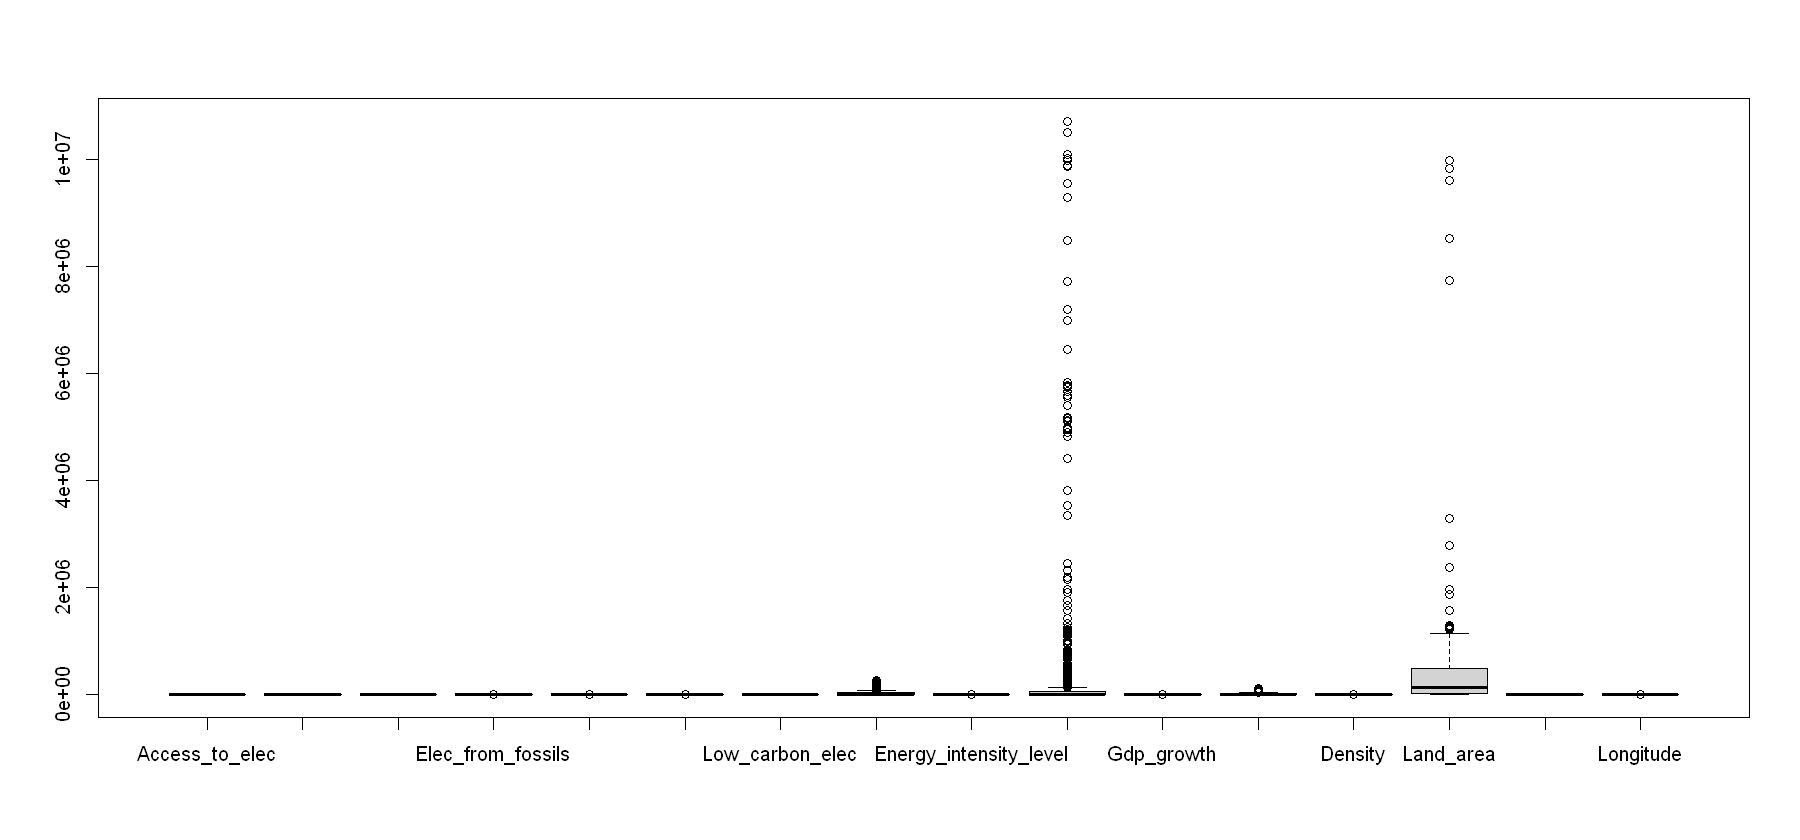

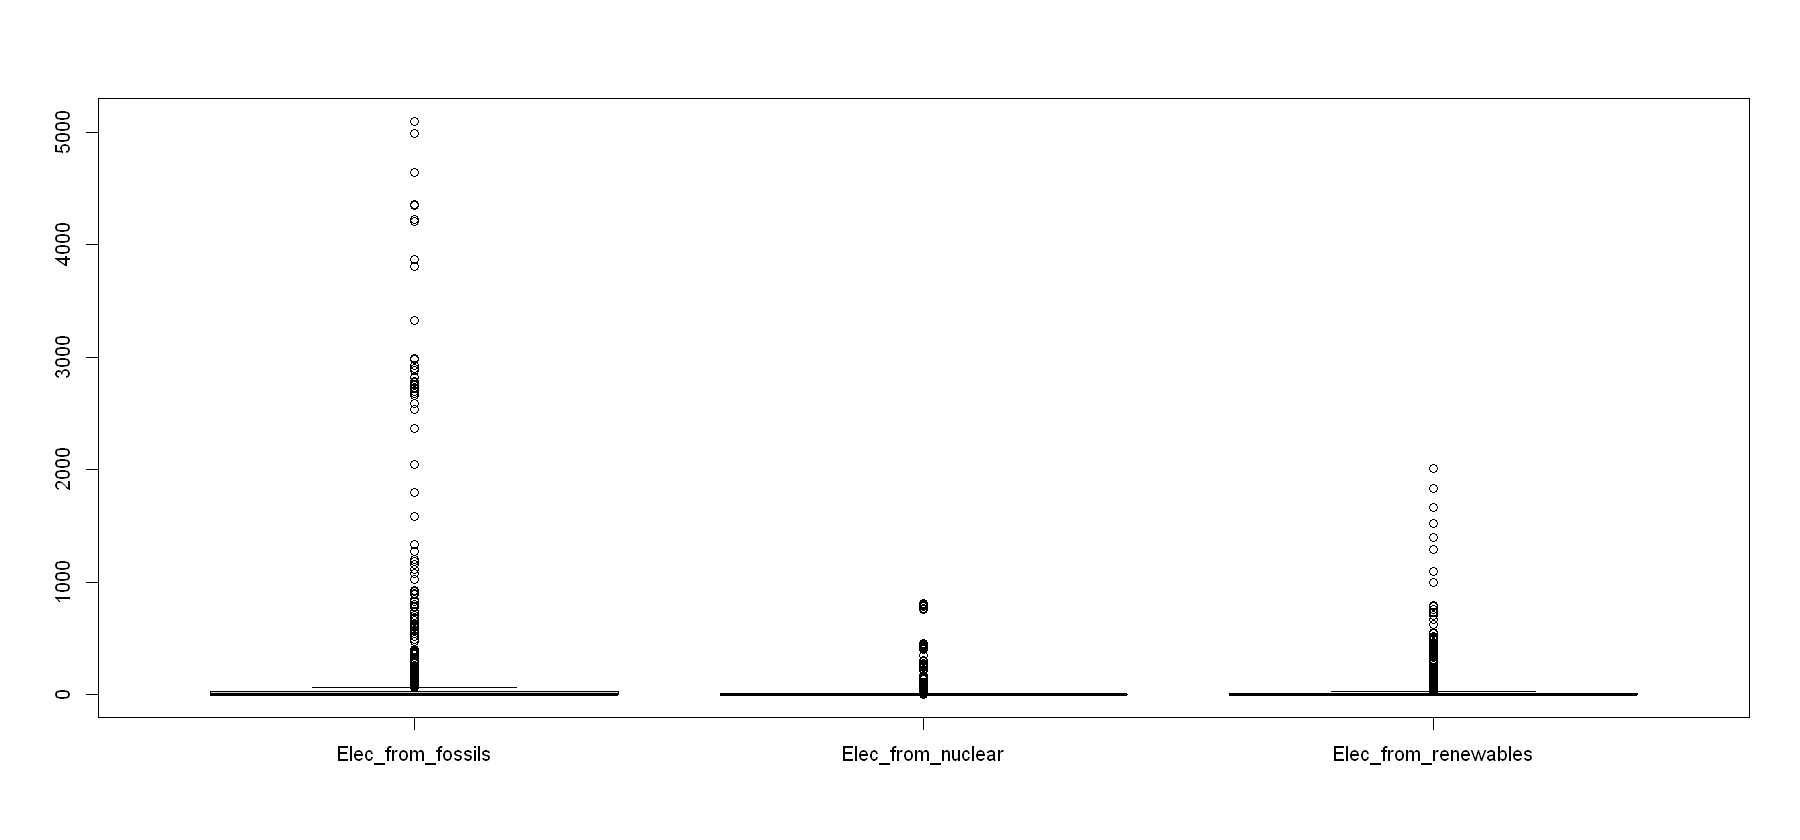

In [10]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,-c(1,2)]) # on voit pas grand chose : pas les mêmes unités et échelles

boxplot(data[,c(6:8)]) # boxplot electricity : on n'y voit rien : trop de outliers

**Interprétations:**

Nos variables sont données dans des unités différentes qui ne sont donc pas comparables entres-elles. C'est pourquoi le premier boxplot n'est pas interprétable. On remarque tout de même que les variables Prim_energy_cons et Land_Area présentent un nombre important d'outliers. 

Le second, pris sur les relevés d'éléctricité (même échelle), montre la présence de nombreux outliers. Cela traduit des valeurs très différentes de certains pays par rapport aux autres. La moyenne d'énergie from fossils semble plus importante que celles des autres.

---

### Histogramme des variables quantitatives

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

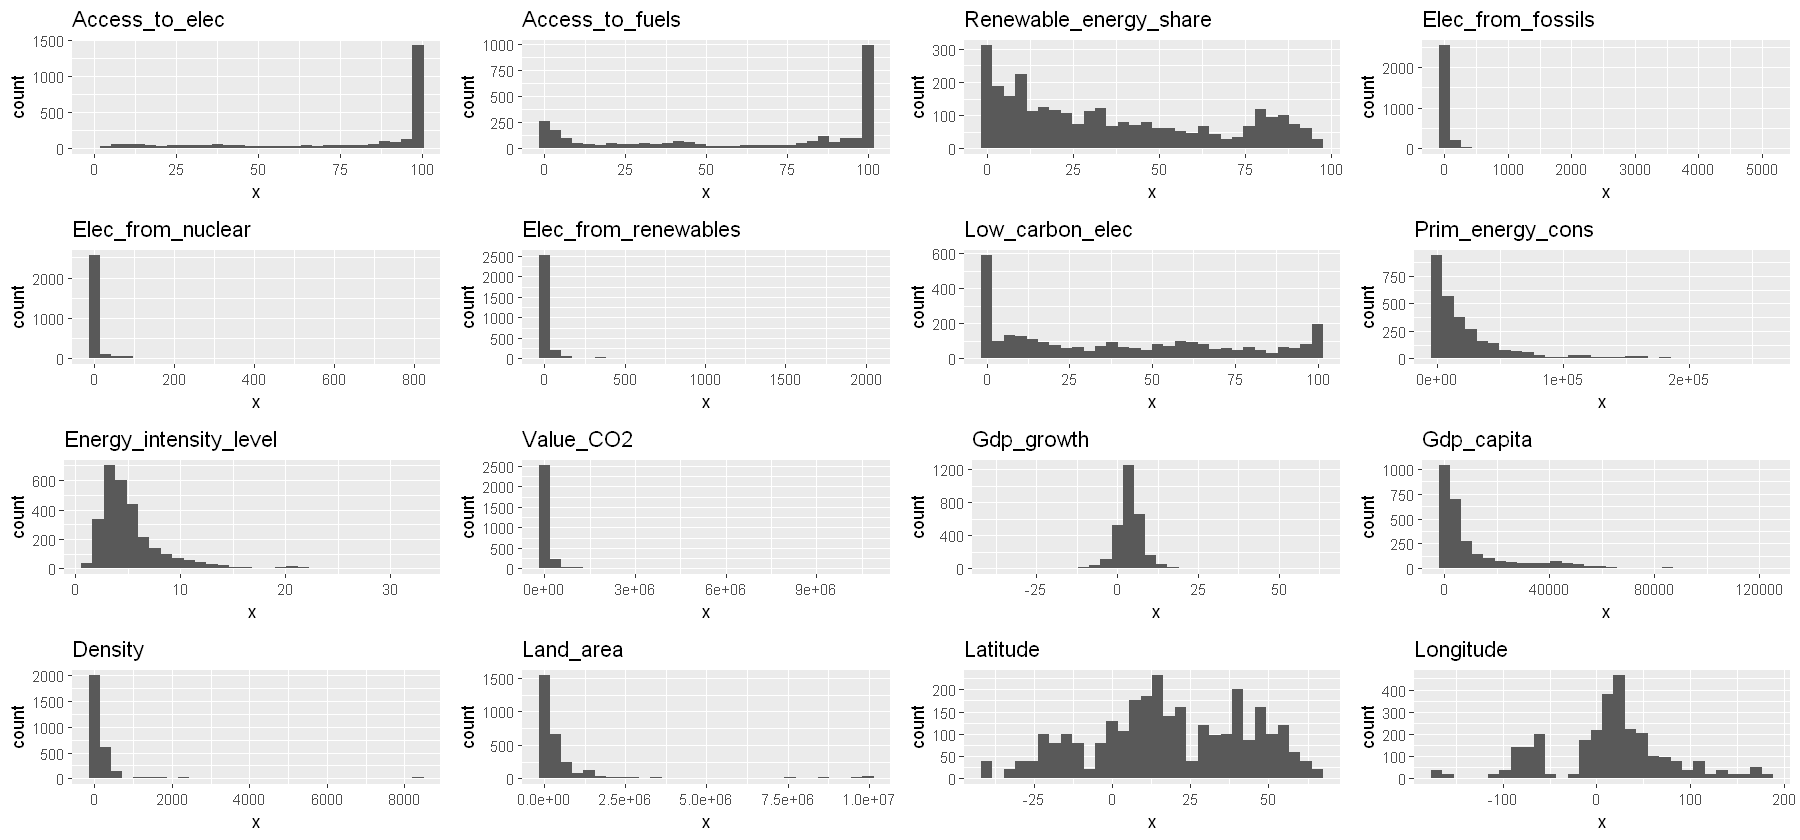

In [11]:
p = list()
j=1

for (i in names(data)){
    # on affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        data_copy <- data[[i]] # on créé une copie des données à chaque itération
        p[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=i)
    } 
}
                 
grid.arrange(grobs=p)

**Interprétations:**

D'après les histogrammes, on peut voir que certaines variables ont une grande variance et ne sont pas également réparties ni centrées. Afin de mieux les interpréter et proposer un meilleur modèle de prédiction, nous allons les ajuster par une transformation logarithmique.

On effectue une transformation sur les variables suivantes :

- Electricity from fossil fuels (TWh)                                
- Electricity from nuclear (TWh)                                       
- Electricity from renewables (TWh)  
- Primary energy consumption per capita (kWh/person)                   
- Energy intensity level of primary energy          
- Value_co2_emissions_kt_by_country                                                          
- gdp_per_capita                                                       
- Density\n(P/Km2)
- Land_Area

---

[1] "Access_to_fuels"
[1] "Renewable_energy_share"
[1] "Elec_from_fossils"
[1] "Elec_from_nuclear"
[1] "Elec_from_renewables"
[1] "Low_carbon_elec"
[1] "Gdp_growth"


Warning message in log(data[, i] + 1):
"Production de NaN"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 225 rows containing non-finite outside the scale range (`stat_bin()`)."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick be

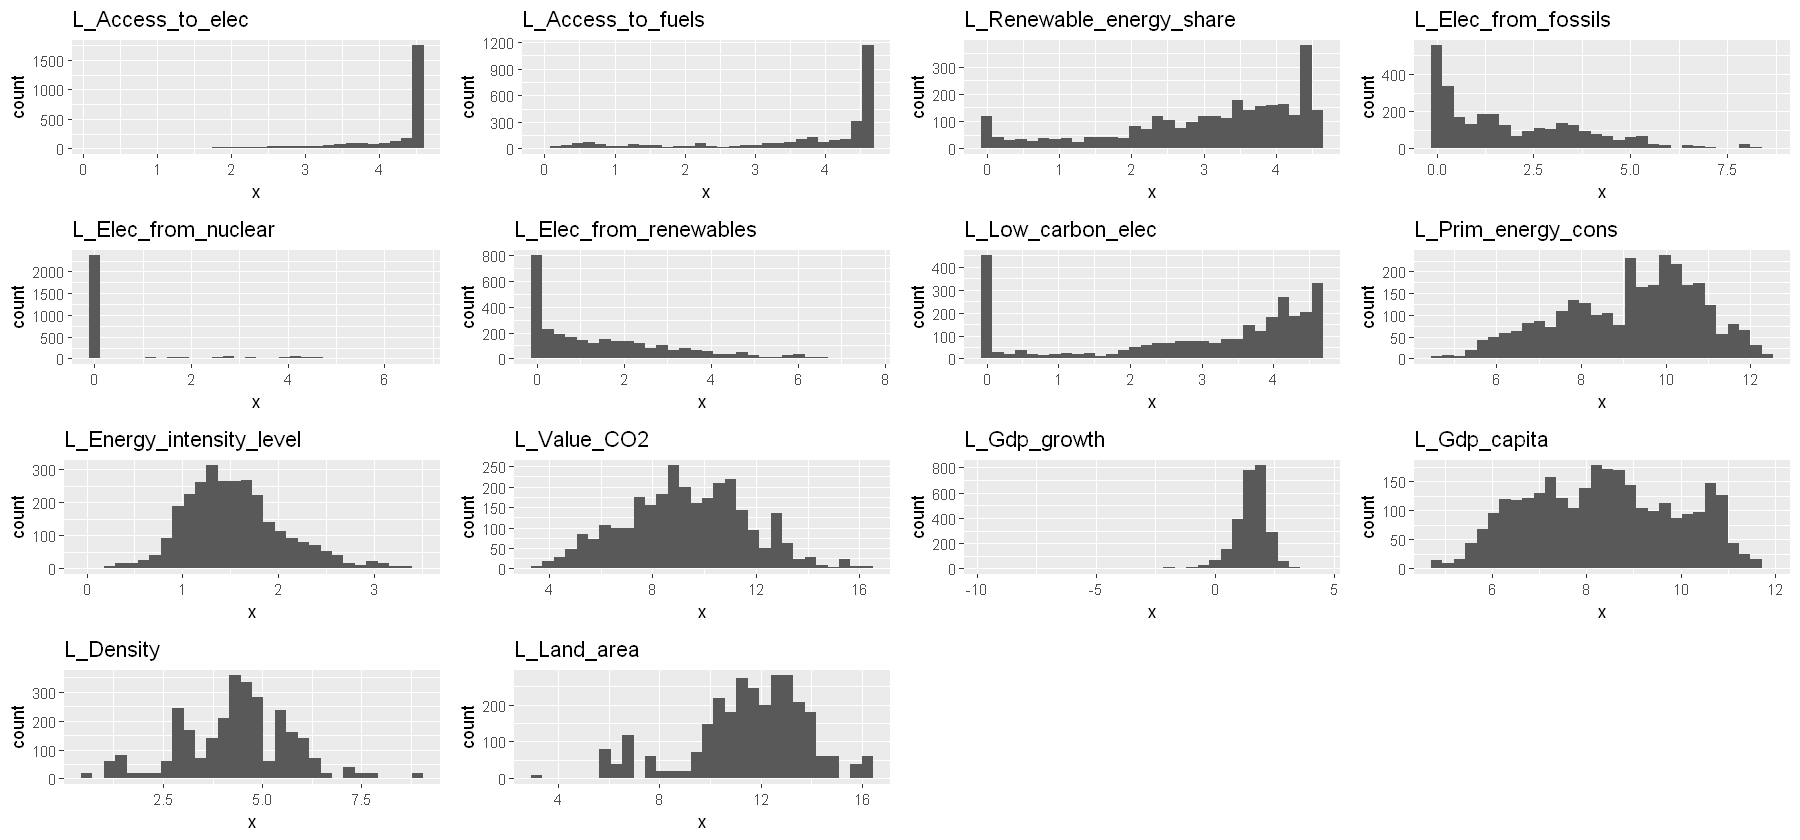

In [12]:
l = list()

# Mettre que les variables que l'on veut changer / ne pas log tout directement

Var_names = names(data[,1:16])

for (i in Var_names){
    # on n'affiche que l'histogramme des variables quantitatives
    if (is.numeric(data[[i]])) {
        L_var <- paste("L_",i,sep="")
        if (all(data[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
            data[,L_var] <- log(data[,i])
        } else {
            print(i)
            data[,L_var] <- log(data[,i]+1)
        }
        data_copy <- data[[L_var]] # on créé une copie des données à chaque itération
        l[[i]] <- ggplot(data.frame(x=data_copy),aes(x=x)) + geom_histogram() +labs(title=L_var)
    } 
}
                 
grid.arrange(grobs=l)

**Interprétation :**

Nous gardons les transformations qui ont permi de recentrer nos données. Nous les nommons en ajoutant un L_ au début de leur nom. Ainsi, la variable *Land_area* devient par exemple *L_Land_area*.

---

In [13]:
data_centre <- data[,c(1,2,3,4,5,22,23,24,9,26,27,28,13,30,31,32,17,18)]
str(data_centre)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                  : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                    : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access_to_elec          : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access_to_fuels         : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable_energy_share  : num  36.7 44.2 33.9 31.9 28.8 ...
 $ L_Elec_from_fossils     : num  0.27 0.285 0.293 0.182 0.182 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.489 0.445 0.464 0.495 0.56 ...
 $ Low_carbon_elec         : num  67 62.9 63.4 76.2 78.9 ...
 $ L_Prim_energy_cons      : num  5.44 5.32 5.53 5.72 5.87 ...
 $ L_Energy_intensity_level: num  0.336 0.182 0.344 0.405 0.425 ...
 $ L_Value_CO2             : num  7.11 6.94 7.35 7.47 7.48 ...
 $ Gdp_growth              : num  8.83 1.41 11.23 5.36 13.83 ...
 $ L_Gdp_capita            : num  5.25 5.35 5.49 5.57 5.89 ...
 $ L_Den

### Etude des variables qualitatives

Comme nous avons enlevé les lignes contenant des données manquantes, certains pays ont moins d'années de relevé que d'autres. Il est important de prendre cela en compte dans l'interprétation de nos résultats.

### 5. Grande hétérogéneite de CO2

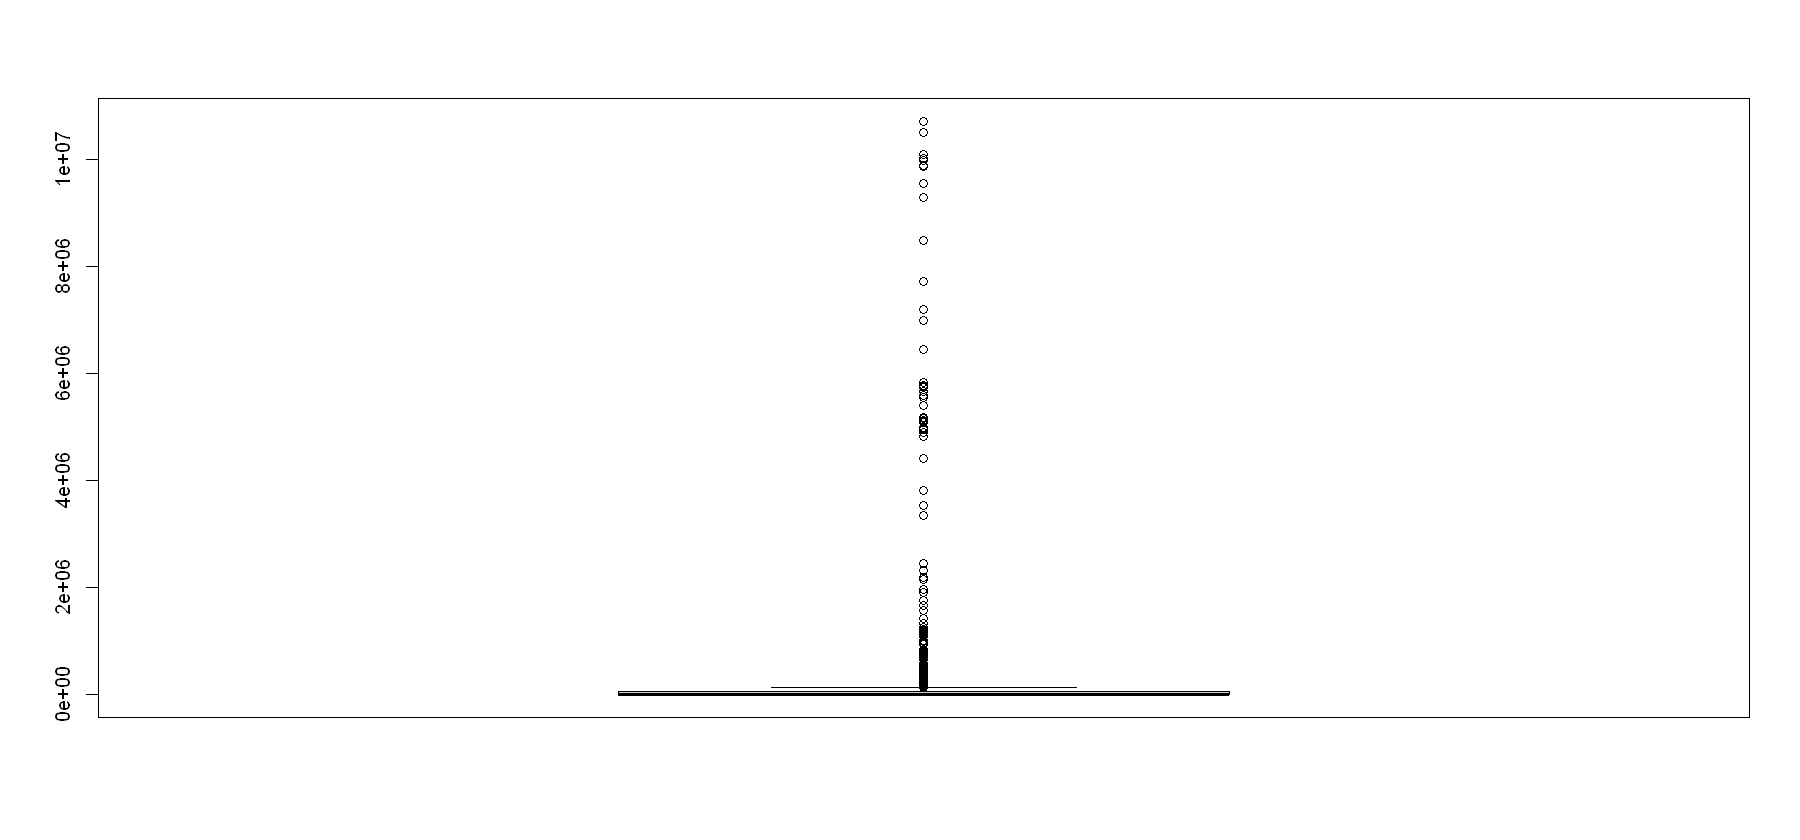

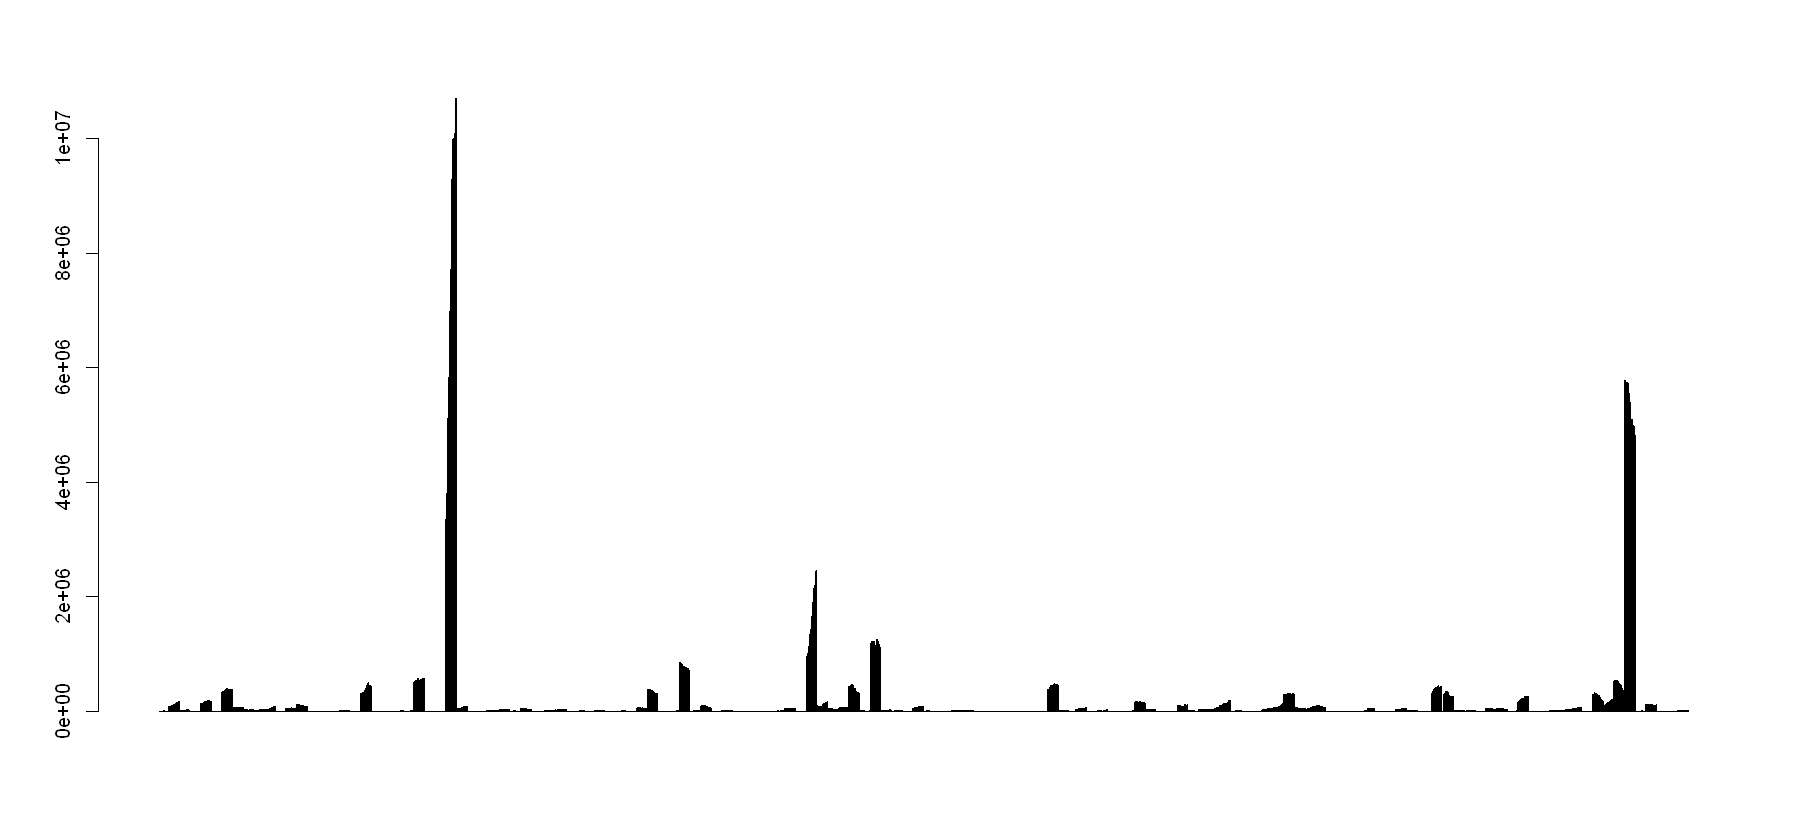

In [14]:
options(repr.plot.width = 15, repr.plot.height = 7)

boxplot(data[,12])
barplot(data[,12])

**Interprétation:** 

Le boxplot présente de nombreux outliers traduisant une hétérogénéité importante de la variable CO2. Ces outliers ne sont présent que d'un côté du boxplot (au dessus) ce qui traduit une forte asymétrie des valeurs prises par cette variable.

On retrouve le même résultat avec le barplot, celui-ci présente des pics à plus de 10e7 alors que les autres valeurs sont autour de 0. 

Les outliers ont des valeurs de CO2 bien plus grandes. Maintenant, nous allons regarder quels sont les pays qui émettent le plus de CO2.

---

In [15]:
nb_annee_pays = list()

j=1

for (i in levels(data_centre[,1])) {
    nb_annee_pays[[j]] = sum(grepl(i, data_centre$Entity))
    j=j+1
}

moy_pays_co2 = list() ## TESTER AFFICHER SUR UNE MAP

No = 1

for (j in levels(data[["Entity"]])) {
    data_sub = subset(data_centre, data$Entity==j)
    # moy_value_co2[[No]] = c(j, sum(data_sub[,12])/nb_annee_pays[[No]])
    moy_pays_co2[[No]] = sum(data_sub[,12])/nb_annee_pays[[No]]
    No = No+1
}

moy_pays_co2 = data.frame(moy_pays_co2)

colnames(moy_pays_co2) = levels(data[["Entity"]])

moy_pays_co2 = t(moy_pays_co2)

colnames(moy_pays_co2) = c("Moyenne_CO2")

moy_ordonnee = order(moy_pays_co2, decreasing=TRUE)

head(moy_pays_co2[moy_ordonnee,])

China United States         India         Japan       Germany 
     15.78308      15.48658      14.25228      13.98342      13.55689 
       Canada 
     13.21272

**Interprétation :**

En faisant une moyenne de la consommation de CO2 (en metric tones per capita) des différents pays sur les années observées, on observe que les pays les plus polluants sont : 
- La Chine
- Les Etats-Unis
- L'Inde
- Le Japon
- L'Allemagne

Nous allons maintenant afficher les pays les plus producteurs de CO2 et les pays les moins producteur sur la carte du monde. 

---

In [16]:
moy_pays_co2 <- as.data.frame(moy_pays_co2)
Pays = c(unique(data_non_modif$Entity))
Longitude =  c(unique(data_non_modif$Longitude))
Latitude = c(unique(data_non_modif$Latitude))
moy_pays_co2$Pays <- Pays
moy_pays_co2$Longitude <- Longitude
moy_pays_co2$Latitude <- Latitude

In [17]:
index_ord <- order(moy_pays_co2$Moyenne_CO2)

# Réorganiser le data frame en fonction de cet index
moy_pays_co2 <- as.data.frame(moy_pays_co2[index_ord, ])
moy_pays_co2 = na.omit(moy_pays_co2)
# Afficher le data frame ordonné
print(tail(moy_pays_co2))
print(head(moy_pays_co2))

              Moyenne_CO2          Pays  Longitude Latitude
Canada           13.21272        Canada -106.34677 56.13037
Germany          13.55689       Germany   10.45153 51.16569
Japan            13.98342         Japan  138.25292 36.20482
India            14.25228         India   78.96288 20.59368
United States    15.48658 United States  -95.71289 37.09024
China            15.78308         China  104.19540 35.86166
                      Moyenne_CO2                  Pays   Longitude   Latitude
Guinea                   1.977152                Guinea   -9.696645  9.9455870
Dominica                 2.588085              Dominica  -61.370976 15.4149990
Niger                    3.549128                 Niger    8.081666 17.6077890
Nauru                    3.951656                 Nauru  166.931503 -0.5227780
Kiribati                 4.041077              Kiribati -157.376832  1.8368976
Sao Tome and Principe    4.603266 Sao Tome and Principe    6.733343  0.3301924


In [18]:
# install.packages("ggrepel")
library(ggrepel)

Warning message:
"le package 'ggrepel' a été compilé avec la version R 4.3.3"


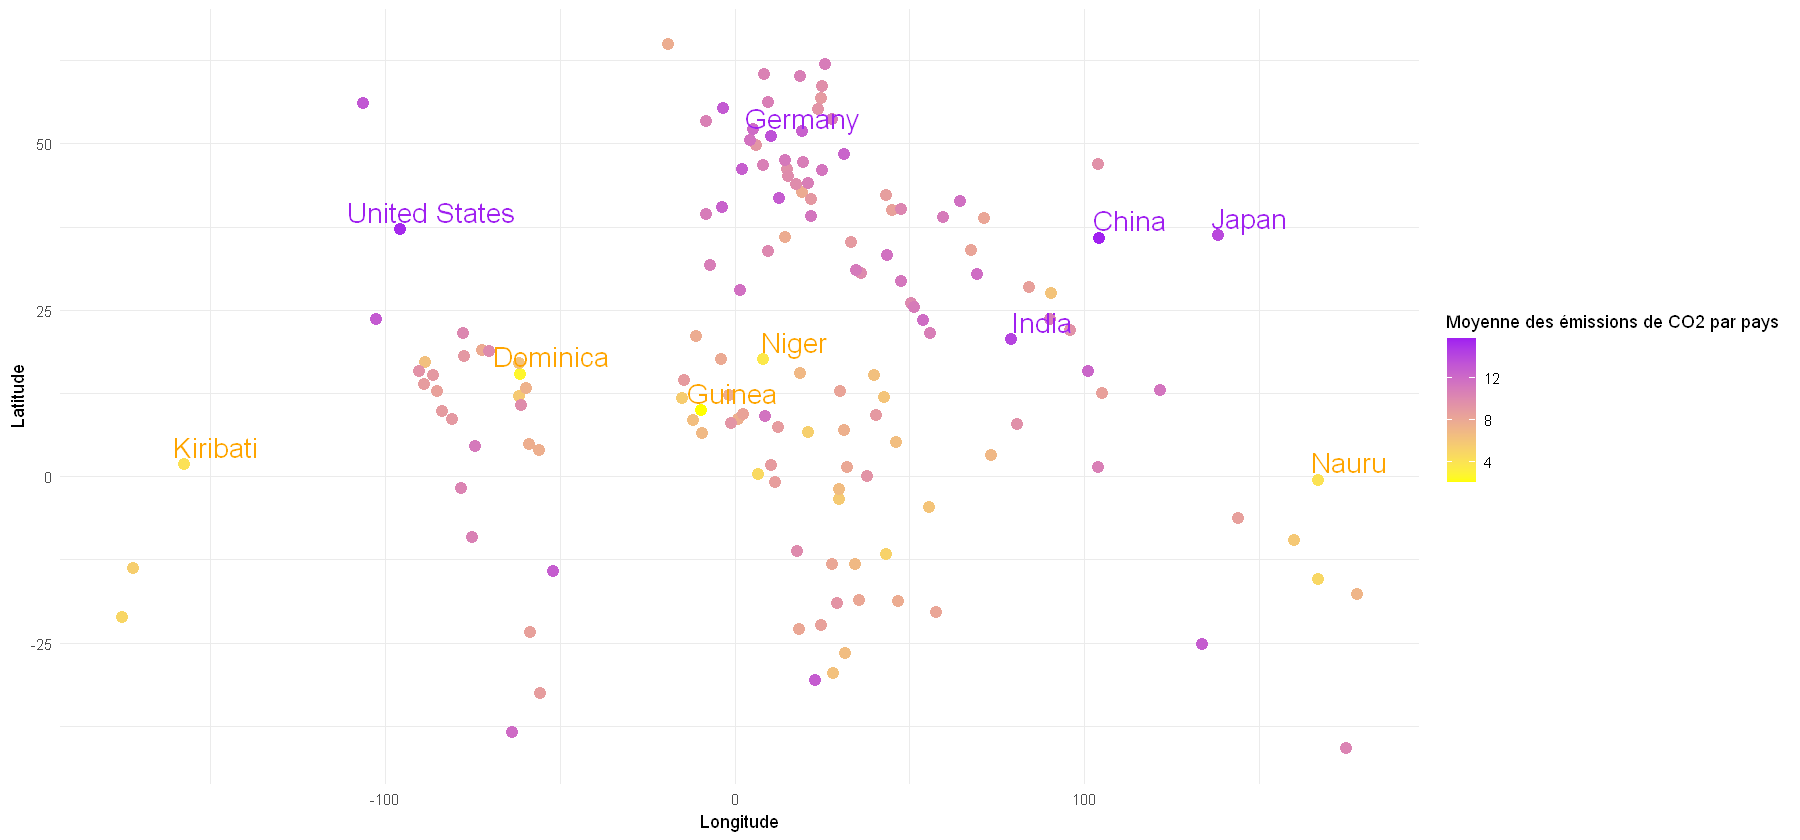

In [19]:
# Tracer le graphique en utilisant ggrepel pour les étiquettes de texte
ggplot(moy_pays_co2, aes(x = Longitude, y = Latitude, color = Moyenne_CO2)) +
  geom_point(size=3) +
  scale_color_gradientn(colors =c("yellow", "purple")) +
  geom_text_repel(data = head(moy_pays_co2, 5), 
                  aes(label = Pays), 
                  nudge_x = 0.1, nudge_y = 0.1, 
                  segment.size = 0.2, segment.alpha = 0.2, size = 6, color = 'orange') +
  geom_text_repel(data = tail(moy_pays_co2, 5), 
                  aes(label = Pays), 
                  nudge_x = 0.1, nudge_y = 0.1, 
                  segment.size = 0.4, segment.alpha = 0.4, size = 6, color = "Purple") +
  labs(color = "Moyenne des émissions de CO2 par pays",
       x = "Longitude", y = "Latitude") +
  theme_minimal()


**Interprétations:**

En affichant les pays selon leurs émissions de CO2 on peut remarquer que les pays qui émettent le plus se trouvent dans l'hémisphère Nord. De même, ceux qui consomment le moins ont se situent dans l'hémisphère Sud. On peut donc se demander si la latitude d'un pays pourrait caractériser son taux d'émissions de CO2.

---

### 6. Analyse Descriptive Multidimensionnelle

---

Nous regardons comment les variables intéragissent entre elles, si elles sont corrélées ou non.

On effectue cette analyse sur le jeu de données centrée (*ie* avec le jeux contenant les variables que l'on a décidé de transformer par un log).

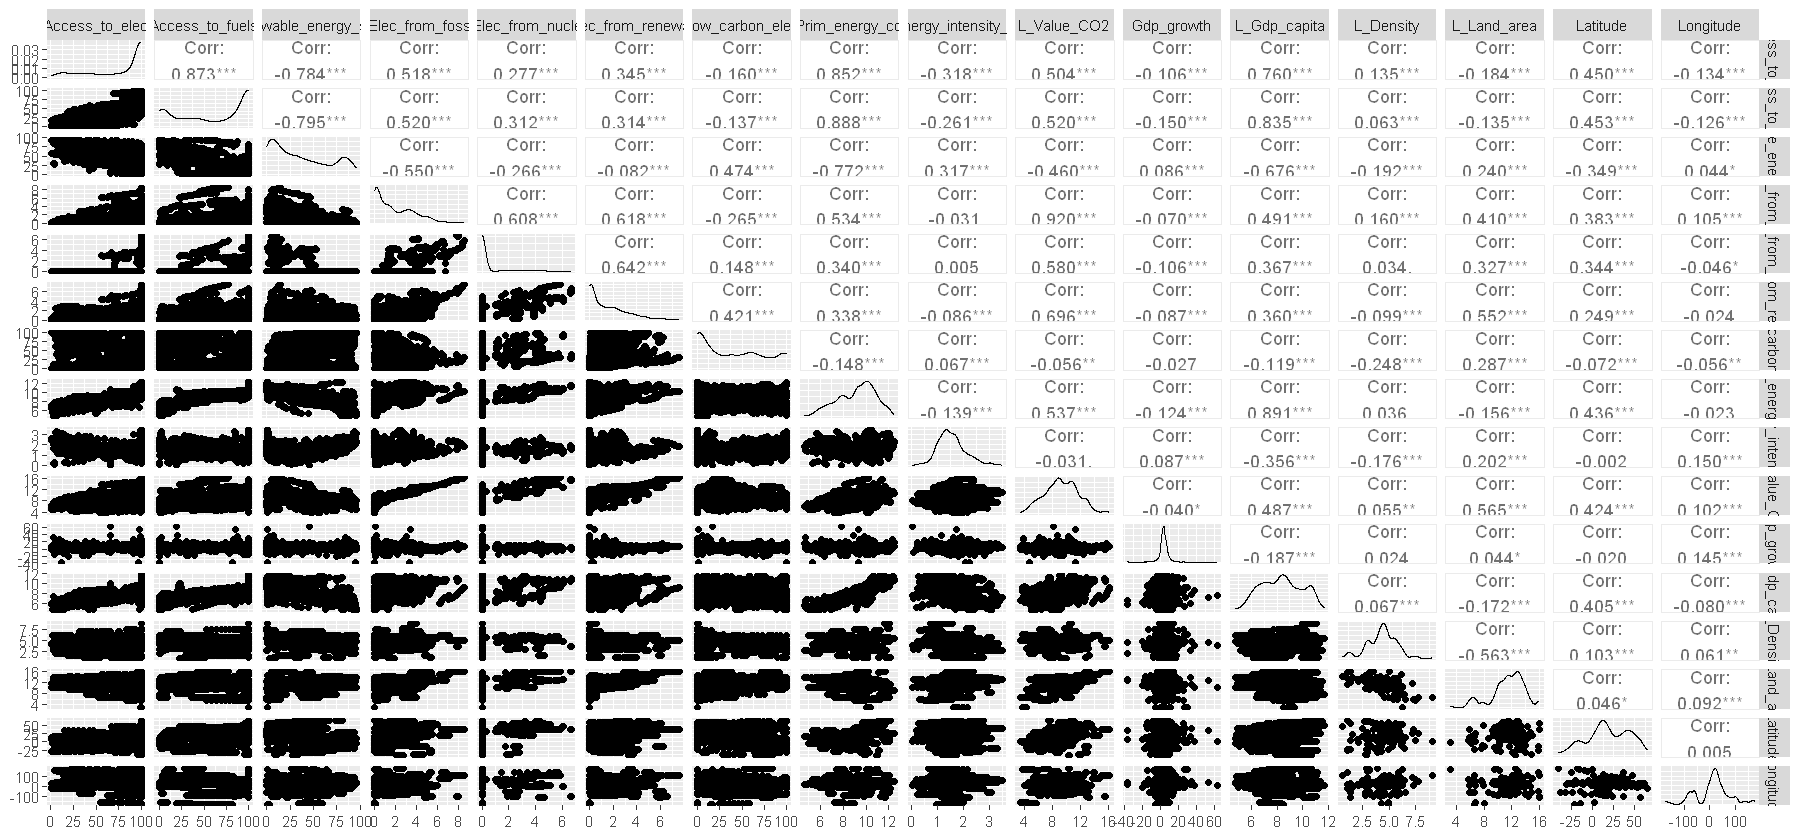

In [20]:
# on regarde les dépendances 2 à 2
ggpairs(data_centre[,c(3:18)])

**Interprétation :**

Sur ce graphe des corrélations, on peut remarquer que les variables L_value_CO2 et Elec_from fossil sont très corrélées positivement (une corrélation de 0,920).

---

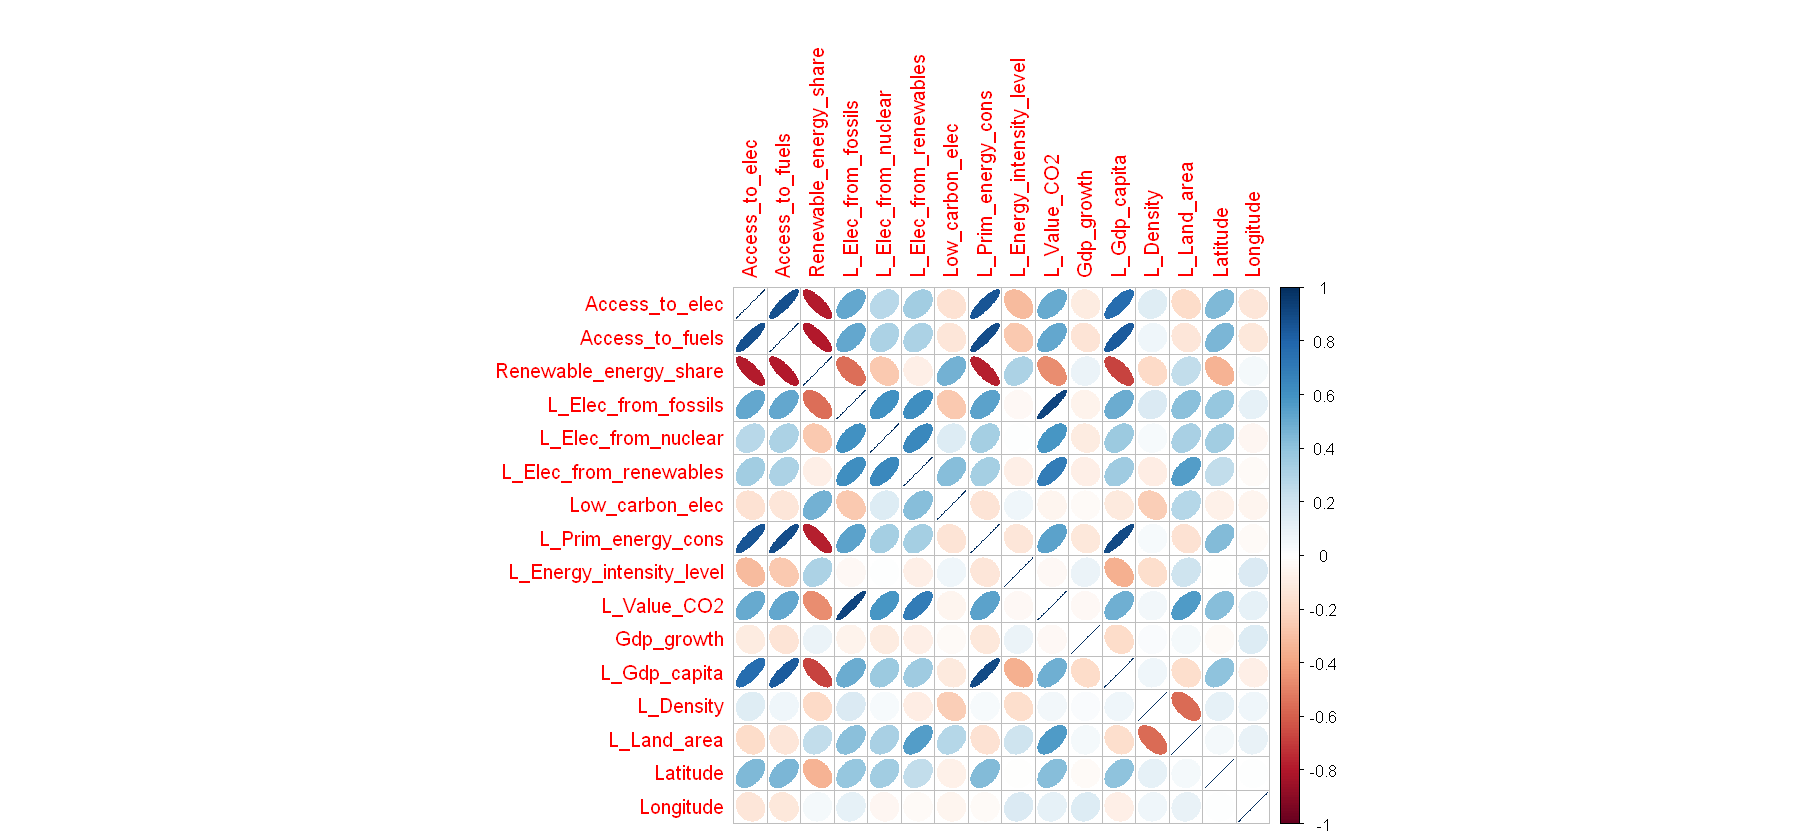

In [21]:
corrplot(cor(data_centre[,3:18]), method="ellipse")

**Interprétation**

D'après le graphe des corrélations, on peut remarquer des corrélations positives :
- Fortes entre : Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita : les pays ayant accès à l'electricité ont aussi accès au fuel..
- Plus faibles : L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables : plus les pays produisent de l'electricité par les énergies fossils, plus ils produisent par les énergies nucleaires et renouvelable.   

On peut aussi observer des corrélations négatives entre : 
- Fortes entre : Renewable_energy_share et Access_to_elec, Access_to_fuels, L_prim_energy_cons, L_Gdp_capita: si l'accès à l'électricité et au fuel augmente, la part des énergies renouvelables diminue. 
- Plus faibles : L_Land_area et L_Density : si la taille du pays augmente sa densité baisse.

Concernant la variable C02 : 
- Elle est corrélée positivement avec les trois variables élec, avec les variables Acess_to_elec et Acess_to_fuels. Il est cohérent de penser que si l'accès et la production d'énergies augmentent la production de CO2 augmentera aussi. Elle d'autant plus corrélée avec L_Elec_from_fossils, L_Elec from_nuclear, L_Elec_from_renewables. En effet si la production d'éléctricité augmente il est logique de penser que le rejet de CO2 va augmenter également. 

- Il semble exister des corrélations avec la latitude mais pas spécialement avec la longitude : il semble que le critère sur la position Nord/Sud du pays ait un lien avec sa production de CO2. Un pays plus au Nord aurait tendance à produire plus de CO2, cela confirme l'hypothèse proposée lors de l'affichage sur la carte du monde. 

- Enfin il semblerait que plus le pays est grand plus la production de CO2 sera importante. (corrélation positive avec L_land_Area). 

La longitude et le Gdp growth ne semblent pas être corrélées aux autres variables.

---

#### Comparons les corrélations log avec les données non modifiées : 

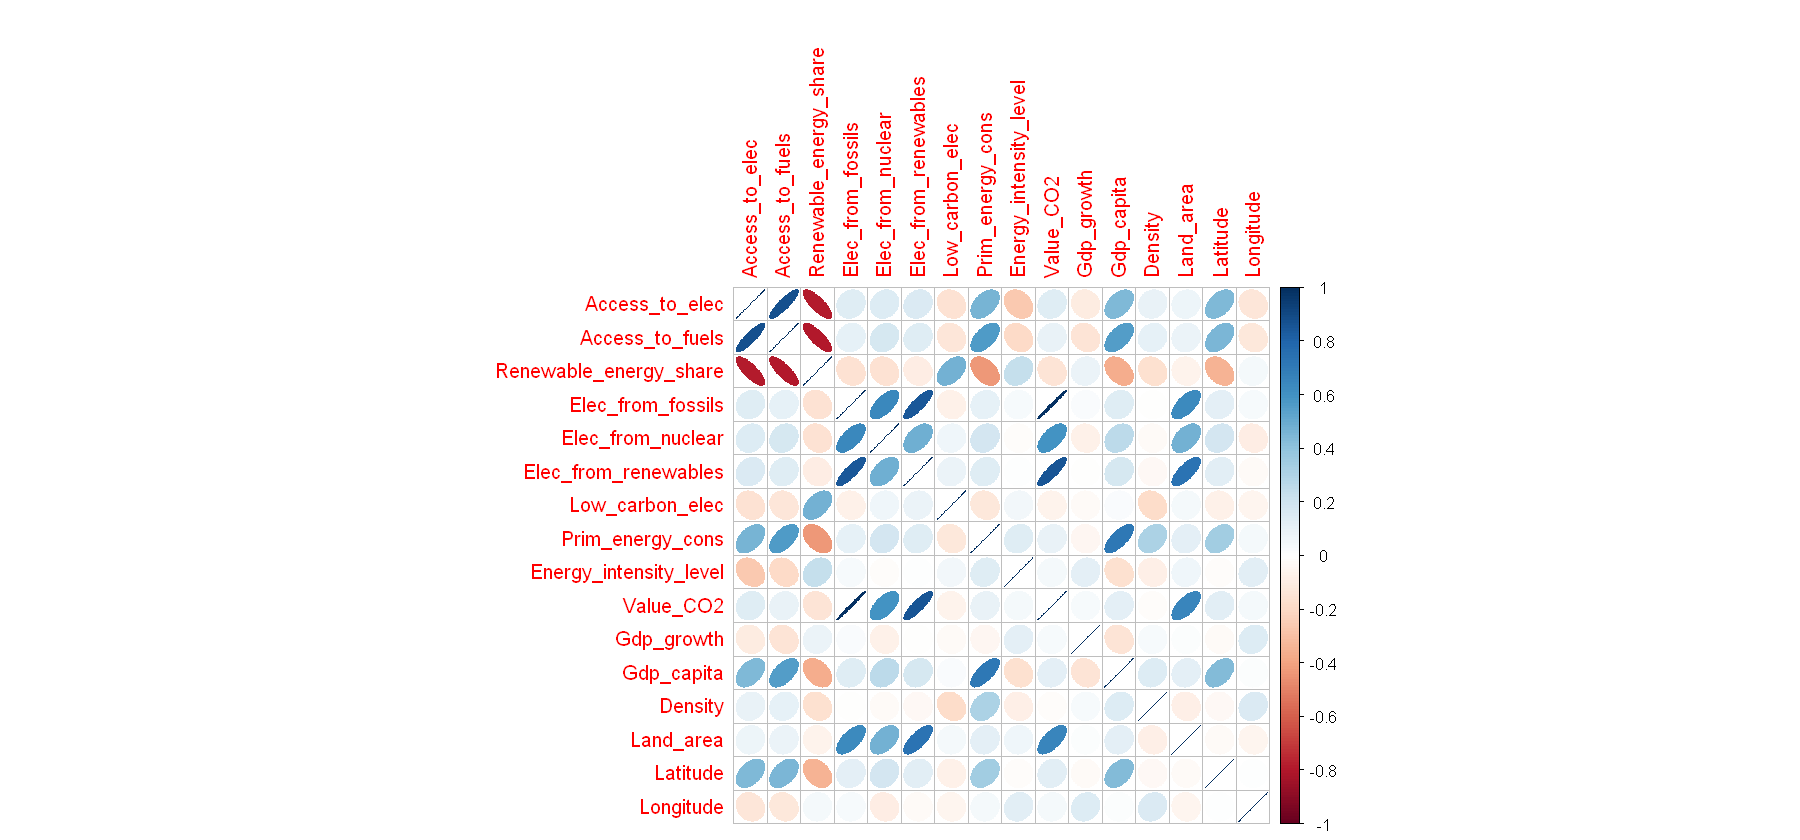

In [22]:
corrplot(cor(data[,3:18]), method="ellipse")

**Interprétation :**

Il semblerait que les corrélations soient similaires mais moins importantes (de même signe mais moins intense). Ce résultat est satisfaisant, cela montre que nous ne modifions pas les informations, et notamment les liens entre les variables, avec les transformations effectuées.

---

## 7. Analyse en Composantes Principales

---

On effectue ici une ACP dans un double objectif :
- Exploratoire : l'ACP, peut nous permettre de mieux comprendre et étudier le jeu de données.
- Réduction de dimension : l'ACP peut nous permettre de réduire la dimension de notre jeu de données en créant des métavariables portant une part importante de la variabilité du jeu de données.

Comme précédemment, on effectue l'ACP sur le jeu de données avec les variables recentrées. On considère la variable à prédire (value_CO2) comme une variable quantitative supplémentaire.

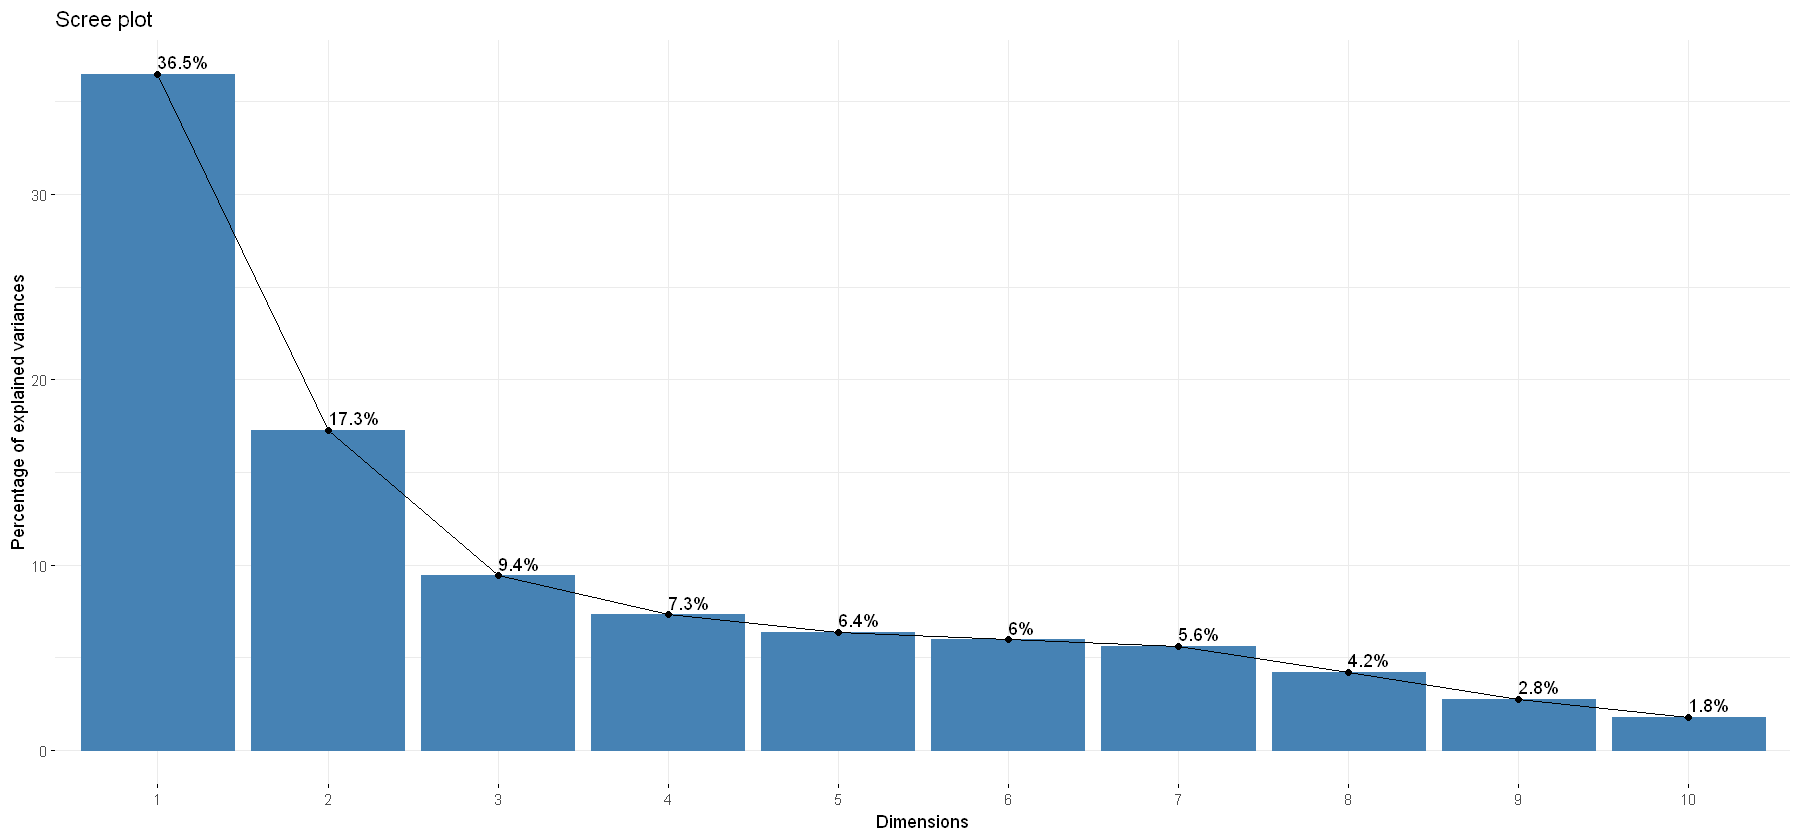

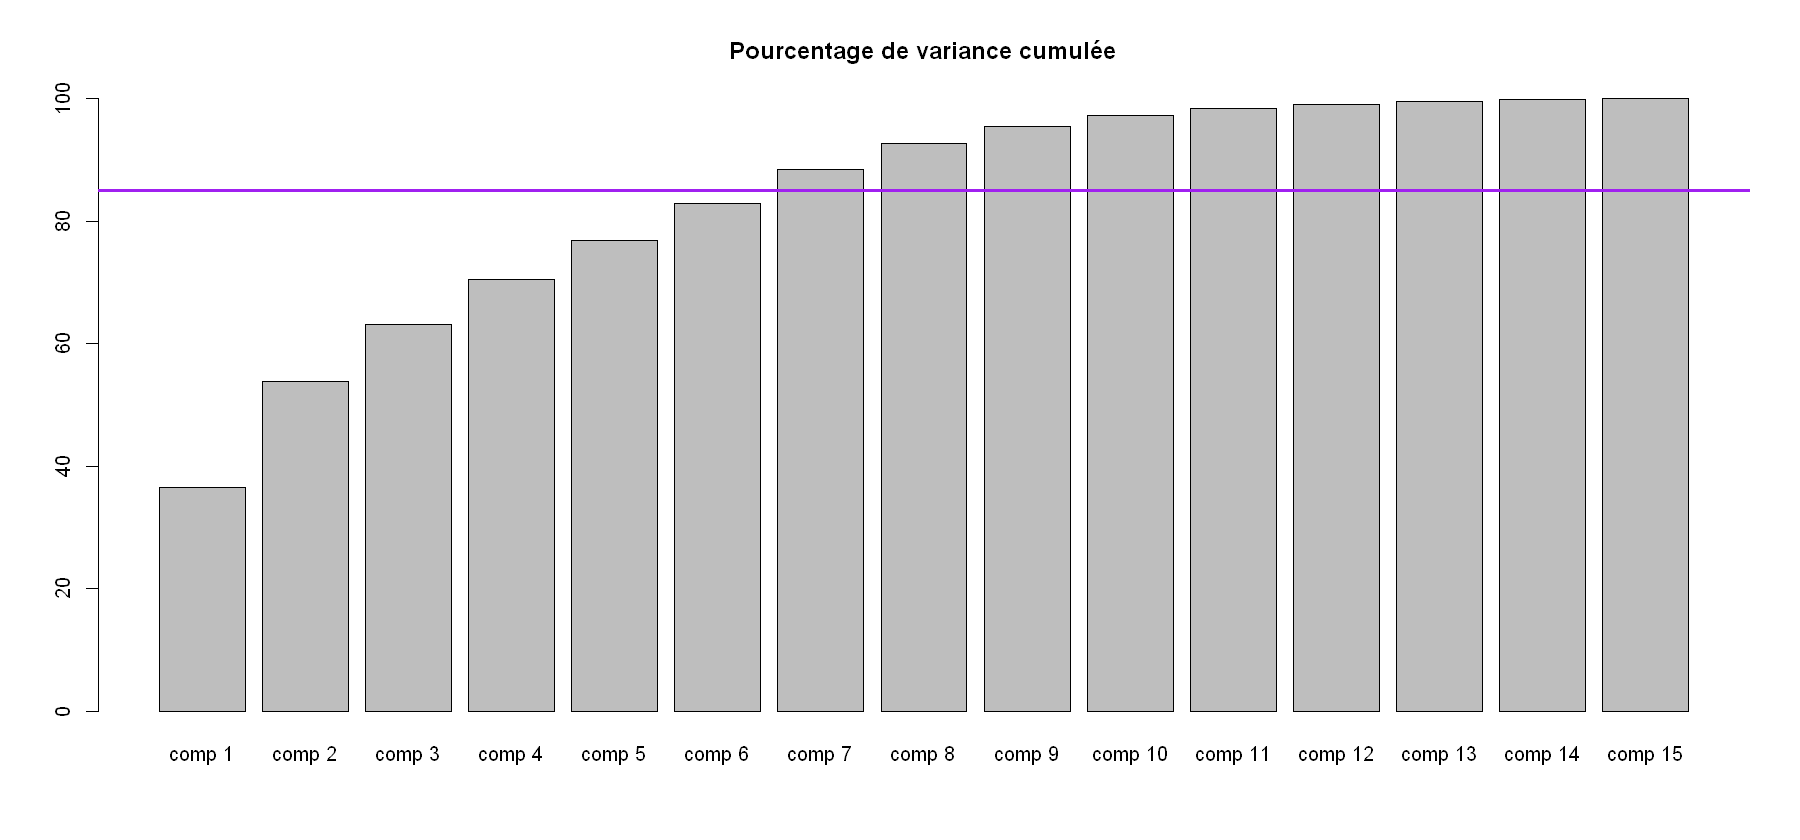

In [23]:
acp <- PCA(data_centre, scale.unit = TRUE,
           graph = FALSE, quali.sup = c(1, 2), quanti.sup = 12 , ncp = 7)

# Décroissance des valeurs propres

g1<-fviz_eig(acp, addlabels = TRUE)
g1

var_cumul = acp$eig[,3]
barplot(var_cumul, main = "Pourcentage de variance cumulée")
abline(h=85, col="purple", lwd = 3)


## On garderai 7 variables explicatives.

**Interprétation:**

On choisit de garder 6 composantes principales afin d'expliquer plus de 85% de la variance du jeu de données.

---

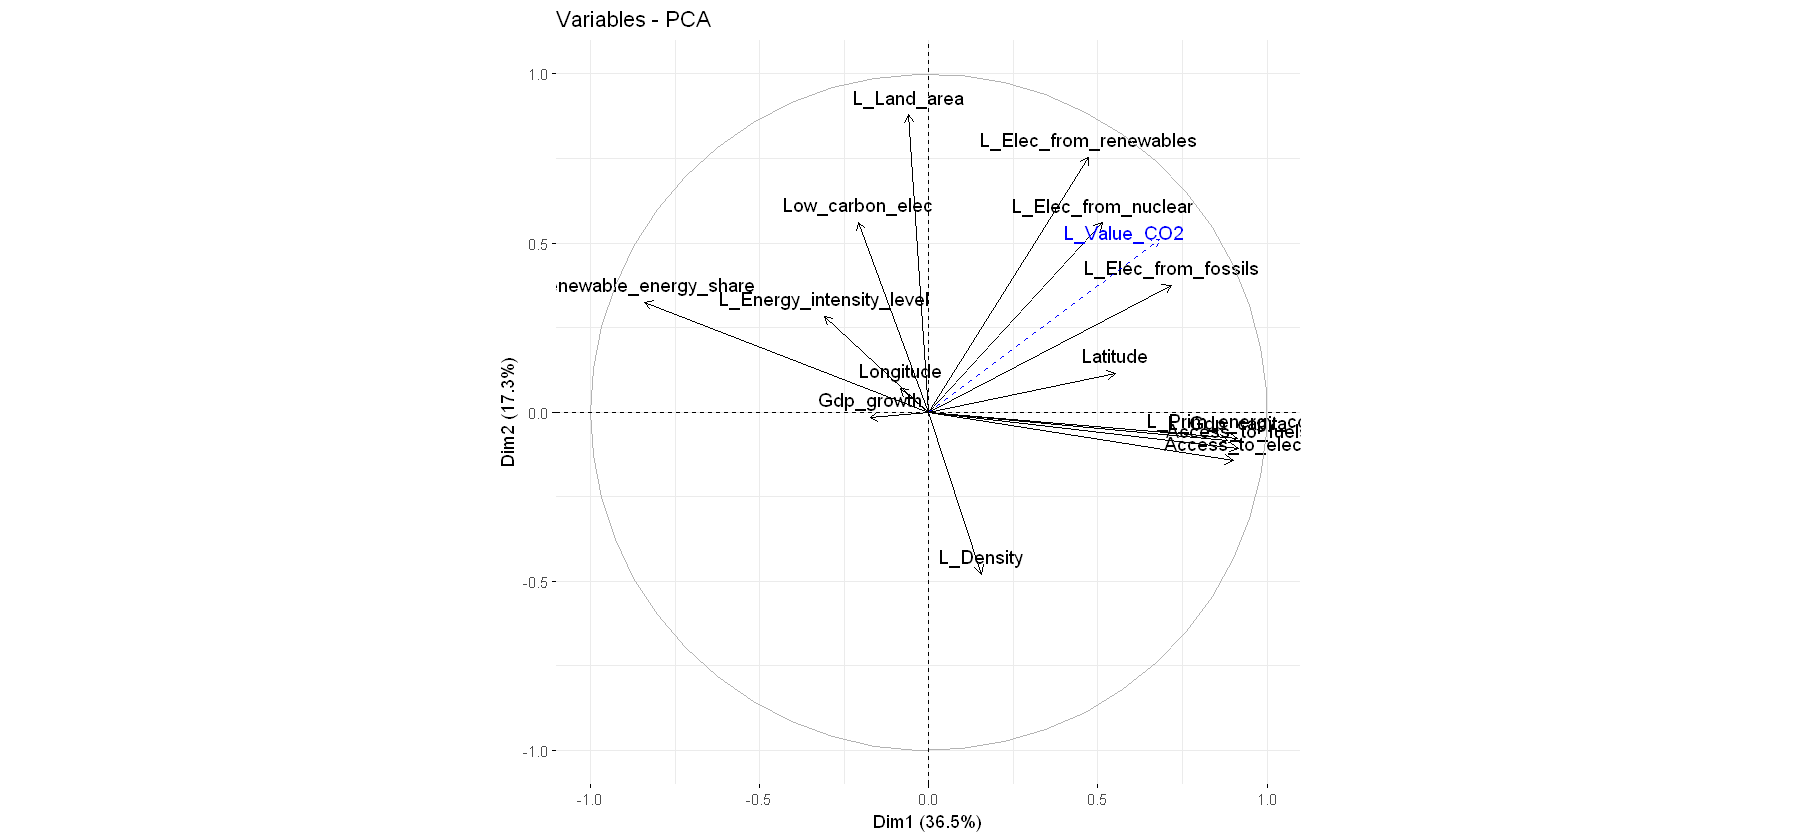

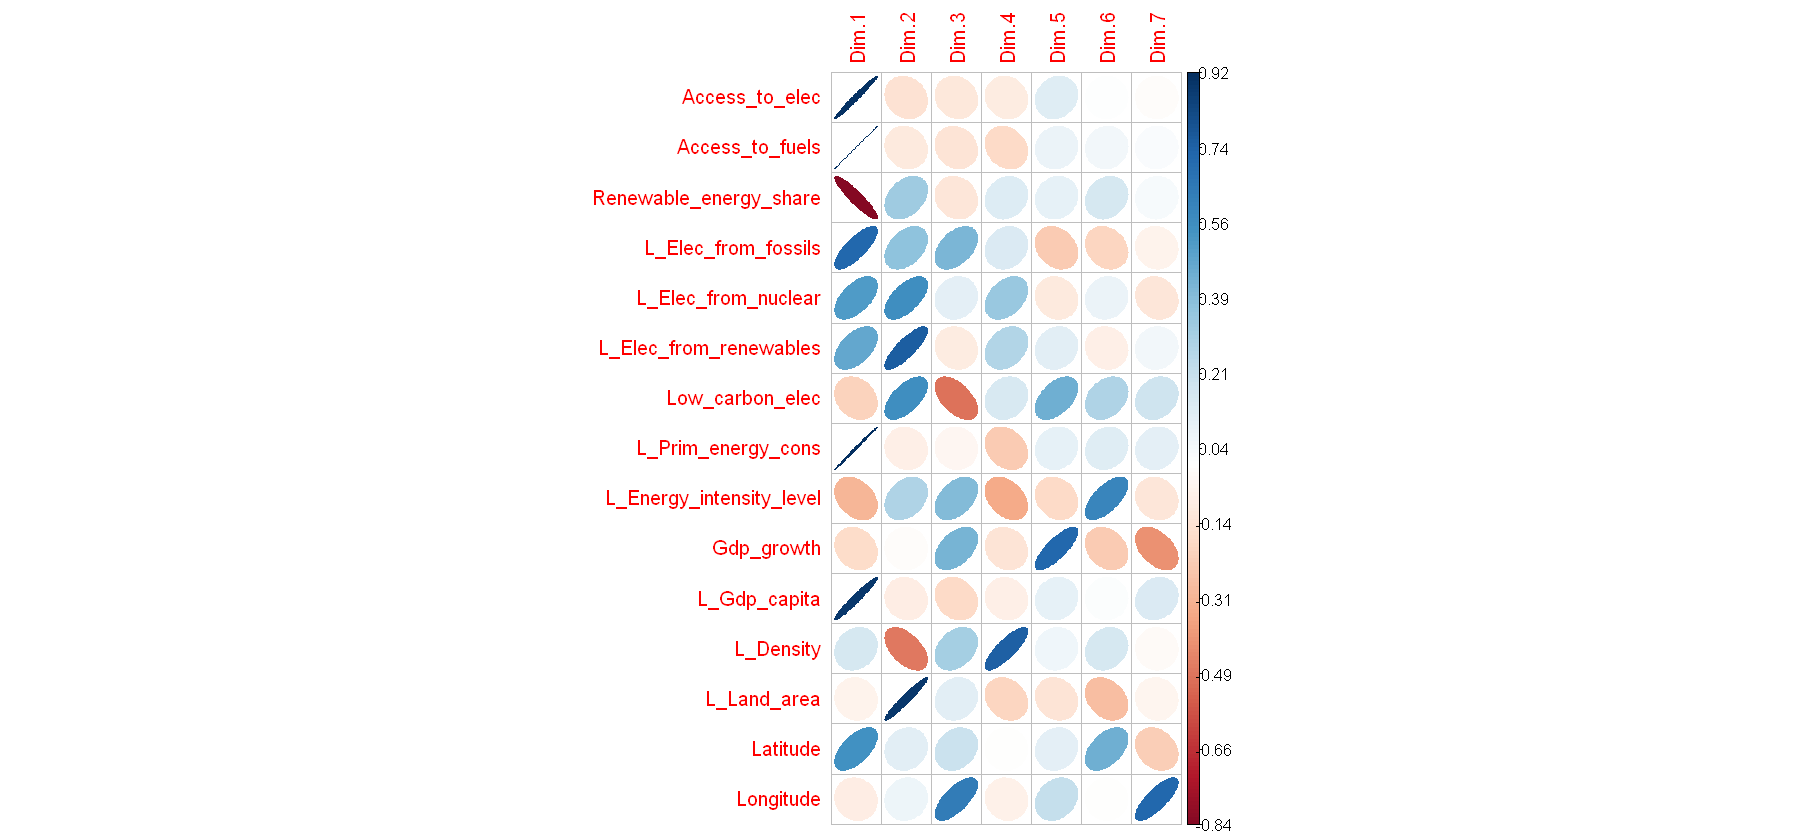

In [24]:
fviz_pca_var(acp)
corrplot(acp$var$cor, is.corr=FALSE,method="ellipse")

**Interprétation:**

- La dimension 1 semble bien expliquer Access_to_elec, Access_to_fuels,Prim_energy_cons et Gdp_capita . Au contraire elle est  négativement corélée avec Renawable_energy_share et Energy_density_level. 
- La dimension 2 explique très bien Land Area. Elle est aussi corrélée positivement avec toutes les sources d'électricité. 

La valeur de CO2 est corrélée positivement avec les dimensions 1 et 2. La dimension 1 semble évoluer avec des caractéristiques impliquant une augmentation de la production de CO2 : l'accès à l'électricité, la production d'energies et les pays au Nord de l'équateur. La dimension 2 semble différencier la production d'énergies des autres variables. 

---

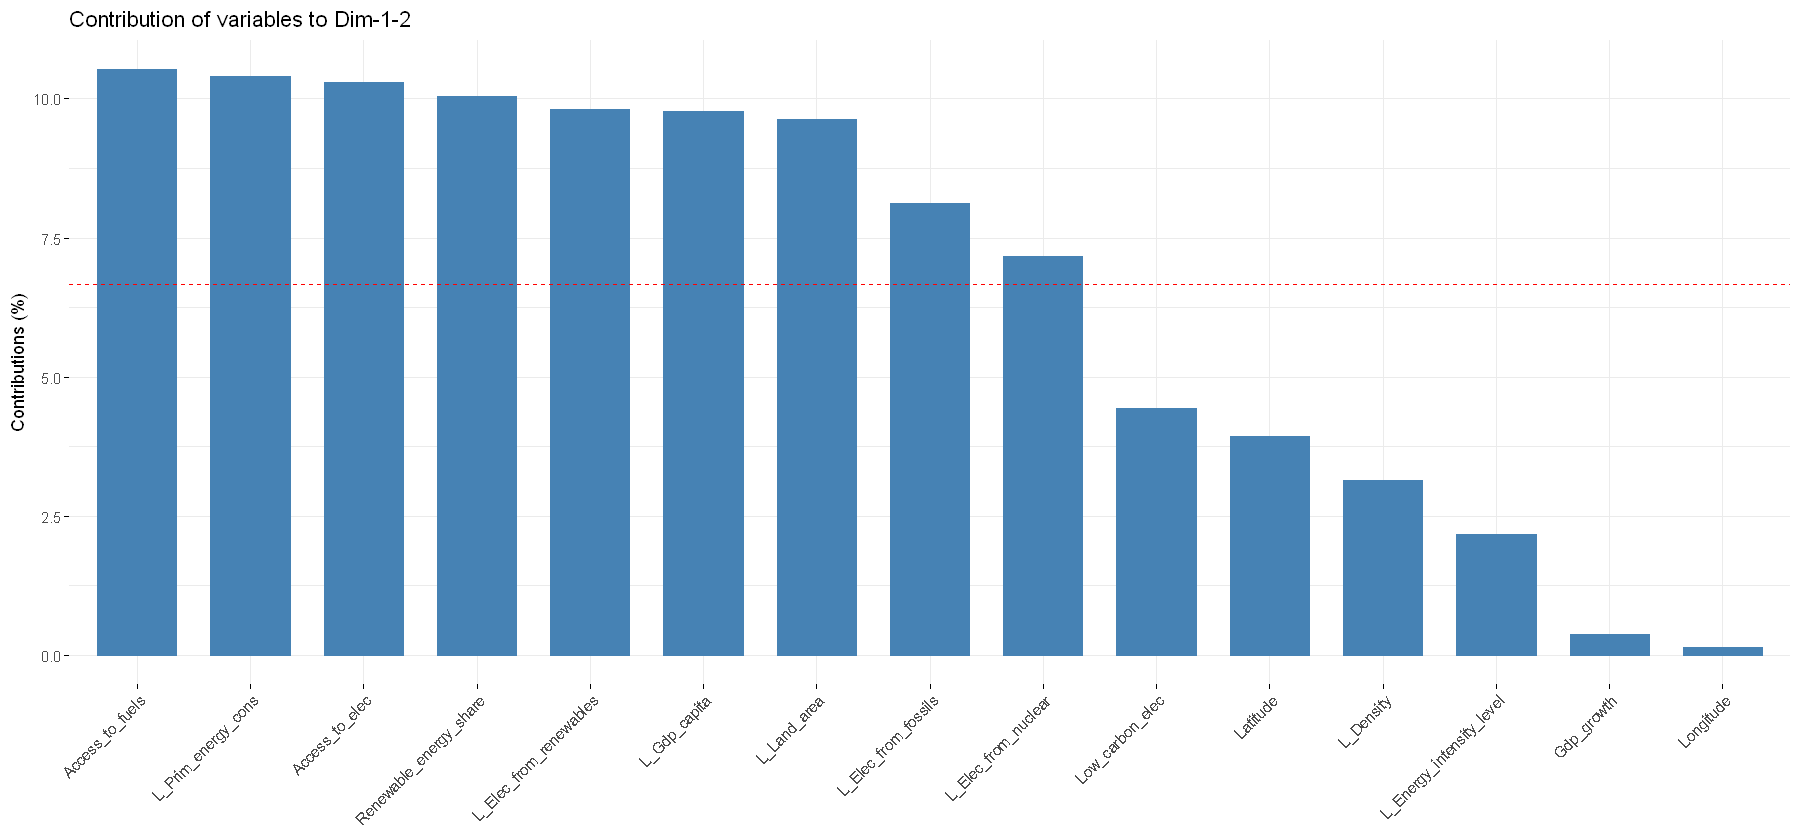

In [25]:
fviz_contrib(acp, choice = "var", axes = c(1,2))

**Interprétation :**

Les deux premières dimensions sont principalement influencées par la valeur de Acces_to_fuels, L_Prim_energy_cons, Acces_to_elec ... Notant que ces deux dimensions expliquent plus de 50% de la variance de notre jeux de données, on s'attend à ce que ces variables soient les plus importantes pour la prédiction de la valeur du CO2.

---

In [ ]:
paste('-------- Projection des individus sur les deux premières dimensions --------')
fviz_pca_ind(acp, label="none", habillage=data_centre$Entity) #main = "Projection des individus sur les deux premières dimensions")

## 8. Visualisation de la dépendence de la varibale Year et de la variable à prédire

[1] "Pourcentage augmentation :"
[1] 37.3818


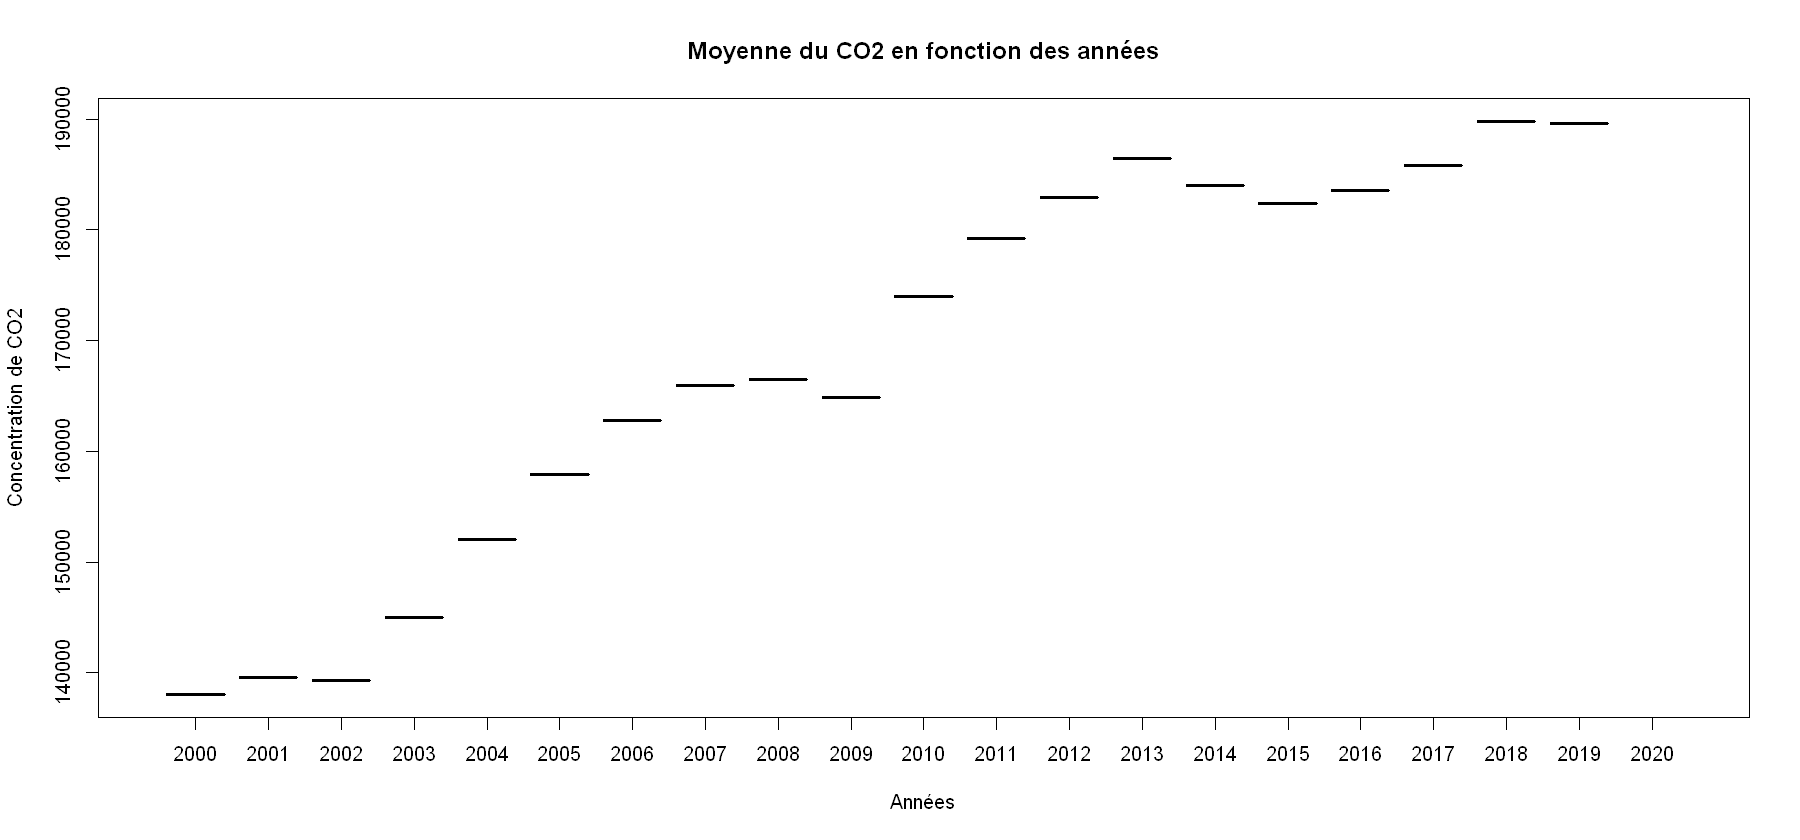

In [27]:
# Variable à prédire : Value-co2-emissions renommée en Value_CO2

Tab = data.frame(data$Year, data$Value_CO2)
colnames(Tab) = c("Year", "Value_CO2") # je récupère les deux variables que je veux utiliser
#str(Tab)                              # data frame : 2868 * 2

Moy_annee = aggregate(Value_CO2 ~ Year, data = Tab, FUN = mean) # moyenne du CO2 selon les années, stockée dans un data frame 

plot(Moy_annee$Value_CO2 ~ Moy_annee$Year, main = "Moyenne du CO2 en fonction des années",
     xlab = "Années", ylab = "Concentration de CO2")

print('Pourcentage augmentation :')
pourc_augm = (Moy_annee$Value_CO2[20] - Moy_annee$Value_CO2[1]) / Moy_annee$Value_CO2[1] *100
print(pourc_augm)

**Interprétation**

On observe nettement que la moyenne de CO2 augmente très fortement avec les années. Celle-ci passe de 140000 metric tons per capita en 2000 à près de 190000 en 2019. Entre 2000 et 2020 on observe donc une augmentation de 37,38%.

La modélisation que nous allons faire ne prend pas en compte les variables qualitatives soient 'Year' et 'Entity'. Mais il est important de se rappeler qu'il y a une  nette infulence de ces variables sur la prédicton de CO2. Elle dépend beaucoup du pays et de l'année comme on a pu le montrer pécédement. 
Cependant, il semblerait que l'année et le pays soient représentés par les autres variables : chaque pays par année a différentes valeur d'Access_to_fuels, d'Acces_to_elec ... La valeur de CO2 est en faite liée aux variables quantitavies qui sont effectivement différentes d'un pays à l'autre et d'une année à l'autre. C'est cela qui influe la valeur du CO2 et non littéralement la valeur qualitative de l'année ou du pays. 

---

# Modélisation

---

Après cette analyse exploratoire, nous considérons maintenant le problème de modélisation et prédiction de la variable CO2. Nous mettons en place divers algorithmes de régression afin de la prédire et nous comparerons les résultats obtenus. Pour cette partie, nous utilisons le jeu de données sans valeurs manquantes avec les variables recentrées par les transformations logarithmiques.

***Retrait de Elec_from_fossil***

La variable CO2 étant très corrélée avec la variable Elec_from_fossil, nous l'enlevons du jeu de données dans un but éducatif.

In [28]:
data_centre <- data_centre[,-6]

##  1. Création des échantillons d'apprentissage et de test

Cette étape est essentielle pour évaluer la qualité d'une prédiciton. Il est nécessaire d'évaluer l'erreur d'apprentissage en utilisant des données différentes de celles qui ont servi à l'entrainement. On garde donc 20% des données pour faire les tests. Cela va nous permettre d'évaluer la performance réelle du modèle sur des données non vues. Cela simule le scénario où le modèle est déployé sur de nouvelles observations et évalue la capacité du modèle à s'adapter à un nouveau jeu de données.

In [29]:
#Fonction pour afficher les résidus 

gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+#xlim(-2000000, 2000000)+ylim(-9000000, 1500000)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}

In [30]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti =data_centre[,3:17]
n_ind = nrow(data_quanti) # nombre de lignes dans les données
n_var = ncol(data_quanti) # nombre de colonnes
n_test = ceiling(n_ind * ratio_test) # Taille de l'échantillon test (ceiling = arrondis sup)

print(paste0("Nombre d'individus (total) : " , n_ind))
print(paste0("Nombre de variables : " , n_var))
print(paste0("Taille de l'échantillon de test (20% individus totaux): " , n_test))

indices_test = sample(1:n_ind, n_test) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr = setdiff(1:n_ind, indices_test)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr = data_quanti[indices_appr,] # Echantillon d'apprentissage ; CO2 = 9e var de data_centre
data_test = data_quanti[indices_test,] # Echantillon test

CO2_appr = data_quanti[indices_appr, 9]
CO2_test = data_quanti[indices_test, 9]

paste("Résumé de l'échantillon d'apprentissage : ", dim(data_appr)[1], "individus et ", dim(data_appr)[2], "variables")
paste("Résumé de l'échantillon de test : ", dim(data_test)[1], "individus et ", dim(data_test)[2], "variables")
paste("Résumé de CO2_appr : ",length(CO2_appr), "individus")
paste("Résumé de CO2_test : ", length(CO2_test), "individus")

[1] "Nombre d'individus (total) : 2868"
[1] "Nombre de variables : 15"
[1] "Taille de l'échantillon de test (20% individus totaux): 574"


[1] "Résumé de l'échantillon d'apprentissage :  2294 individus et  15 variables"

[1] "Résumé de l'échantillon de test :  574 individus et  15 variables"

[1] "Résumé de CO2_appr :  2294 individus"

[1] "Résumé de CO2_test :  574 individus"

Nous allons effetcuer nos tests avec table de contingence en regardant si la prédiction que la valeur du CO2 est plus grande que la valeur moyenne mondiale. 

In [32]:
CO2_moy = mean(data_quanti[, 9])
paste('Valeur moyenne du CO2 au cours des ans = ',CO2_moy)

[1] "Valeur moyenne du CO2 au cours des ans =  9.32953182079607"

## 2. Etablissement des différents modèles de régression

Nous implétons ici les différents algorithme de régression afin de prédire la variable CO2 : Modèles Linéaires (pénalisés ou non), SVR, Arbre, Forêts Aléatoires, Boosting et Réseaux de Neurones.

## Modèle Linéaire

### Régression linéaire sans sélection de variable

Nous avons ici uniquement des variables qualitatives donc nous allons effectuer une regression linéaire multiple (lm). La régression linéaire multiple permet d'examiner comment plusieurs variables quantitatives influencent une variable dépendante quantitative.

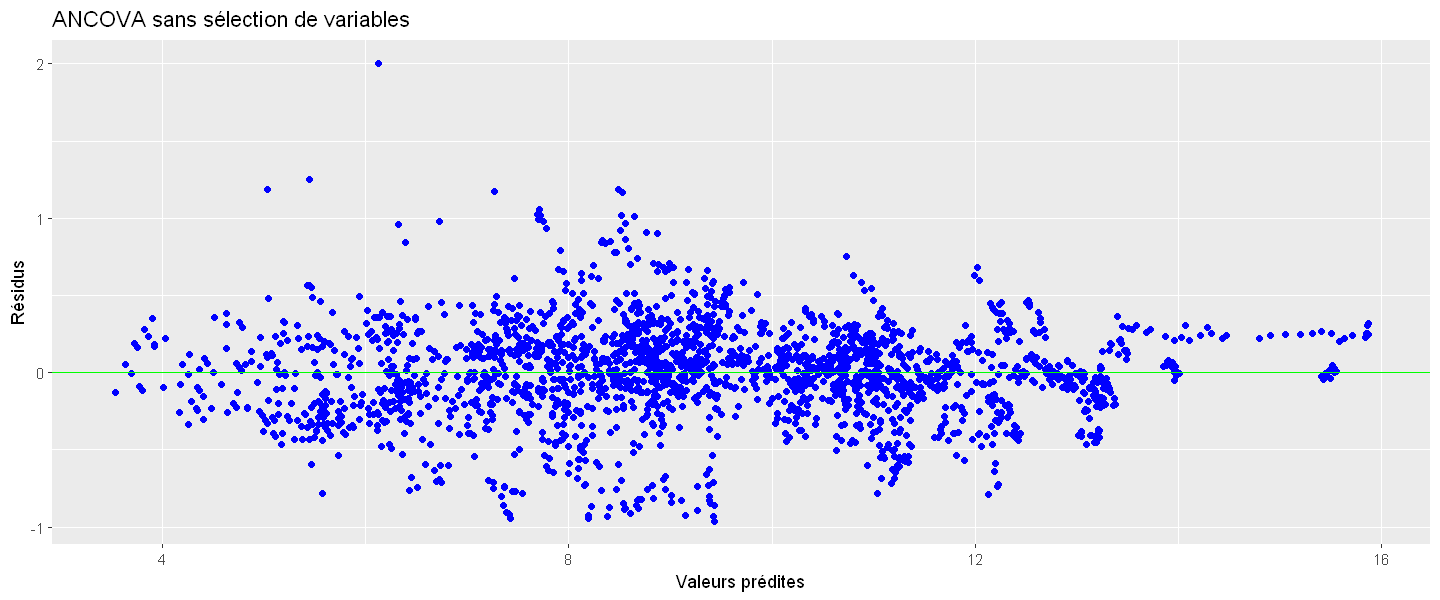

In [33]:
# Estimation du modèle sans interaction

reg.lm = lm(L_Value_CO2 ~ . , data=data_appr) # ANCOVA  car qualitatif + quantitatif

res.lm= reg.lm$residuals                   # Extraction des résidus
fit.lm = reg.lm$fitted.values               # Extraction des valeurs ajustées

# Affichage des résidus 

options(repr.plot.width = 12, repr.plot.height = 5)
gplot.res(fit.lm,res.lm,"ANCOVA sans sélection de variables") 

In [34]:
summary(reg.lm)


Call:
lm(formula = L_Value_CO2 ~ ., data = data_appr)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.96216 -0.16657  0.00362  0.18476  2.00458 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.390e+01  1.453e-01 -95.682  < 2e-16 ***
Access_to_elec            1.051e-02  5.376e-04  19.544  < 2e-16 ***
Access_to_fuels          -3.028e-03  4.634e-04  -6.535 7.82e-11 ***
Renewable_energy_share   -1.016e-02  5.548e-04 -18.323  < 2e-16 ***
L_Elec_from_nuclear      -4.191e-03  6.853e-03  -0.611 0.540945    
L_Elec_from_renewables   -1.871e-02  8.878e-03  -2.107 0.035217 *  
Low_carbon_elec          -4.382e-03  2.765e-04 -15.848  < 2e-16 ***
L_Prim_energy_cons        4.816e-01  1.538e-02  31.321  < 2e-16 ***
L_Energy_intensity_level  2.124e-01  1.836e-02  11.568  < 2e-16 ***
Gdp_growth               -6.036e-03  1.374e-03  -4.393 1.17e-05 ***
L_Gdp_capita              2.851e-01  1.214e-02  23.479  < 2e-16 ***
L_Density 

**Interprétation :**

Dans ce modèle, on observe des résidus centrés autour de 0.

En enlevant indépendement les variables les unes des autres, on remarque (grâce à la p-valeur : plus grande valeur du seuil pour rejeter l'hypothèse nulle) que les variables de L_Elec_from_nuclear, L_Elec_from_renewables et Longitude peuvent être enlevées. 

---

In [230]:
pred.lm = predict(reg.lm, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lm = mean(res.lm^2) # Moyenne des carrés des résidus
r2_lm = cor(data_test$L_Value_CO2, pred.lm)^2

paste("Erreur apprentissage pour régression linéaire sans intéraction = ", mse_lm)
paste("Coefficient R2 : ", r2_lm)

[1] "Erreur apprentissage pour régression linéaire sans intéraction =  0.0928213998198594"

[1] "Coefficient R2 :  0.985364967269392"

**Interprétation :**

Le R2 est proche de 1 donc le modèle est plutôt de qualité. Il permet d'expliquer plus de 98% de la variance de la variable à prédire. 

L'erreur d'apprentissage faible nous indique la prédiciton est proche du résutat 'réel'. 

---

#### Prévison de l'échantillon test

##### Erreur de regression 

In [41]:
e_reg_lm = sum((pred.lm-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec lm = ', e_reg_lm)

[1] "Erreur de régression avec lm =  0.083993212002193"

**Interprétation :**

Ce modèle a une erreur de régression très faible. De plus, précédemment on a vu que son erreur quadratique moyenne était du même ordre de grandeur.

---

##### Erreur de classification

In [146]:
table(pred.lm>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282   19
  TRUE      4  269

**Interprétation :**

Enfin ici, on remarque qu'on a relativement peu de Faux négatifs et plus de Faux positifs. Nous allons voir s'il est possible de le simplifier en appliquant une méthode de sélection de variables.

---

### Régression Linéaire avec selection de variables AIC :

 On va effectuer une sélection de modèle automatique en utilisant le critère d'information AIC. Cette méthode compare différents modèles en ajoutant ou supprimant des variables pour minimiser le critère AIC.

In [43]:
library(MASS)

In [44]:
step_model <- stepAIC(reg.lm, direction = "both") 

Start:  AIC=-5423.02
L_Value_CO2 ~ Access_to_elec + Access_to_fuels + Renewable_energy_share + 
    L_Elec_from_nuclear + L_Elec_from_renewables + Low_carbon_elec + 
    L_Prim_energy_cons + L_Energy_intensity_level + Gdp_growth + 
    L_Gdp_capita + L_Density + L_Land_area + Latitude + Longitude

                           Df Sum of Sq    RSS     AIC
- L_Elec_from_nuclear       1       0.0  213.0 -5424.6
<none>                                   212.9 -5423.0
- Longitude                 1       0.2  213.2 -5422.6
- L_Elec_from_renewables    1       0.4  213.3 -5420.6
- Latitude                  1       1.3  214.3 -5410.5
- Gdp_growth                1       1.8  214.7 -5405.7
- Access_to_fuels           1       4.0  216.9 -5382.4
- L_Energy_intensity_level  1      12.5  225.4 -5294.1
- Low_carbon_elec           1      23.5  236.4 -5185.2
- Renewable_energy_share    1      31.4  244.3 -5109.8
- Access_to_elec            1      35.7  248.6 -5069.6
- L_Gdp_capita              1      51.5  

**Interprétation :**

En faisant une méthode de sélection de variable, on remarque que la seule variable qui a été supprimée est L_Elec_From_Nuclear. Cela n'est pas surprenant, on a vu précédemment que cette variable influait peu dans notre modèle, qu'elle pouvait être enlevée.

---

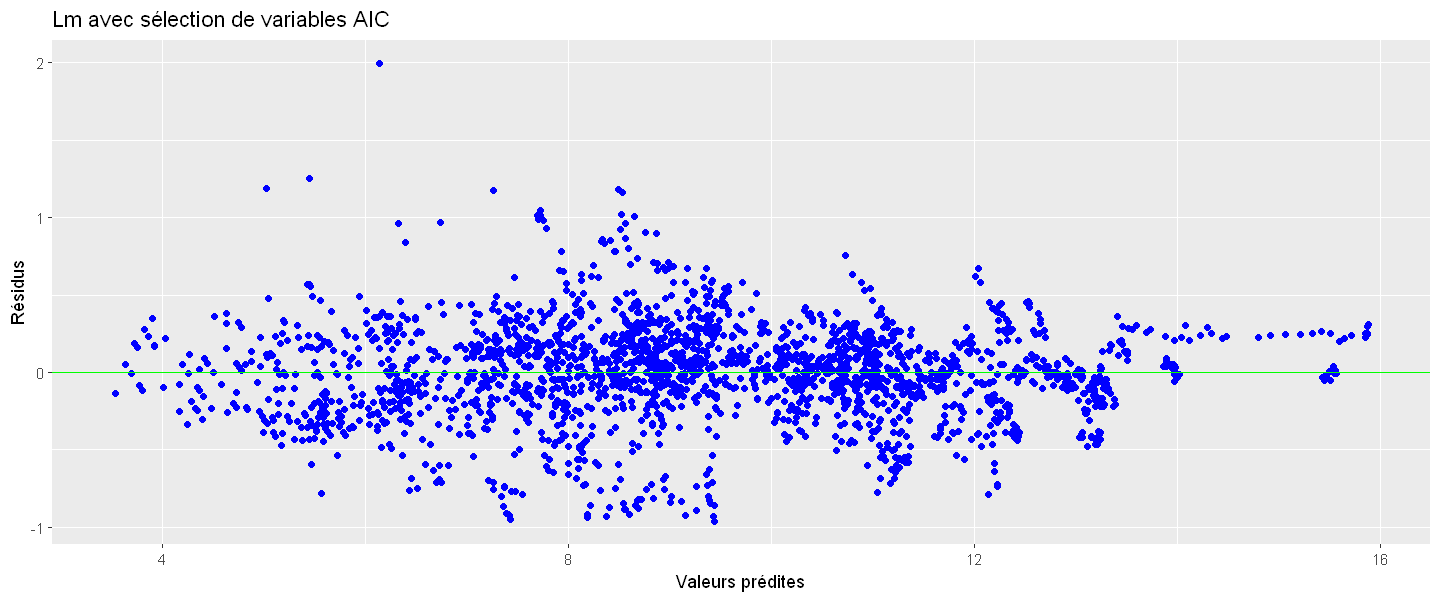

In [231]:
res.AIC <- residuals(step_model)                 
fit.AIC <- fitted(step_model)

#Affichage des résidus 

options(repr.plot.width = 12, repr.plot.height = 5)
gplot.res(fit.AIC,res.AIC,"Lm avec sélection de variables AIC")

**Interprétation :**

Nous obtenons toujours de "bons" résidus qui sont centrés autour de 0 de variance plutôt faible.

---

In [233]:
pred.AIC = predict(step_model, data_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_AIC = mean(res.AIC^2) # Moyenne des carrés des résidus
r2_AIC = cor(data_test$L_Value_CO2, pred.AIC)^2

paste("Erreur apprentissage pour régression linéaire savec sélection de variables AIC = ", mse_AIC)
paste("Coefficient R2 : ", r2_AIC)

[1] "Erreur apprentissage pour régression linéaire savec sélection de variables AIC =  0.0928366285362125"

[1] "Coefficient R2 :  0.985342650399131"

**Interprétation :**

On remarque l'erreur quadratique moyenne a augmenté de 0.01. Toujours 98% de la variance du CO2 est représentée. 

---

#### Prévison de l'échantillon test 

##### Erreur de regression

In [47]:
e_reg_AIC = sum((pred.AIC-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec lm selection par AIC = ', e_reg_AIC)

[1] "Erreur de régression avec lm selection par AIC =  0.0841223245044354"

##### Erreur de classification

In [147]:
table(pred.AIC>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282   19
  TRUE      4  269

**Interprétation :**

L'erreur de régression ainsi que le nombre de faux négatifs et faux positifs sont identiques avec le modèle de sélection de variable AIC. Il est donc possible de simplifier le modèle sans perdre de la qualité de prédiciton. 

---

### Régression linéaire avec selection de variable Lasso

Nous appliquons ici la pénalisation Lasso qui permet de sélectionner des variables en appliquant une pénalisation l1.

Avec la méthode Lasso, le but est de minimiser : $\frac{1}{2n_{samples}}||Y - X\beta||^2_2 + \lambda||\beta||_1$

- Ici, on va faire varier le paramètre lambda qui se trouve devant la pénalité l1. Mettre lambda = 0 revient à réaliser une méthode de moindres carrés. Lambda contrôle le niveau de régularisation : si lambda est grand les coefficients seront plus petits et  la sélection des variables sera plus stricte. 
- Les $\beta_j$ sont les coefficients associés à chaque variable qui vont être réduis et\ou mis à zéros. 

In [49]:
library(glmnet)

Warning message:
"le package 'glmnet' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : Matrix


Attachement du package : 'Matrix'


Les objets suivants sont masqués depuis 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-8



#### Modèle sans paramétrisation

In [234]:
x.mat = model.matrix(L_Value_CO2 ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève l'intercept.

#### Choix du paramètre de pénalisation $\lambda$

Cherchons à determiner par validation croisée la meilleur valeur de lambda pour ce modèle Lasso.

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.011"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.002 en log vaut : -6.21460809842219"

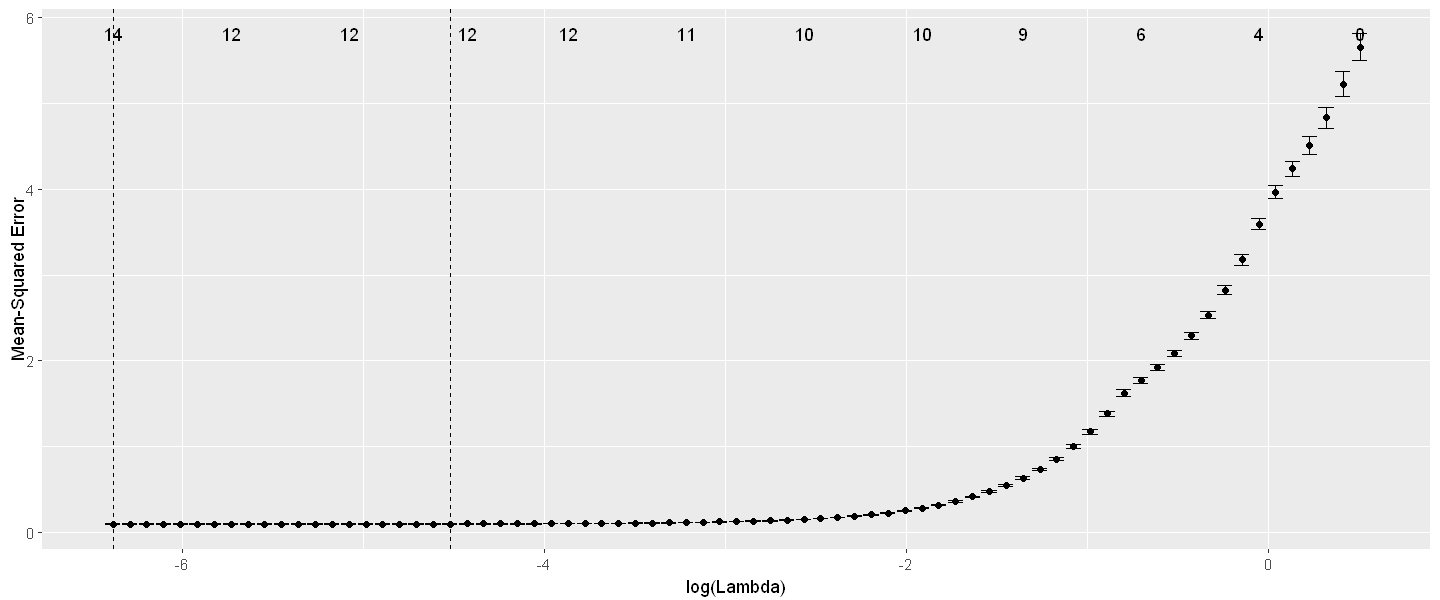

In [235]:
reg.lasso.cv = cv.glmnet(y = data_appr$L_Value_CO2, x = x.mat)
autoplot(reg.lasso.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.lasso.cv$lambda.min, 3), "en log vaut :",log(round(reg.lasso.cv$lambda.min, 3)))

**Interprétation :**

Cet autoplot représente l'erreur de généralisation pour différents valeurs de la pénalité $\lambda$ (R fait automatiquement de la validation croisée).

Les deux droites verticales représentent :
- Première : la lambda pour la plus petite erreur.
- Seconde : le plus grand lambda pour que l'erreur moyenne de prédiction soit dans l'intervalle de confiance pour lambda_min.

---

**Interprétation:**

Lambda_min permet la selection de moins de variables mais est celui qui minimise l'erreur de régression. Nous allons utiliser lambda_1se afin d'avoir un modèle plus parcimonieux et éviter le surajustement.

---

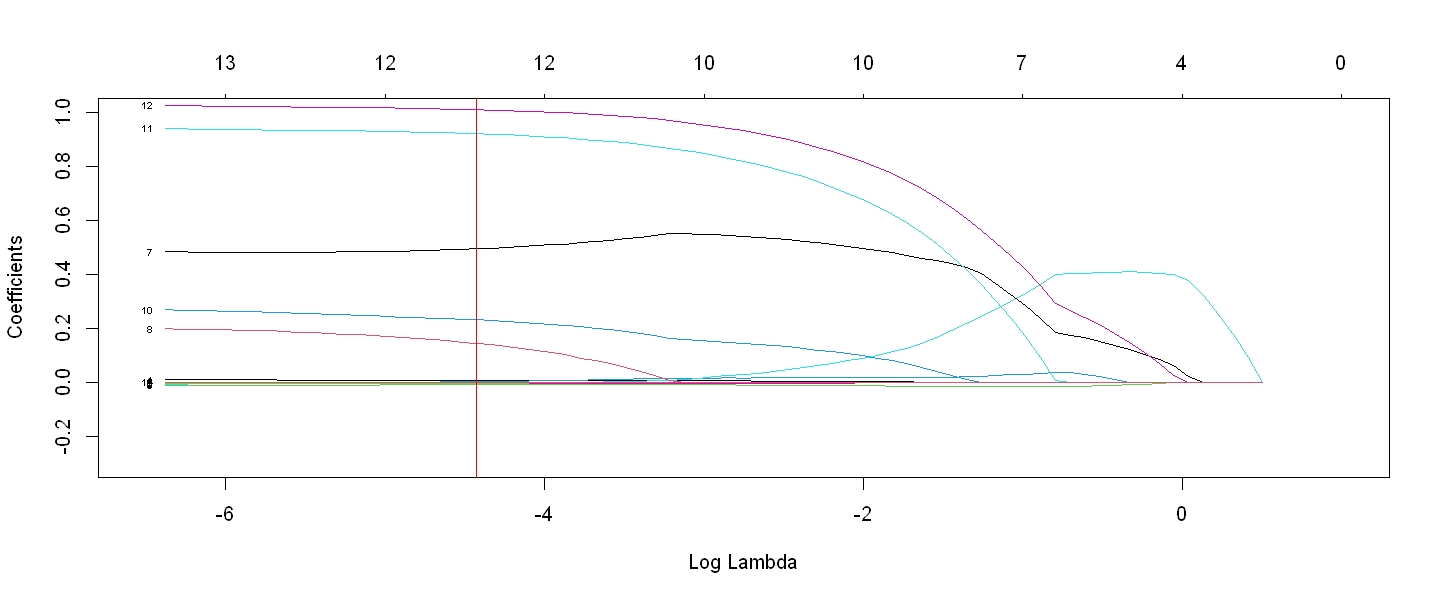

In [52]:
plot(reg.lasso, xvar = "lambda", label = TRUE,xlim=c(-6.5,1),ylim=c(-0.3,1))
abline(v=log(reg.lasso.cv$lambda.1se),col="red")  #avec min est ce que y'a pas bcp trop de variables ?

**Interprétation :**

Nous affichons ici les valeurs des coefficients devant chaque variable pour différentes valeurs de pénalité $\lambda$. On voit qu'au niveau de lambda choisi (droite verticale rouge), une minorité de coefficients sont à 0. 

Vérifions la liste des coefficeint mis à 0 pour $\lambda = \lambda.1se$. 

In [53]:
coef_list <- coef(reg.lasso.cv, s = "lambda.1se")
coef_list

15 x 1 sparse Matrix of class "dgCMatrix"
                                    s1
(Intercept)              -1.314970e+01
Access_to_elec            8.257844e-03
Access_to_fuels           .           
Renewable_energy_share   -8.879444e-03
L_Elec_from_nuclear       3.214235e-03
L_Elec_from_renewables    .           
Low_carbon_elec          -4.705204e-03
L_Prim_energy_cons        4.953578e-01
L_Energy_intensity_level  1.443021e-01
Gdp_growth               -2.659471e-03
L_Gdp_capita              2.316392e-01
L_Density                 9.208202e-01
L_Land_area               1.010037e+00
Latitude                  1.180203e-03
Longitude                 1.289361e-04

**Interprétation :**

2 coefficents ont été mis à 0 : ceux devant 'Access_to_elec' et 'L_Elec_from_renewables'. Ces résultats sont différents de la sélection par critère AIC. Cela s’explique notamment car la solution obtenue par Lasso n’est pas unique et LASSO n'utilise pas la même pénalisation. Nous ne sommes pas surpris pas le retrait de la variable 'L_Elec_from_renewables' qui était donnée comme peu importante par la regression linéaire. 

On peut aussi observer que la variable qui influe le plus est la superficie du pays (plus il est grand, plus il va émettre du CO2 comme les Etats-Unis et la Chine notamment).

---

Nous calculons nos erreurs et prédicions entre le modèle linéaire sans sélection et le modèle linéaire avec pénalisation Lasso pour $\lambda =$ lambda.1se

In [237]:
fit.lasso = predict(reg.lasso.cv, s = "lambda.1se", newx = x.mat)
res.lasso = data_appr$L_Value_CO2 - fit.lasso

x.mat_test = model.matrix(L_Value_CO2 ~ . - 1, data = data_test) 

pred.lasso = predict(reg.lasso.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lasso = mean(res.lasso^2) # Moyenne des carrés des résidus
r2_lasso = cor(data_test$L_Value_CO2, pred.lasso)^2

paste("Erreur apprentissage pour régression linéaire sans intéraction = ", mse_lasso)
paste("Coefficient R2 : ", r2_lasso)

[1] "Erreur apprentissage pour régression linéaire sans intéraction =  0.0961827408482092"

[1] "Coefficient R2 :  0.984720815963624"

**Interprétation :**

On remarque que l'erreur quadratique moyenne est quasi-idientique à celle du modèle de sélection par critère AIC. On peut donc en conclure qu'en simplifiant notre modèle, on réduit que très peu la qualité d'explicativité de notre variable Value_CO2.

---

#### Prédiction de l'échantillon test

##### Erreur de regression

In [57]:
e_reg_lasso = sum((pred.lasso-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec lm Lasso = ', e_reg_lasso)

[1] "Erreur de régression avec lm Lasso =  0.0888244584955355"

##### Erreur de classification

In [148]:
table(pred.lasso>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   283   20
  TRUE      3  268

Le nombre de faux négatifs baisse avec cette selection mais le nombre de faux positifs augmentent. 

### Régression linéaire avec pénalisation Ridge

Il est aussi possible d’ajuster notre modèle en appliquant une pénalisation l2. cela ne va pas faire de la sélection de variable mais nous apporter une solution unique.

Dans ce modèle, notre but est de minimiser cette fonction : $||Y - X\beta||^2_2 + \lambda||\beta||^2_2$.
On va donc chercher à optimiser le paramètre lambda qui se trouve devant le terme de pénalisation l2. 

$\lambda$ est le paramètre de régularisation. Ce paramètre contrôle la force de la pénalisation appliquée aux coefficients du modèle. Plus $\lambda$ est grand, plus la pénalité sur les coefficients est forte, ce qui conduit à des solutions plus régulières. On fait de l'over-fitting quand la pénalité vaut 0 et de l'under-fitting quand elle est trop grande.

In [60]:
x.mat = model.matrix(L_Value_CO2 ~ . - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.
reg.ridge = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 0)
options(repr.plot.width = 6, repr.plot.height = 5)
reg.ridge.cv = cv.glmnet(y =data_appr$L_Value_CO2, x = x.mat, alpha = 0)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.ridge.cv$lambda.min, 3))
paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
coef(reg.ridge.cv, s="lambda.1se")

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.166"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.166"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

15 x 1 sparse Matrix of class "dgCMatrix"
                                   s1
(Intercept)              -7.428568861
Access_to_elec            0.007107897
Access_to_fuels           0.002922945
Renewable_energy_share   -0.011423945
L_Elec_from_nuclear       0.049455804
L_Elec_from_renewables    0.229452099
Low_carbon_elec          -0.007335091
L_Prim_energy_cons        0.275494036
L_Energy_intensity_level  0.247393964
Gdp_growth               -0.001042337
L_Gdp_capita              0.201288892
L_Density                 0.656816877
L_Land_area               0.766502522
Latitude                  0.003806023
Longitude                 0.001304822

**Interprétation :**

Dans ce modèle on remarque que l'intercept est très important. 

La variable qui influe le plus est toujours Land_area mais son coefficient est plus petit car on a appliqué une pénalisation. 

On remarque aussi que Density influe beaucoup, notamment car ces deux variables sont très corrélées.

---

Effectuons de la validation croisée pour trouver la meilleur valeur de lambda. 

[1] "CV estimate of lambda : 0.166"

Warning message in plot.window(...):
""xvar" n'est pas un paramètre graphique"
Warning message in plot.window(...):
""label" n'est pas un paramètre graphique"
Warning message in plot.xy(xy, type, ...):
""xvar" n'est pas un paramètre graphique"
Warning message in plot.xy(xy, type, ...):
""label" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""label" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""xvar" n'est pas un paramètre graphique"
Warning message in axis(side = side, at = at, labels = labels, ...):
""label" n'est pas un paramètre graphique"
Warning message in box(...):
""xvar" n'est pas un paramètre graphique"
Warning message in box(...):
""label" n'est pas un paramètre graphique"
Warning message in title(...):
""xvar" n'est pas un paramètre graphique"
Warning 

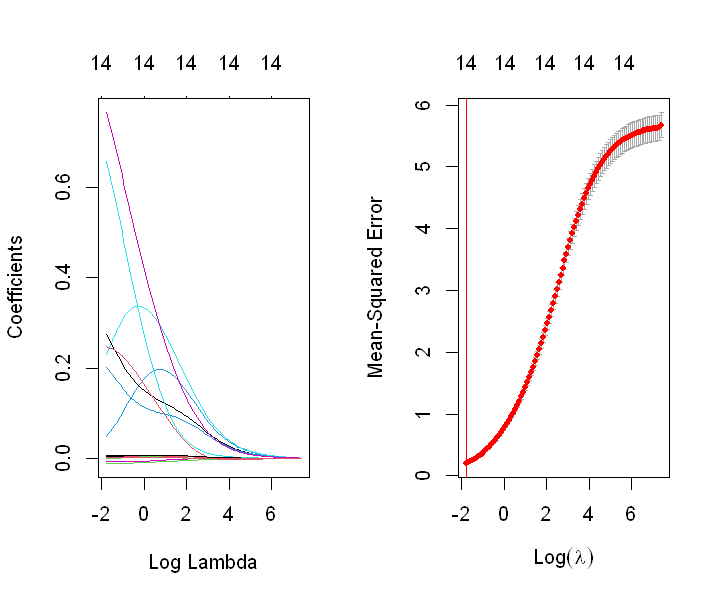

In [61]:
paste("CV estimate of lambda :", round(reg.ridge.cv$lambda.1se, 3))
par(mfrow = c(1, 2))
plot(reg.ridge, xvar = "lambda", label = TRUE)
plot(reg.ridge.cv, xvar = "lambda", label = TRUE)
abline(v=log(reg.ridge.cv$lambda.1se),col="red")

**Interprétation:**

Nous trouvons une valeur de lambda faible qui n'apporte pas de modification à notre modèle. 

---

In [62]:
# Modèle Linéaire, Ridge, Lambda_min

fit.ridge = predict(reg.ridge.cv, s = "lambda.1se", newx = x.mat)
res.ridge = data_appr$L_Value_CO2 - fit.ridge

x.mat_test = model.matrix(L_Value_CO2 ~ . - 1, data = data_test)

pred.ridge = predict(reg.ridge.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_ridge = mean(res.ridge^2) # Moyenne des carrés des résidus
r2_ridge = cor(data_test$L_Value_CO2, pred.ridge)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_ridge)
paste("Coefficient R2 : ", r2_ridge)

[1] "MSE pour régression linéaire sans intéraction =  0.200495585848981"

[1] "Coefficient R2 :  0.969824466588457"

**Interprétation :**

Cependant, on obtient une erreur quadratique moyenne nettement supérieure à celles des modèles précédents. On en conclut que ce modèle explique moins bien nos données que les précédents.

---

#### Prédiction de l'échantillon test 

##### Erreur de regression

In [63]:
e_reg_ridge = sum((pred.ridge-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec ridge = ', e_reg_ridge)

[1] "Erreur de régression avec ridge =  0.19390878306266"

##### Erreur de classification

In [149]:
table(pred.ridge>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282   18
  TRUE      4  270

**Interprétation :**

Pour le modèle linéaire avec pénalisation Ridge, l'erreur de régression est plus élevée que pour les modèles précédents. La classification est similaire. 

---

### Régression linéaire quadratique sans sélection de variable

On a pu remarquer dans l’analyse exploratoire que certaines variables étaient très corrélées les unes avec les autres. On va donc s’intéresser maintenant à leurs interactions et comment cela influe sur la valeur du CO2 émis.

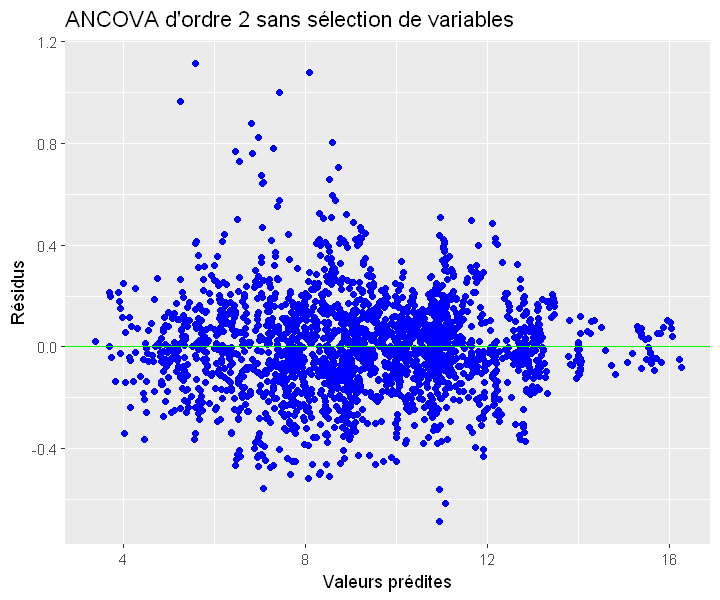

In [65]:
# Estimation du modèle avec intéraction d'ordre 2

reg.lm2 = lm(L_Value_CO2 ~ .^2 , data=data_appr) # ANCOVA  car qualitatif + quantitatif
res.lm2 = reg.lm2$residuals                     # Extraction des résidus
fit.lm2 = reg.lm2$fitted.values                 # Extraction des valeurs ajustées

gplot.res(fit.lm2,res.lm2,"ANCOVA d'ordre 2 sans sélection de variables")

In [66]:
summary(reg.lm2)


Call:
lm(formula = L_Value_CO2 ~ .^2, data = data_appr)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6844 -0.1026 -0.0063  0.1038  1.1151 

Coefficients:
                                                  Estimate Std. Error t value
(Intercept)                                     -1.480e+01  1.696e+00  -8.728
Access_to_elec                                  -8.863e-02  1.300e-02  -6.816
Access_to_fuels                                  2.344e-02  9.551e-03   2.454
Renewable_energy_share                          -7.031e-02  1.119e-02  -6.283
L_Elec_from_nuclear                             -9.389e-02  3.116e-01  -0.301
L_Elec_from_renewables                           3.541e-01  1.557e-01   2.275
Low_carbon_elec                                  1.312e-02  6.563e-03   1.998
L_Prim_energy_cons                               4.561e-01  2.050e-01   2.225
L_Energy_intensity_level                         1.067e+00  2.723e-01   3.918
Gdp_growth                                       2.811

De nombreuses intéractions entre les variables peuvent être elevées. 

In [67]:
# coef(reg.lm2)

CO2_pred_lm2 = predict(reg.lm2, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_lm2 =  mean(res.lm2^2) # Erreur quadratique moyenne 

r2_2 = summary(reg.lm2)$r.squared #cor(data_test$L_Value_CO2, CO2_pred_lm2)^2

paste0("Erreur quadratique moyenne avec intéraction ordre 2 : ", mse_lm2)
paste0("Coefficient R2 : ", r2_2)

[1] "Erreur quadratique moyenne avec intéraction ordre 2 : 0.0346637902553491"

[1] "Coefficient R2 : 0.993890201784009"

**Interprétation :**

On observe dans ce modèle qu’on a largement réduit l’erreur quadratique moyenne comparé aux modèles linéaires précédents. Il semble donc plus intéressant de considérer les interactions entre les variables. On arrive à représenter ici plus de 99% de la variance de notre variable à prédire. 

---

#### Prédiction de l'échantillon test 

##### Erreur de regression

In [68]:
pred.lm2= CO2_pred_lm2
e_reg_lm2 = sum((pred.lm2-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec lm', e_reg_lm2)

[1] "Erreur de régression avec lm 0.0407131868372934"

##### Erreur de classification

In [150]:
table(pred.lm2>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282    7
  TRUE      4  281

On obtient ici une classification bien meilleur.  

### Régression linéaire quadratique avec sélection Lasso

Ce modèle étant plus complexe et ayant beaucoup plus de variables, on va appliquer une méthode de sélection de variable. On utilise pour cela la pénalisation Lasso qui est moins couteuse en temps de calcul que la sélection par critère AIC.

De la même façon que précédement, on cherche la meilleure valeur de lambda par validation croisée

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.002"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.001 en log vaut : -6.21460809842219"

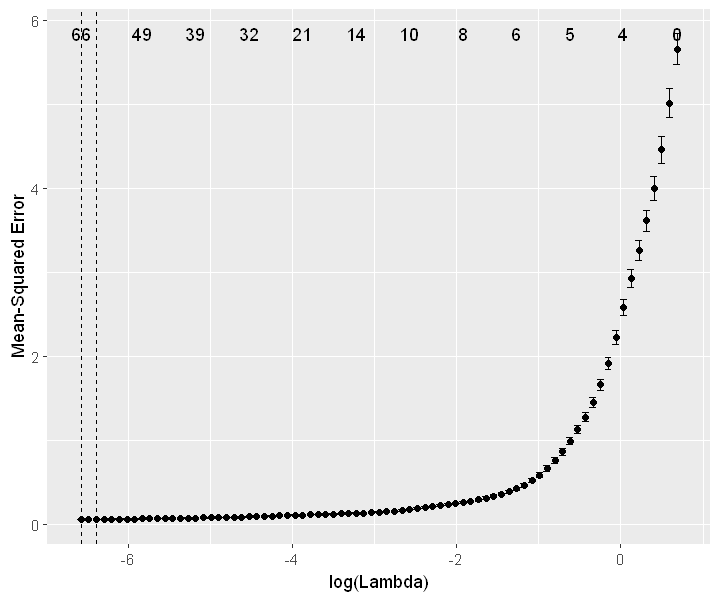

In [70]:
x.mat <- model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_appr)# on récupère la matrice de design, on enlève l'intercept.
reg.lasso2 = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 1)

reg.lasso2.cv = cv.glmnet(y = data_appr$L_Value_CO2, x = x.mat)
autoplot(reg.lasso2.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.lasso2.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.lasso2.cv$lambda.min, 3), "en log vaut :",log(round(reg.lasso.cv$lambda.min, 3)))

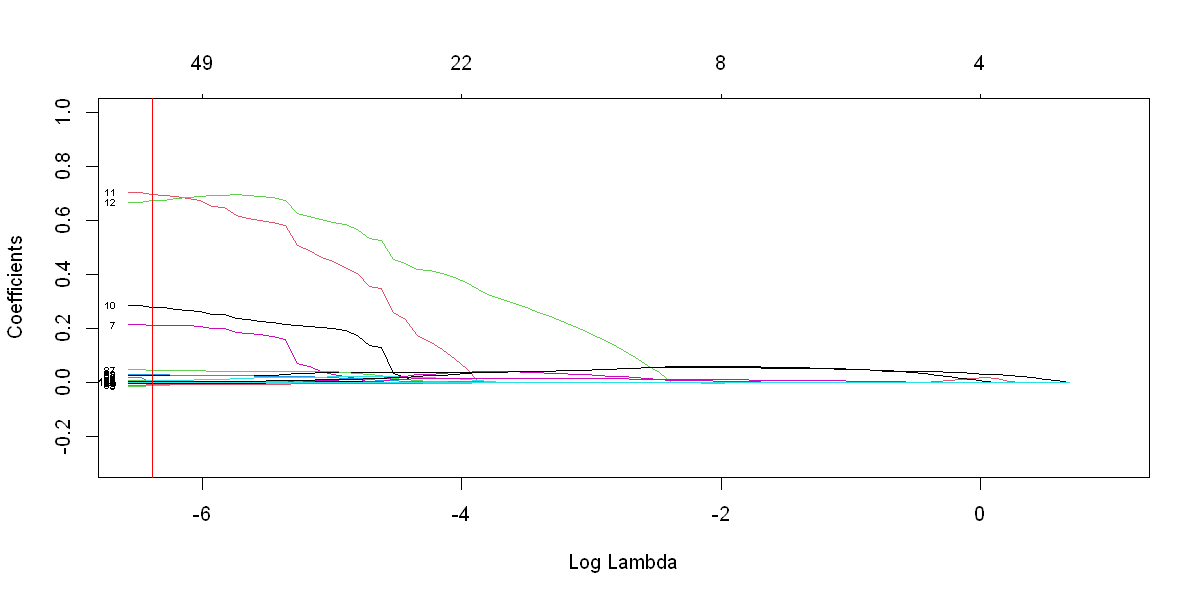

In [71]:
options(repr.plot.width = 10, repr.plot.height = 5)
plot(reg.lasso2, xvar = "lambda", label = TRUE,xlim=c(-6.5,1),ylim=c(-0.3,1))
abline(v=log(reg.lasso2.cv$lambda.1se),col="red")  #avec min est ce que y'a pas bcp trop de variables ?

**Interprétation :**

Nous gardons la valeur des coefficients pour lambda 1se, au niveau de la droite rouge. On remarque que plusieurs coefficients semblent être mis à 0. 

---

**Liste des coefficients:**

In [72]:
coef_list <- coef(reg.lasso2.cv, s = "lambda.1se")
print(paste("Nombre de coefficients :", length(coef_list)))
print(paste("Nombre de coefficients enlevés :", sum(coef_list==0)))

[1] "Nombre de coefficients : 106"
[1] "Nombre de coefficients enlevés : 42"


**Interprétation :**

La méthode permet d'annuler 42 coefficients sur les 106 présents initialement. On simplifie de façon non négligeable notre modèle.

---

In [73]:
fit.lasso2 = predict(reg.lasso2.cv, s = "lambda.1se", newx = x.mat)
res.lasso2 = data_appr$L_Value_CO2 - fit.lasso2

x.mat_test = model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_test) 

pred.lasso2 = predict(reg.lasso2.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_lasso2 = mean(res.lasso2^2) # Moyenne des carrés des résidus
r2_lasso2 = cor(data_test$L_Value_CO2, pred.lasso2)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_lasso2)
paste("Coefficient R2 : ", r2_lasso2)

[1] "MSE pour régression linéaire sans intéraction =  0.0531100143041922"

[1] "Coefficient R2 :  0.990066571735495"

**Interprétation :**

Néanmoins, cette simplification a augmenté notre erreur de régression. On note cependant qu’elle reste inférieure à celle des modèles sans les interactions.

---

#### Prédiciton de l'échantillon test 

##### Erreur de régression

In [75]:
e_reg_lasso2 = sum((pred.lasso2-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec lm2 lasso =', e_reg_lasso2)

[1] "Erreur de régression avec lm2 lasso = 0.0573232242849295"

##### Erreur de classification

In [151]:
table(pred.lasso2>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282   13
  TRUE      4  275

On perd en qualité de classification avec cette selection de variables. 

### Régression linéaire quadratique avec pénalisation Ridge

Enfin, de la même manière que précédemment nous allons appliquer une pénalisation Ridge sur notre modèle.
De la même façon que pour le modèle sans interaction on cherche la meilleur valeur de lambda par validation croisée. 

[1] "Lambda_1se (méta-paramètre) estimé par validation croisée :  0.198"

[1] "Lambda_min (méta-paramètre) estimé par validation croisée :  0.198"

[1] "Modèle correspondant à lambda1se = meilleur lambda par validation croisée : "

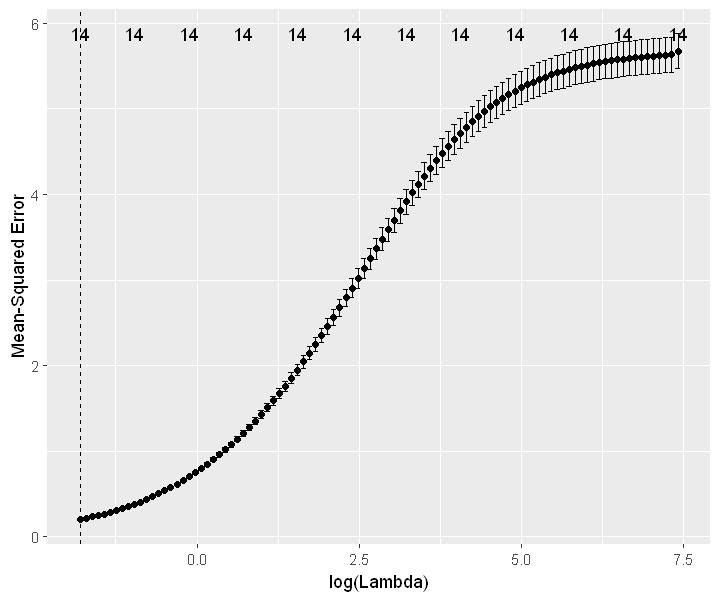

In [78]:
x.mat = model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_appr) # on récupère la matrice de design, on enlève intercept.
reg.ridge2 = glmnet(y = data_appr$L_Value_CO2, x = x.mat, alpha = 0)
options(repr.plot.width = 6, repr.plot.height = 5)
reg.ridge2.cv = cv.glmnet(y =data_appr$L_Value_CO2, x = x.mat, alpha = 0)

autoplot(reg.ridge.cv)

# Choix du meilleur lambda :

paste("Lambda_1se (méta-paramètre) estimé par validation croisée : ", round(reg.ridge2.cv$lambda.1se, 3))
paste("Lambda_min (méta-paramètre) estimé par validation croisée : ", round(reg.ridge2.cv$lambda.min, 3))
paste("Modèle correspondant à lambda1se = meilleur lambda par validation croisée : ")
#coef(reg.ridge.cv, s="lambda.1se")

Lambda_1se et Lambda_min sont les mêmes. L'erreur très varie très peu en simplifiant le modèle. 

[1] "CV estimate of lambda : 0.198"

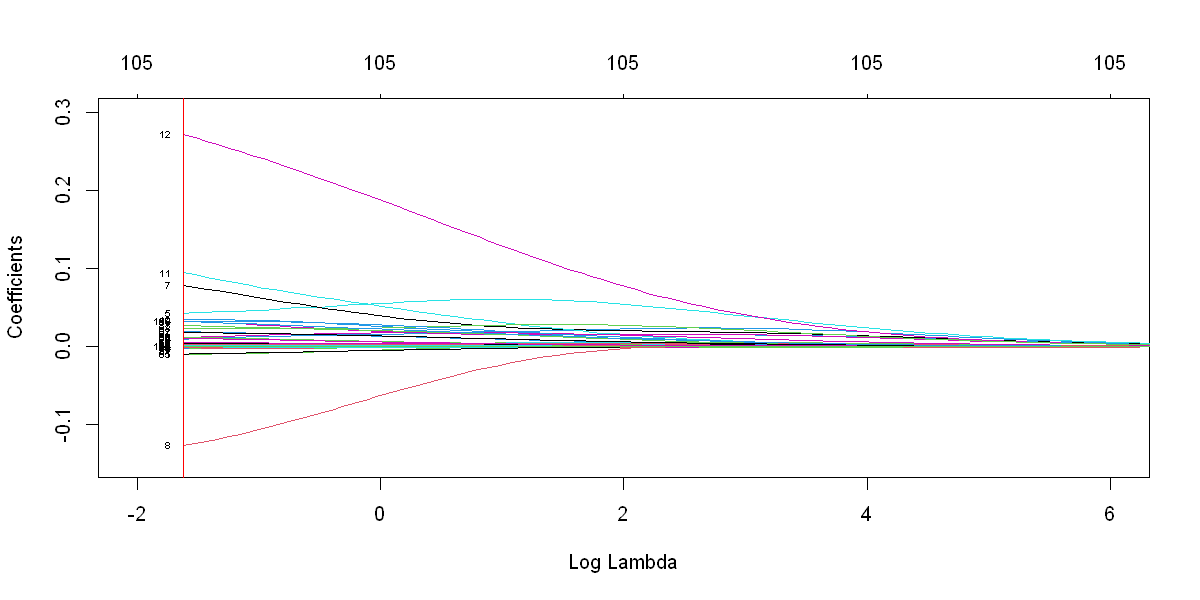

In [79]:
options(repr.plot.width = 10, repr.plot.height = 5)
paste("CV estimate of lambda :", round(reg.ridge2.cv$lambda.1se, 3))
plot(reg.ridge2, xvar = "lambda", label = TRUE,xlim=c(-2,6),ylim=c(-0.15,0.3))
abline(v=log(reg.ridge2.cv$lambda.1se),col="red")

Les coefficients au niveau de la droite rouge sont ceux concervés. 

In [80]:
# Modèle Linéaire, Ridge, Lambda_min

fit.ridge2 = predict(reg.ridge2.cv, s = "lambda.1se", newx = x.mat)
res.ridge2 = data_appr$L_Value_CO2 - fit.ridge2

x.mat_test = model.matrix(L_Value_CO2 ~ .^2 - 1, data = data_test)

CO2_pred_ridge2 = predict(reg.ridge2.cv, s = "lambda.1se", newx=x.mat_test) # Prédiction CO2 avec échantillon test + modèle ancova sans intéraction

mse_ridge2 = mean(res.ridge2^2) # Moyenne des carrés des résidus
r2_ridge2 = cor(data_test$L_Value_CO2, CO2_pred_ridge2)^2

paste("MSE pour régression linéaire sans intéraction = ", mse_ridge2)
paste("Coefficient R2 : ", r2_ridge2)

[1] "MSE pour régression linéaire sans intéraction =  0.094208418511027"

[1] "Coefficient R2 :  0.983135301468905"

En appliquant une pénalisation l2 sur nos données, on obtient une erreur de régression supérieure.

#### Prédiction de l'échantillon

##### Erreur de régression

In [82]:
pred.ridge2= CO2_pred_ridge2 
e_reg_ridge2 = sum((pred.ridge2-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression l2 avec ridge ,= µ', e_reg_ridge2)

[1] "Erreur de régression l2 avec ridge ,= µ 0.101366842997749"

##### Erreur de classification

In [152]:
table(pred.ridge2>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   285   13
  TRUE      1  275

La classification ridge est peu meilleur et nous permet de baisse le nombre de faux négatifs. 

### Comparaison des méthodes linéaires

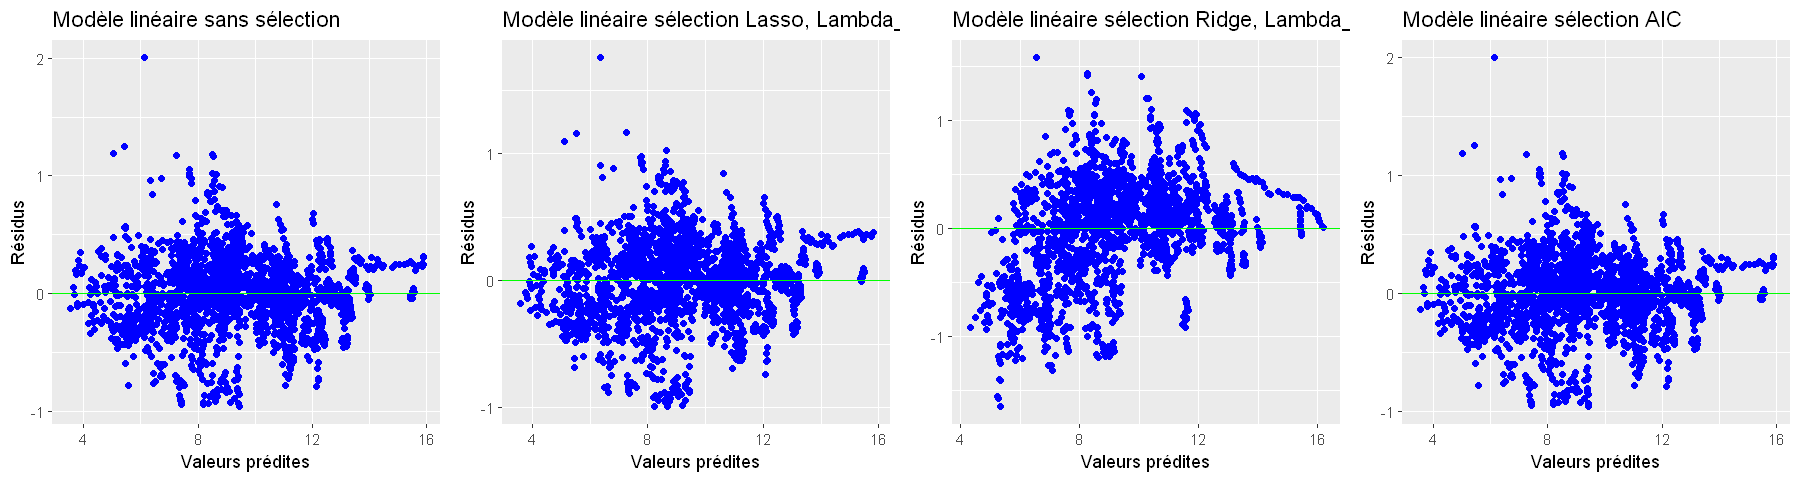

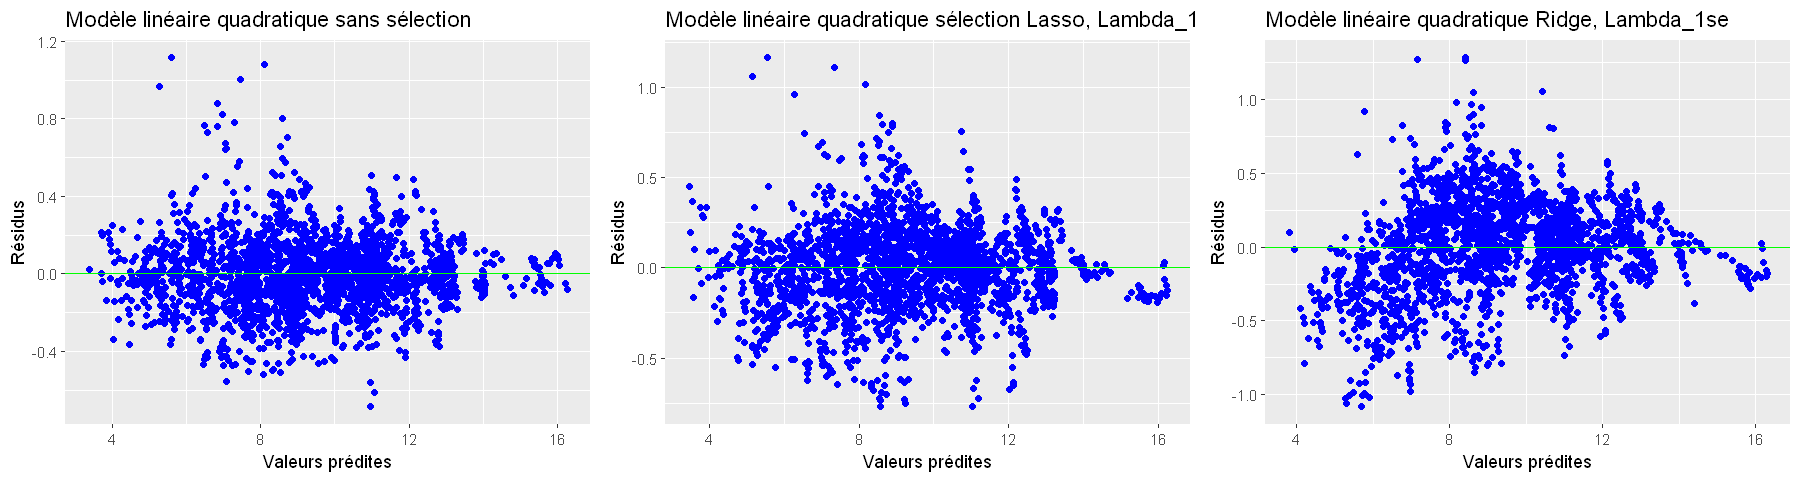

In [153]:
# Affichage
options(repr.plot.width = 15, repr.plot.height = 4)
par(mfrow = c(1, 3))
g1= gplot.res(fit.lm,res.lm,"Modèle linéaire sans sélection")
g3= gplot.res(fit.lasso, res.lasso, "Modèle linéaire sélection Lasso, Lambda_1se")
g4= gplot.res(fit.ridge, res.ridge, "Modèle linéaire sélection Ridge, Lambda_1se")
g7= gplot.res(fit.AIC, res.AIC, "Modèle linéaire sélection AIC")

g2= gplot.res(fit.lm2,res.lm2,"Modèle linéaire quadratique sans sélection")
g5= gplot.res(fit.lasso2, res.lasso2, "Modèle linéaire quadratique sélection Lasso, Lambda_1se")
g6= gplot.res(fit.ridge2, res.ridge2, "Modèle linéaire quadratique Ridge, Lambda_1se")

grid.arrange(g1,g3,g4,g7,ncol=4)
grid.arrange(g2,g5,g6,ncol=3)

**Interprétation :**

On observe que dès lors qu’on applique une pénalisation l2 (modèle Ridge), on obtient des résidus en forme de banane (erreur plus importante au niveau des valeurs prédites faibles) donc on ne respect pas le critère de variance constante . 

De plus, les résidus qui sont le plus centrés autour de 0 sont ceux des modèles quadratiques 

---

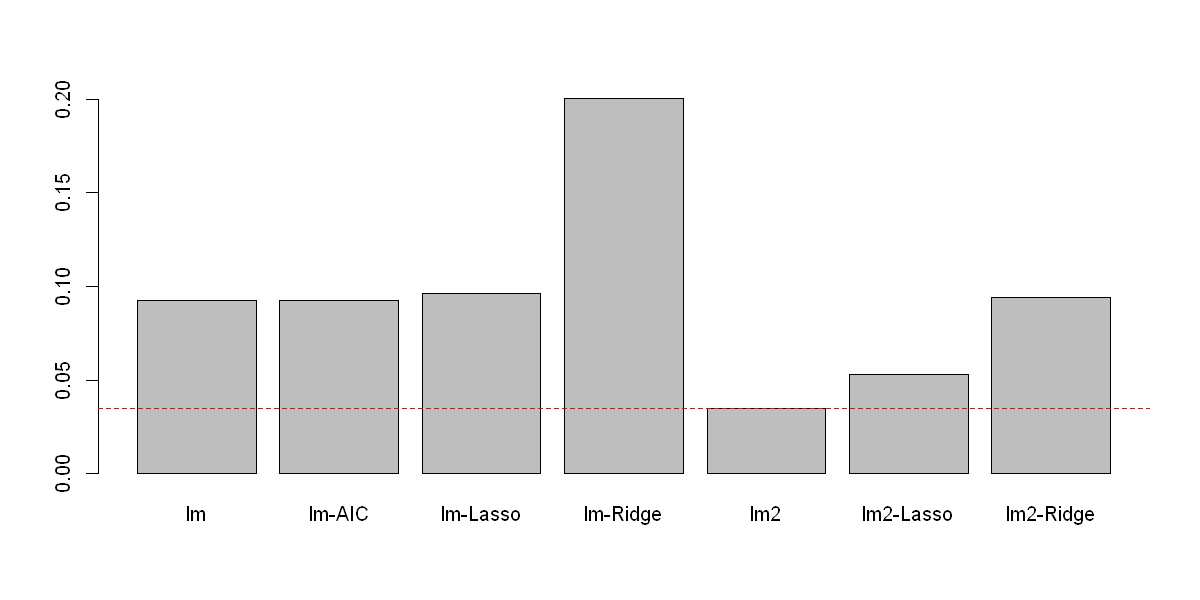

In [154]:
options(repr.plot.width = 10, repr.plot.height = 5)
method_lin <- c("lm","lm-AIC","lm-Lasso","lm-Ridge","lm2","lm2-Lasso","lm2-Ridge")

MSE_tab <- c(mse_lm, mse_AIC,mse_lasso, mse_ridge,mse_lm2,mse_lasso2,mse_ridge2)
barplot(MSE_tab,names.arg = method_lin)
min_MSE = min(MSE_tab)
abline(h = min_MSE, col = "red", lty = 2) 

**Interpretation :**

L'histogramme ci-dessus représente les différentes erreurs moyennes quadratiques de chaque modèle. On cherche à minimiser cette erreur-là. La méthode de regression linéaire avec interaction est la plus efficace des méthodes linéaires suivie de celle avec selection de variables par critère de Lasso.

---

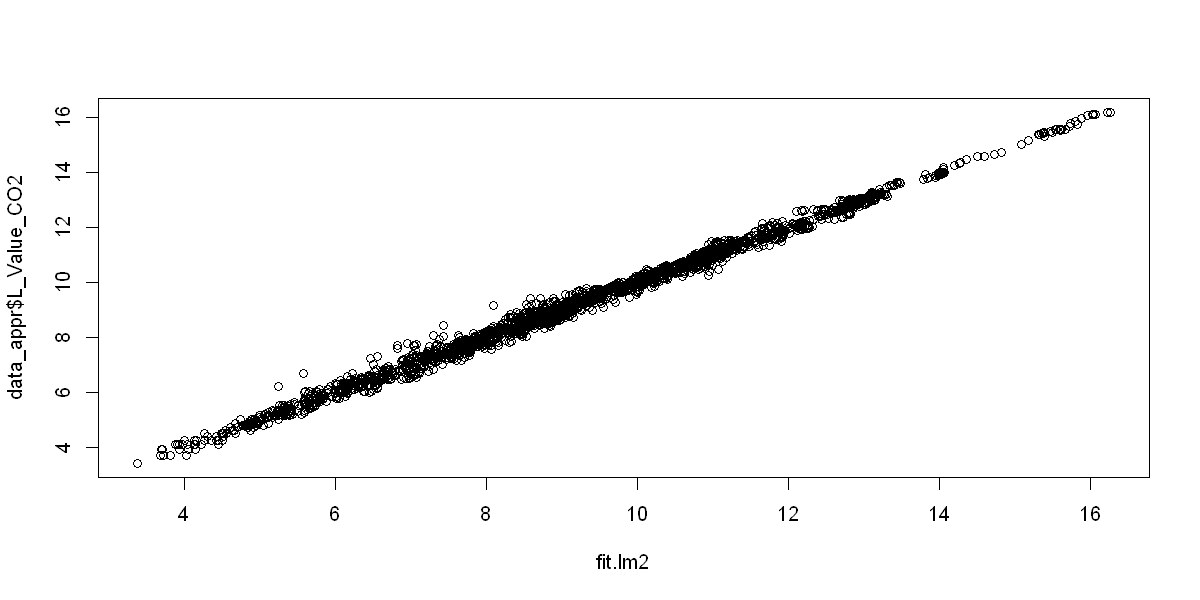

In [89]:
plot(fit.lm2,data_appr$L_Value_CO2)

**Interprétation :**

La droite a un coefficient directeur de 1 (x=y) or on remarque des outliers rendant la droite plus large. La prédiction est n'est pas optimale. 

---

## SVR

SVR cherche à trouver un hyperplan qui prédit le plus précisément possible les valeurs de sortie continue. Le but de la SVR (Support Vector Regression) est de minimiser l'équation suivante : $\frac{1}{2}||w||^2_2 + C\sum(\epsilon_i+\epsilon_i')$. L'objectif est de s'assurer que les prédictions se trouvent à une distance 
$\epsilon$ des valeurs réelles.

In [90]:
library('MASS')
library('class') # pour kNN
library('caret')
library('e1071')
library(glmnet)
library(ROCR)

Warning message:
"le package 'caret' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : lattice


Attachement du package : 'caret'


Les objets suivants sont masqués depuis 'package:Metrics':

    precision, recall


Warning message:
"le package 'e1071' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'ROCR' a été compilé avec la version R 4.3.3"


### Choix des paramètres 

Il nous faut choisir le kernel, le paramère de régularisation $\epsilon$ et C.
- Le kernel détermine la nature de la transformation des données pour capturer des relations non linéaires. On choisit de prendre un noyau Gaussien car nous avons des données quantitatives et nous avons effectué une transformation logarithmique pour centrer les données. 
-  C détermine la tolérance de mauvaise classification. Si C augmente, le nombre de mauvaises classifications diminue et inversement. Ici, il est calibré par validation croisée. 
- Epsilon ($\epsilon$) représente la tolérance autour des marges. On n'applique pas de pénalité à cet endroit-là.
- Gamma ($\gamma$) définit l'influence d'un seul exemple d'apprentissage : une valeur de gamma élevée permet de mieux expliquer le modèle, mais peut aussi conduire à un surajustement.

In [91]:
#Choix des meilleurs paramètres avec tune
svm.reg.tune = tune.svm(L_Value_CO2 ~ ., data = data_appr, cost = c(60,100,120), 
    gamma = seq(0.01, 0.09, by = 0.02), epsilon=seq(0.01, 0.09, by = 0.02))

svm.reg = svm(L_Value_CO2 ~ ., data = data_appr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)

In [92]:
paste('On retiendra les paramètres : epsilon = ', svm.reg.tune$best.parameters$epsilon,'On retiendra les paramètres : gamma = ', svm.reg.tune$best.parameters$gamma,,  'et C = ',svm.reg.tune$best.parameters$cost) 

[1] "On retiendra les paramètres : epsilon =  0.01 et C =  100"

In [93]:
svm.reg = svm(L_Value_CO2 ~ ., data = data_appr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma, epsilon =svm.reg.tune$best.parameters$epsilon)

In [94]:
summary(svm.reg)


Call:
svm(formula = L_Value_CO2 ~ ., data = data_appr, cost = svm.reg.tune$best.parameters$cost, 
    gamma = svm.reg.tune$best.parameters$gamma)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  100 
      gamma:  0.01 
    epsilon:  0.1 


Number of Support Vectors:  299






### Affichage des résidus

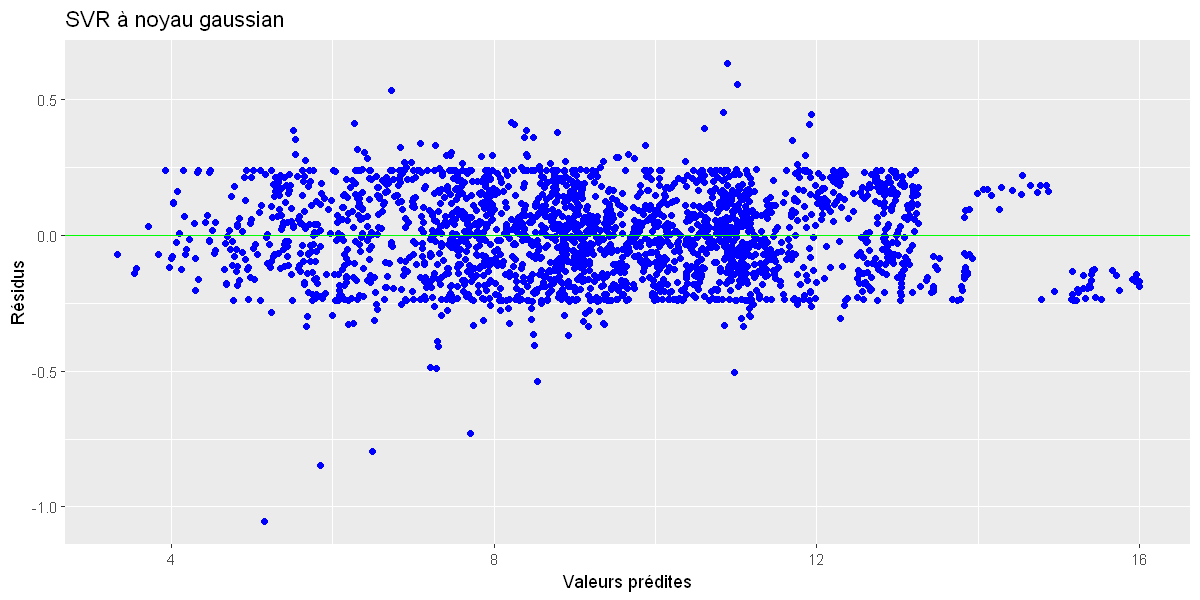

In [95]:
fit.svmr=svm.reg$fitted
res.svmr=fit.svmr-data_appr[,"L_Value_CO2"]

gplot.res(fit.svmr,res.svmr,"SVR à noyau gaussian")

**Interprétation :**

Les résidus ont une forme de 'tube' comme attendu dans une SVR. Cela est du à la marge de la SVR. Les résidus des points de données qui tombent à l'intérieur de ce tube auront des valeurs absolues inférieures ou égales à $\epsilon$. Les résidus seront donc confinés dans une marge de $2\epsilon$ autour de zéro.

---

In [96]:
x.mat_test = model.matrix(L_Value_CO2 ~ . - 1, data = data_test)

CO2_pred_svr = predict(svm.reg, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_svr = mean(res.svmr^2)# Erreur quadratique moyenne 
r2_2 = cor(data_test$L_Value_CO2, CO2_pred_svr)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par SVR avec svr : ", mse_svr)
paste0("Coefficient R2 : ", r2_2)

[1] "Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par SVR avec svr : 0.0254386373146009"

[1] "Coefficient R2 : 0.995031100010473"

On observe ici que l'on a une erreur qui est du même ordre que celle du modèle quadratique. Ce modèle a l'air de bien expliquer notre variable à prédire, plus de 99% de la variance est traduite. 

### Prévision de l'échantillon test

##### Erreur de régression

In [97]:
pred.svmr=predict(svm.reg,newdata=data_test)
e_reg_smv = sum((pred.svmr-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de regression de la SVM: ', e_reg_smv )

[1] "Erreur de regression de la SVM:  0.0286662330865529"

##### Erreur de classification

In [155]:
table(pred.svmr>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282    6
  TRUE      4  282

La classification est bonne. 

##### Affichage des estimations

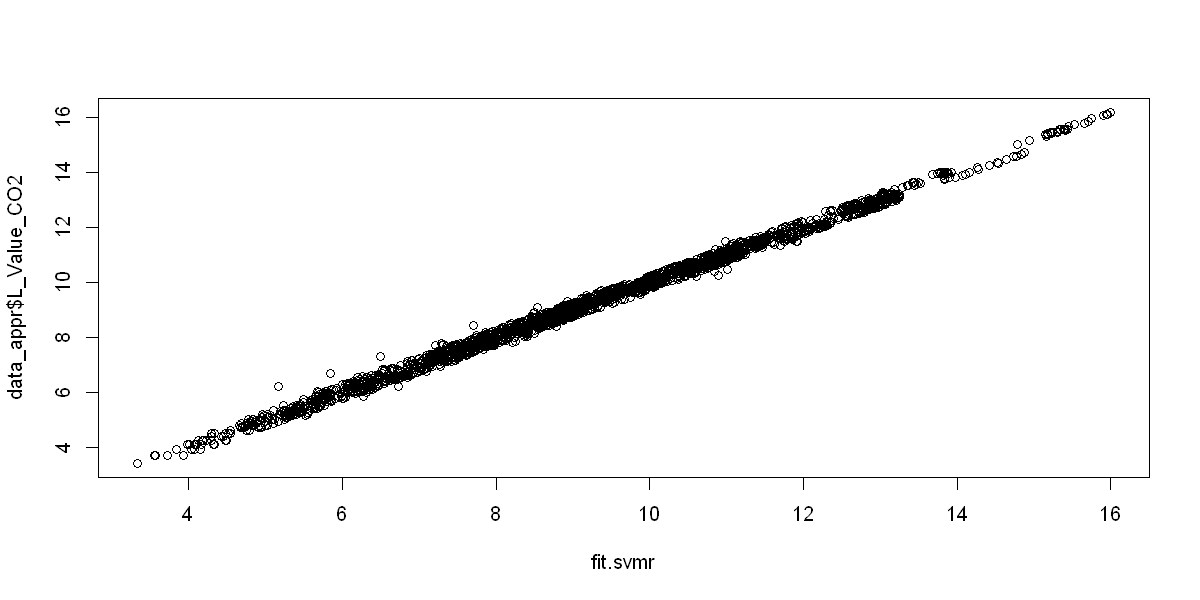

In [99]:
plot(fit.svmr,data_appr$L_Value_CO2)

**Interprétation :**

Nous obtenons une droite de coefficient directeur environ égal à 1. Cela traduit une bonne prédiction. Les valeurs prédites sont proches/égales aux valeurs réelles. On observe tout de même des points plus éloignés de le droite qui correspondent à des erreurs.

---

## Arbre de régression optimal

C'est une méthode non paramétrique qui permet de construire des estimateurs en multidimension. 

Cette méthode a pour but de regrouper nos données selons différentes caractéristiques. Pour cela, à chaque noeud de l'arbre, on va essayer de séparer notre jeu de donnée en fonction d'un seuil d'une variable qui nous permet d'avoir 2 groupes plus homogènes.

In [100]:
library('rpart') 
library(rpart.plot)
library(partykit)

Warning message:
"le package 'rpart.plot' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'partykit' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : grid

Le chargement a nécessité le package : libcoin

Warning message:
"le package 'libcoin' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : mvtnorm

Warning message:
"le package 'mvtnorm' a été compilé avec la version R 4.3.3"


### Reherche de la valeur de cp

cp est le paramètre de complexité qui contrôle la croissance de l'arbre en utilisant le critère de coût-complexité. Une valeur plus grande de cp entraîne un arbre plus petit et plus simple, tandis qu'une valeur plus petite peut conduire à un arbre plus complexe et surajusté. On cherche la valeur du cp qui permet de minimiser l'erreur.

Choix de cp par validation croisée 'CVerr'

In [101]:
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=0.001))

In [102]:
xmat<-xpred.rpart(tree.reg,xval=10) 
CVerr<-apply((xmat-data_appr[,"L_Value_CO2"])^2,2,sum)
print(paste('cp=',as.numeric(attributes(which.min(CVerr))$names)))
tree.reg=rpart(L_Value_CO2~.,data=data_appr,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))

[1] "cp= 0.001012519"


### Affichage de l'arbre et des résidus

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


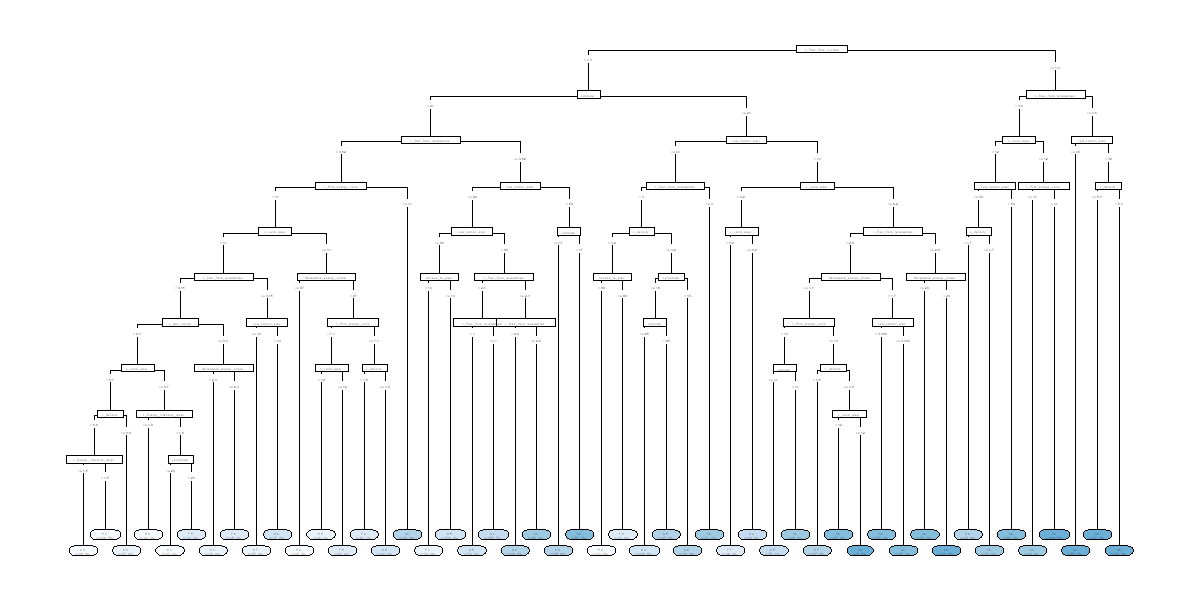

In [103]:
par(mfrow = c(1, 1), mar = c(8, 8, 8, 8))
rpart.plot(tree.reg, type = 5, extra = 101)

**Interprétation :**

L'arbre optenu semble bien équilibré.

---

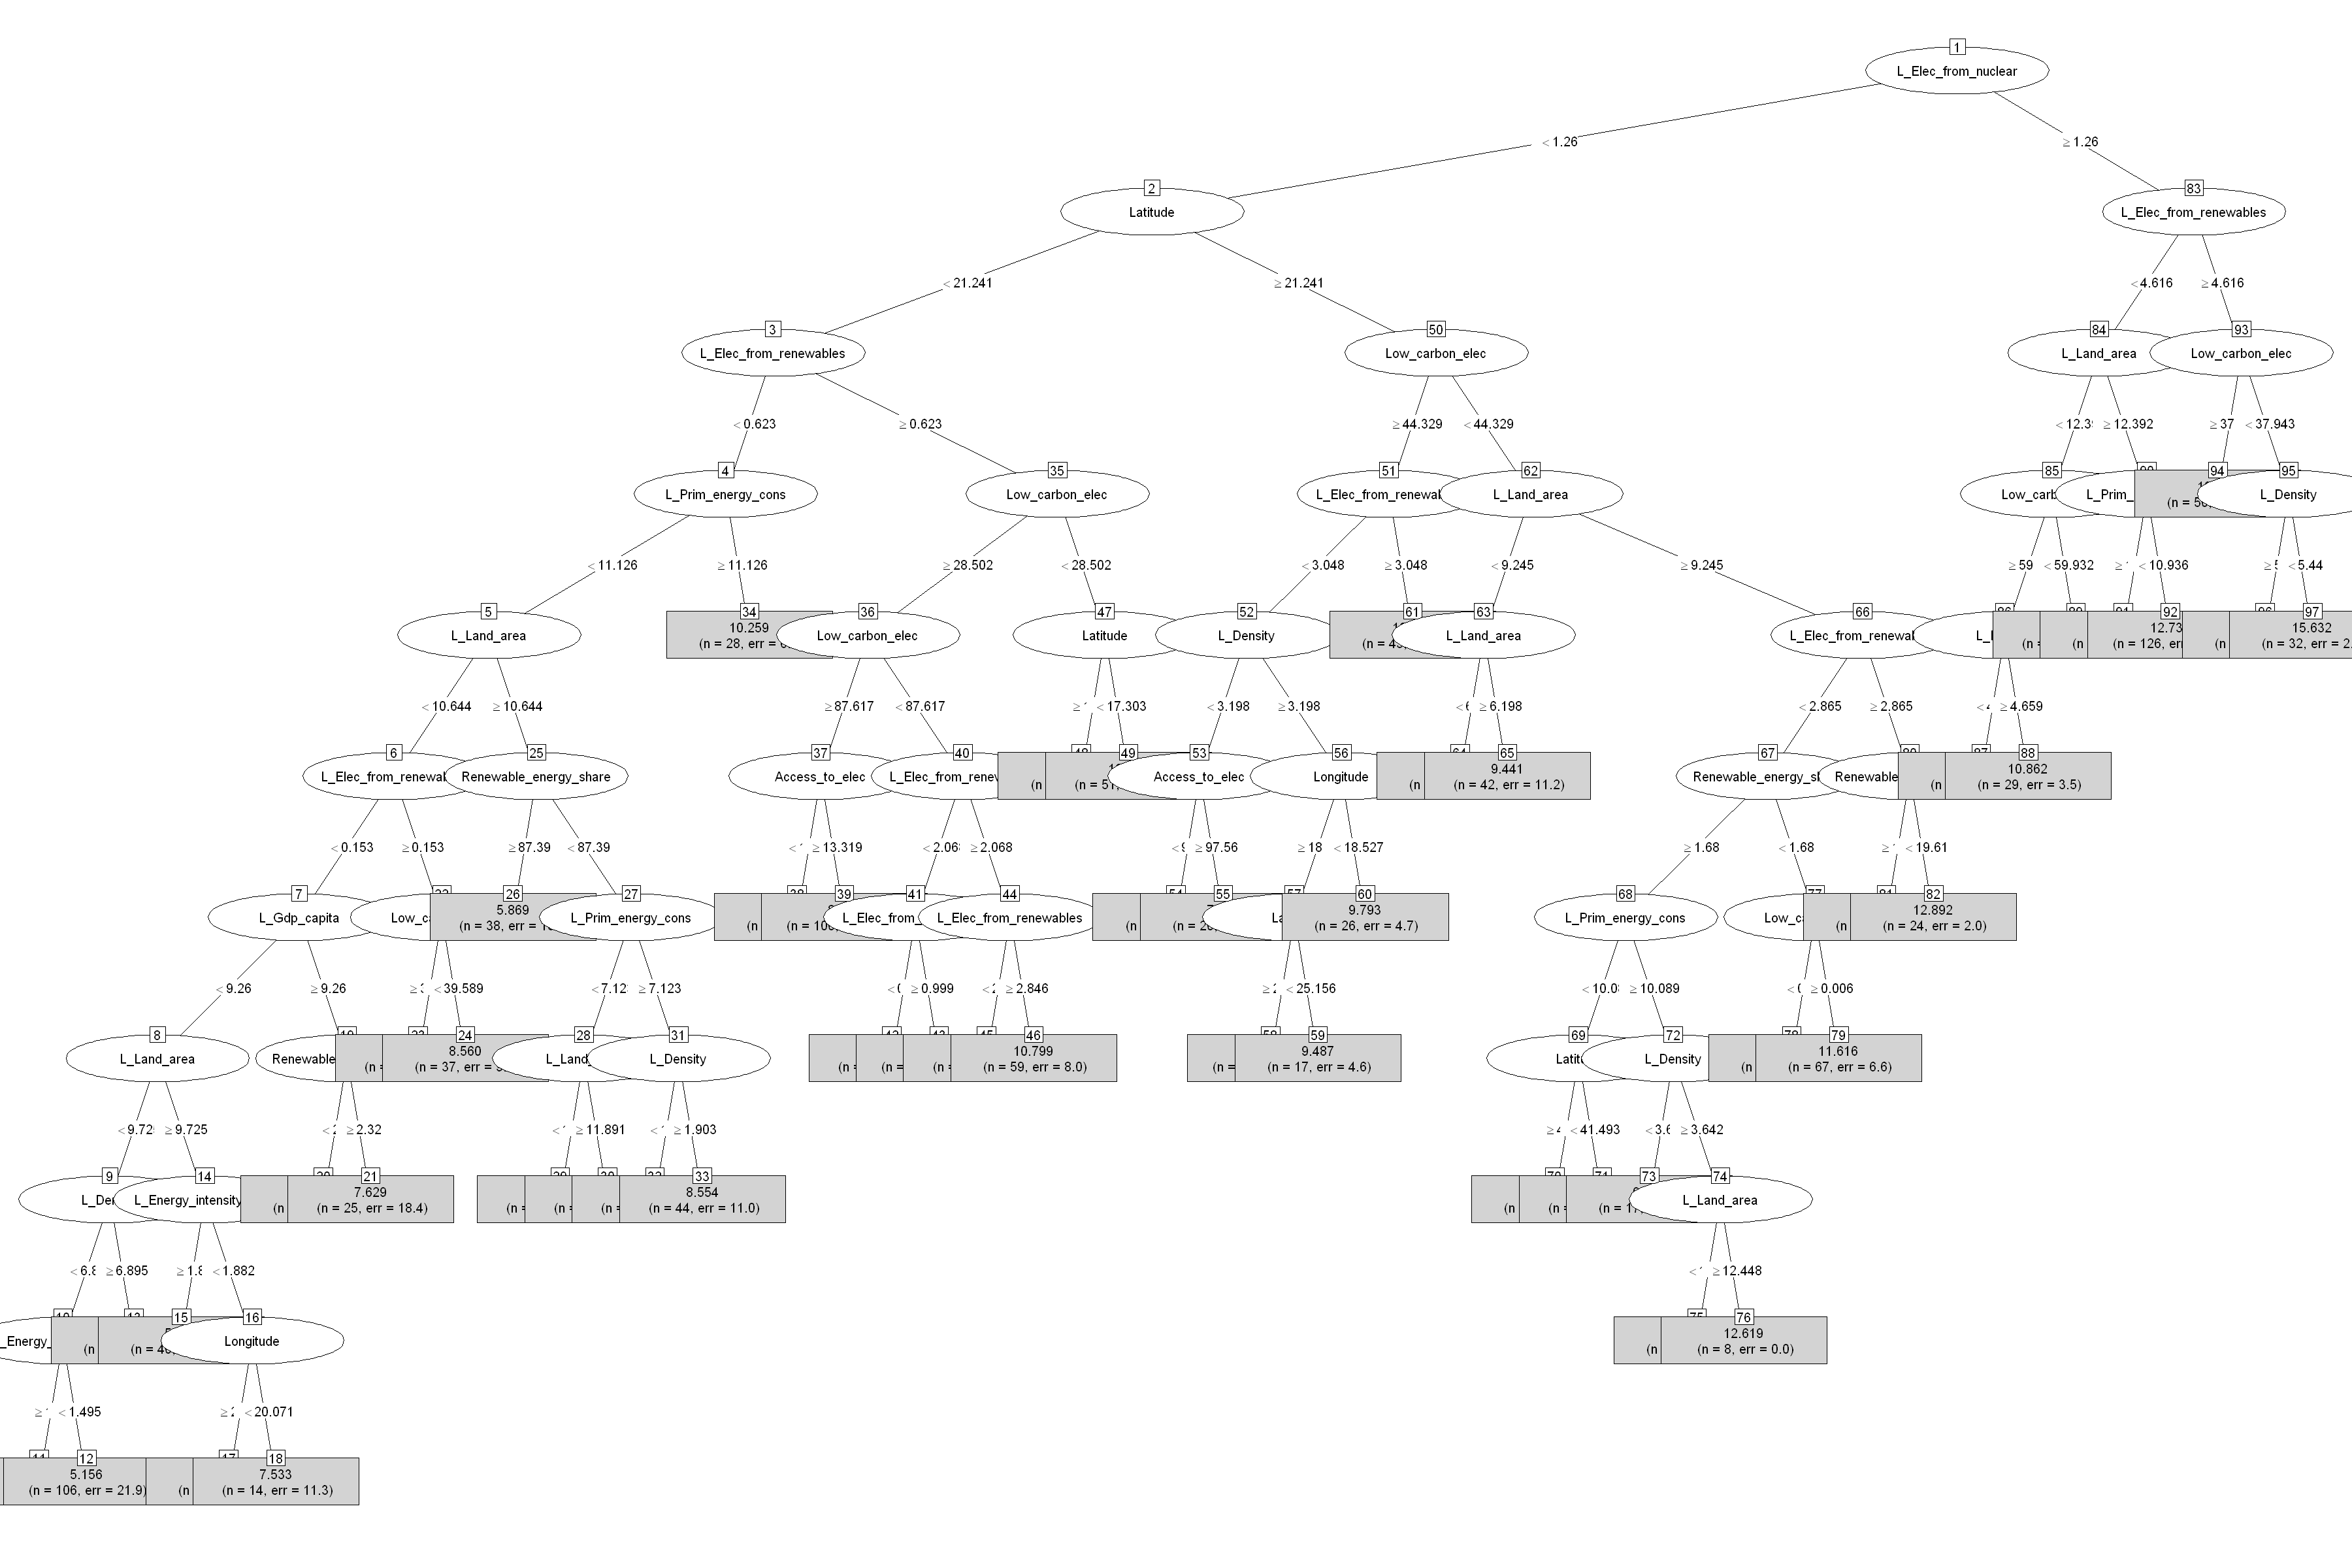

In [104]:
library(partykit)
options(repr.plot.width = 30, repr.plot.height = 20)
plot(as.party(tree.reg), type="simple")

**Interprétation :**

La variable L_Elec_from_nuclear est la variable contribuant le plus à l'interprétation. Elle créer la première séparation de notre jeux de données. Les deux autres variables les plus importantes sont la latitude et l'électricité produite par énergie renouvelable. Cela est cohérant avec l'ACP que nous avons fait précédement : ce sont des variables qui participaient beaucoup aux dimensions 1 et 2 expliquant plus de 50% de la variance du jeu de données. 

---

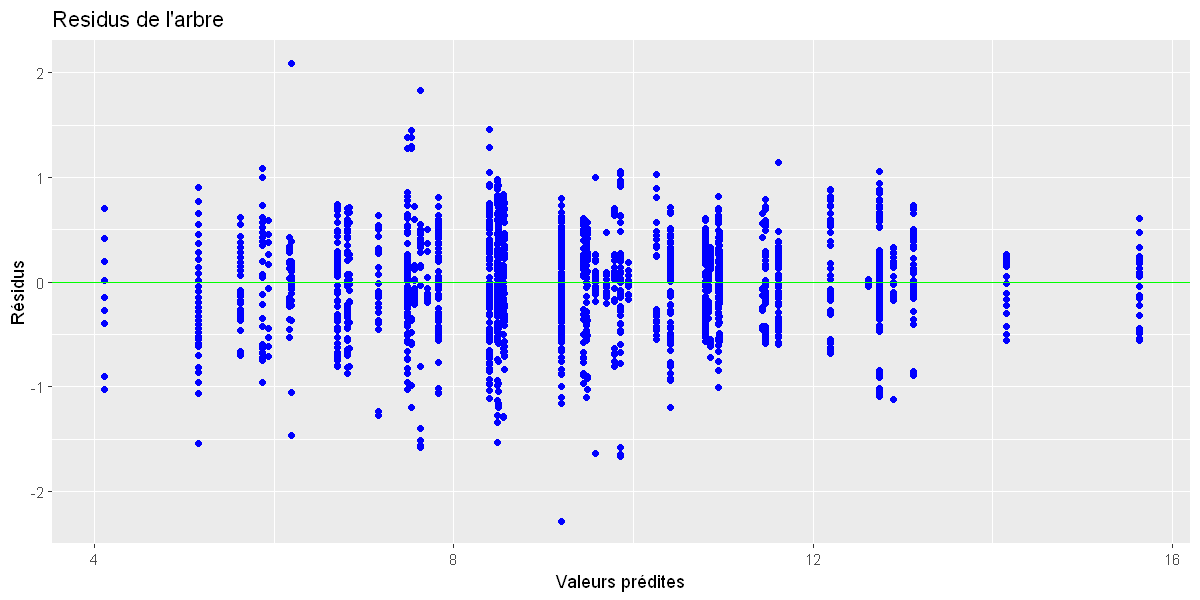

In [105]:
options(repr.plot.width = 10, repr.plot.height = 5)

fit.tree=predict(tree.reg)
res.tree=fit.tree-data_appr[,"L_Value_CO2"]
gplot.res(fit.tree,res.tree,"Residus de l'arbre")

**Interprétation :**

Nous obtenons comme attendu des résidus discrets. En effet les arbres donnent une prédiciton constante pour toute entrée dans une région. Il y a donc un nombre fini de prédictions. Ici les résidus sont de variance relativement constante et sont plutôt centrés.

---

In [106]:
pred.treer = predict(tree.reg, data_test) # Prédiction CO2 avec échantillon test + modèle ancova avec intéraction ordre 2

mse_tree = mean(res.tree^2)# Erreur quadratique moyenne 
r2_2 = cor(data_test$L_Value_CO2, pred.treer)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec arbre : ", mse_tree)
paste0("Coefficient R2 : ", r2_2)

[1] "Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec arbre : 0.203125273190291"

[1] "Coefficient R2 : 0.956439396638331"

**Interprétation :**

Le résultat est moins bon que précédement. 

---

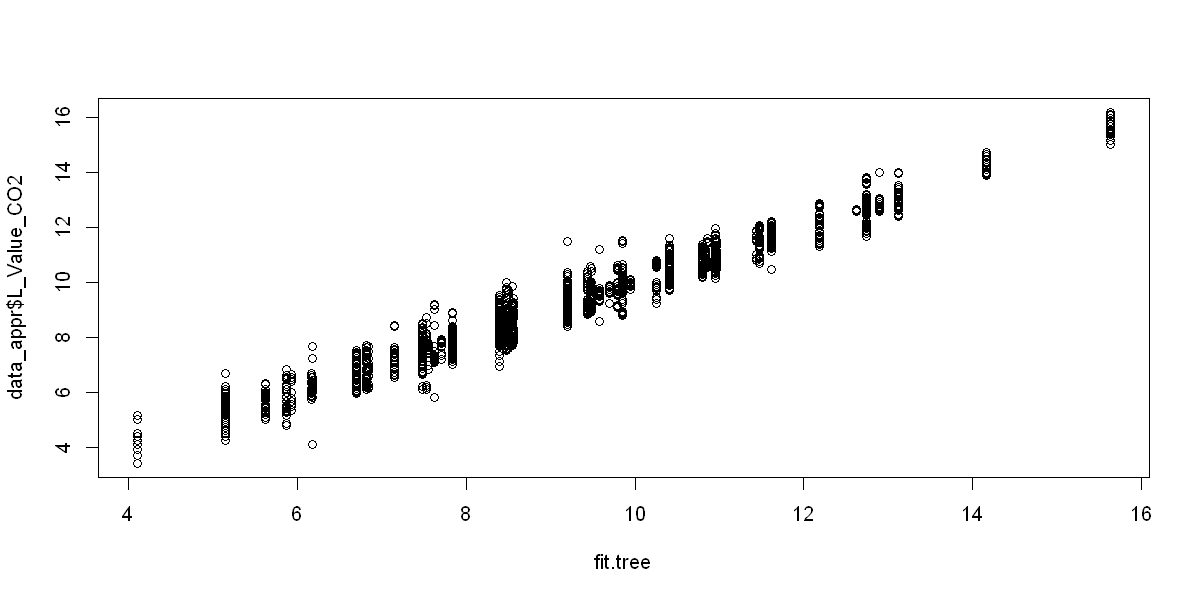

In [107]:
plot(fit.tree,data_appr$L_Value_CO2)

**Interprétation :**

On voit que le coefficent directeur de cette droite est proche de 1, mais le résultat ne semble pas si satisfaisant. Il semble y avoir pas mal d'erreurs de prédiction que l'on remarque par des outliers qui sont plus éloignés de la droite.

---

### Prévision de l'échantillon test

##### Erreur de regression 

In [108]:
e_reg_treer = sum((pred.treer-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de regression arbre : ', e_reg_treer )

[1] "Erreur de regression arbre :  0.249802287898421"

##### Erreur de classification

In [156]:
confusionMatrix(as.factor(pred.treer>CO2_moy),as.factor(data_test[,"L_Value_CO2"]>CO2_moy))$table

          Reference
Prediction FALSE TRUE
     FALSE   265   22
     TRUE     21  266

**Interprétation :**

Jusqu'à maintenant, cette méthode est celle nous donnant l'erreur de régression ainsi que le nombre de faux positifs et négatifs le plus élevé. Elle est donc peu performante par rapport aux méthodes précédentes.

---

## Forêt aléatoire

On va voir s’il est possible d’améliorer le modèle précédent en faisant une méthode de Random Forest. Le but étant de créer pleins d’arbres à partir d’échantillons créés par bootstrap du jeu de données d’apprentissage. Cela va nous permettre d’avoir une meilleure estimation des paramètres.

Pour les forêts aléatoire, il y a différents paramètres à prendre en compte : 
- Le nombre d'arbre de décision. Un nombre plus élevé d'arbres améliore la performance du modèle, mais cela augmente  le temps d'entraînement. Nous choisirons n_tree = 1000 afin d'avoir un compris entre ces deux critères. 
- La profondeur maximale de chaque arbre de décision. Une profondeur plus élevée peut conduire à un sur-apprentissage, tandis qu'une profondeur plus faible peut entraîner un sous-apprentissage. Nous le fixerons ici à 10. 
- Le nombre minimum d'échantillons nécessaire pour diviser un noeud. Une valeur plus élevée peut permettre d'éviter le sur-apprentissage. 
- Le nombre minimum d'échantillons requis pour former une feuille. 
- Nombre maximum de variables à prendre en compte pour chaque division de l'arbre 'mtry'
- Le critère de fonctionnement 'criterion'. Il spécifie la fonction utilisée pour mesurer la qualité de la fraction d'un noeud. 

In [110]:
library(randomForest)
library(ggRandomForests)

Warning message:
"le package 'randomForest' a été compilé avec la version R 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


L'objet suivant est masqué depuis 'package:ggplot2':

    margin


Warning message:
"le package 'ggRandomForests' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : randomForestSRC

Warning message:
"le package 'randomForestSRC' a été compilé avec la version R 4.3.3"

 randomForestSRC 3.2.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attachement du package : 'randomForestSRC'


Les objets suivants sont masqués depuis 'package:e1071':

    impute, tune




### Choix de mtry par validation croisée

In [111]:
# Charger les bibliothèques nécessaires
library(caret)
library(ranger)

# Paramètres à tester
grid <- expand.grid(
  mtry = c(12,14,16),
  splitrule = c("gini", "extratrees"), 
  min.node.size = c(1,2, 4)
)

train_control <- trainControl(method = "cv", number = 5)

# Validation croisée
set.seed(123)
results <- train(
  L_Value_CO2 ~ .,        
  data = data_appr,      
  method = "ranger",     
  trControl = train_control, 
  tuneGrid = grid,        
  importance = 'impurity', # Importance des variables
  num.trees = 1000,
  max.depth=10
)

best_params <- results$bestTune
print(best_params)

Warning message:
"le package 'ranger' a été compilé avec la version R 4.3.3"

Attachement du package : 'ranger'


L'objet suivant est masqué depuis 'package:randomForest':

    importance


Warning message:
"model fit failed for Fold1: mtry=10, splitrule=gini, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold1: mtry=12, splitrule=gini, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold1: mtry=14, splitrule=gini, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold1: mtry=10, splitrule=gini, min.node.size=2 Error in ranger::ranger(dependent.va

Warning message:
"model fit failed for Fold4: mtry=14, splitrule=gini, min.node.size=4 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold5: mtry=10, splitrule=gini, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold5: mtry=12, splitrule=gini, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold5: mtry=14, splitrule=gini, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  Error: Gini splitrule applicable to classification data only.
"
Warning message:
"model fit failed for Fold5: mtry=10, splitrule=gini, min.node.size

   mtry  splitrule min.node.size
17   14 extratrees             2


In [116]:
fa.reg=randomForest(L_Value_CO2 ~., data=data_appr,xtest=data_test[,-c(9)],ytest=data_test[,"L_Value_CO2"],
   ntree=1000,do.trace=50,importance=TRUE,mtry = 6,critère = 'gini',min_samples_split=2, min_samples_leaf=1) 

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02599     0.46 |  0.01752     0.31 |
 100 |  0.02089     0.37 |  0.01697     0.30 |
 150 |  0.01953     0.34 |  0.01643     0.29 |
 200 |  0.01909     0.34 |  0.01624     0.28 |
 250 |  0.01895     0.33 |  0.01611     0.28 |
 300 |  0.01846     0.33 |  0.01586     0.28 |
 350 |  0.01832     0.32 |  0.01561     0.27 |
 400 |  0.01814     0.32 |  0.01555     0.27 |
 450 |  0.01786     0.31 |  0.01544     0.27 |
 500 |  0.01787     0.32 |   0.0153     0.27 |
 550 |  0.01781     0.31 |  0.01537     0.27 |
 600 |  0.01784     0.31 |  0.01539     0.27 |
 650 |  0.01786     0.31 |  0.01533     0.27 |
 700 |   0.0178     0.31 |  0.01524     0.27 |
 750 |  0.01757     0.31 |  0.01503     0.26 |
 800 |  0.01754     0.31 |  0.01496     0.26 |
 850 |  0.01754     0.31 |  0.01503     0.26 |
 900 |  0.01744     0.31 |  0.01508     0.26 |
 950 |  0.01744     0.31 |  0.01513     0.26 |
1000 |  0.017

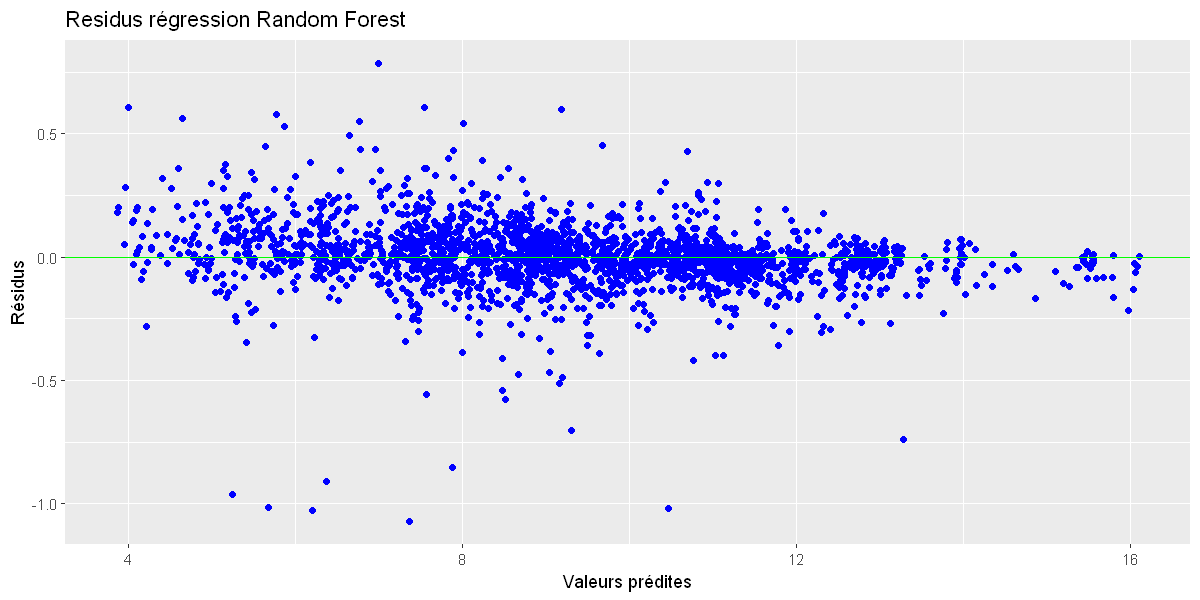

In [117]:
fit.far=fa.reg$predicted
res.far=fit.far-data_appr[,"L_Value_CO2"]
gplot.res(fit.far,res.far,titre="Residus régression Random Forest")

**Interprétation :**

Les résidus sont centrés autour de 0. La variance des valeurs faibles est plus importante que pour les valeurs plus hautes.

---

In [118]:
CO2_pred_fa = fa.reg$test$predict

mse_fa = mean(res.far^2)# Erreur quadratique moyenne 
r2_boost = cor(data_test$L_Value_CO2, CO2_pred_fa)^2

paste0("Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec foret aléatoire : ", mse_fa)
paste0("Coefficient R2 : ", r2_boost)

[1] "Erreur quadratique moyenne entre le CO2 réel et le CO2 prédit par ML avec foret aléatoire : 0.0173503553500745"

[1] "Coefficient R2 : 0.997656530062677"

**Interprétation:**

Les résidus sont mieux centrés et de variance est plus importante sur les valeurs inférieures à 10.
On remarque qu'on a minimisé notre erreur quadratique moyenne et optimisé R2.

---

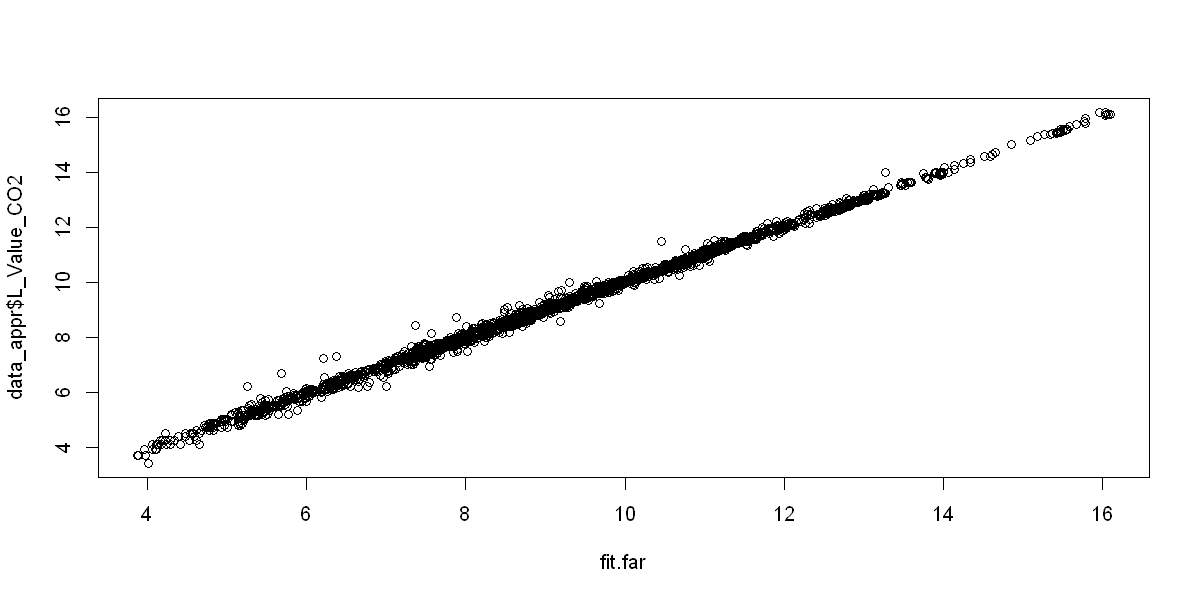

In [119]:
plot(fit.far,data_appr$L_Value_CO2)

**Interprétation :**

La droite semble être plutot proche d'une droite de la forme $x=y$. Cependant, un certains nombre de points sortent de cette droite, traduisant la présence d'erreurs.

---

### Importance des variables 

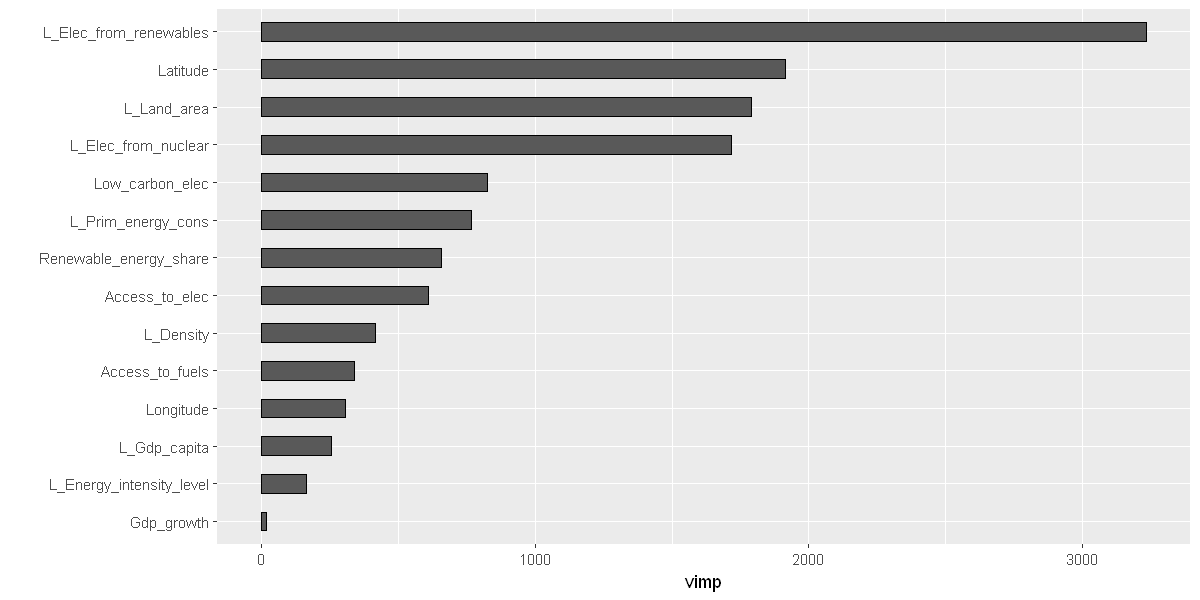

In [120]:
plot(gg_vimp(fa.reg))

**Interprétation :**

L_Elec_from_renawables, L_Elec_from_nuclear, L_Land_area et Latitude sont les variables participant le plus à l'interprétation. Cela est cohérant avec les résultats obtenue par les arbres et ceux de l'ACP. 

---

### Prévison de l'échantillon test 

##### Erreur de régression 

In [121]:
pred.far=fa.reg$test$predicted
# Erreur quadratique moyenne de prévision
e_reg_far=sum((pred.far-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de regression forêt aléatoire: ', e_reg_far )

[1] "Erreur de regression forêt aléatoire:  0.0150444011302087"

##### Erreur de classificaiton 

In [157]:
table(pred.far>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   283    4
  TRUE      3  284

**Interprétation :**

Le résultat de cette procédure de forêt aléatoire est bon. L'erreur de regression est faible. Nous notons que les résultats sont significativement meilleurs que la procédure d'arbre optimal. 

---

## Boosting

On regarde s'il est possible d'avoir une meilleure prédiction de nos données et un temps de calcul moins long. Cette méthode ajuste successivement une série de modèles faibles, en mettant l'accent sur les erreurs des modèles précédents. Chaque nouveau modèle corrige les erreurs des modèles précédents.

La méthode boosting nécéssite le choix de plusieurs paramètres : 
- Le taux d'apprentissage, il contrôle la contribution de chaque arbre à la mise à jour du modèle.
- Le nombre d'arbres pris en compte. Une valeur plus élevée de n_estimators peut améliorer les performances du modèle, mais peut également entraîner un temps d'entraînement plus long et un risque de surapprentissage. 
- La profondeur maximale des arbres, cela contrôle la complexité des arbres. 
- La distribution pour la sortie du modèle que nous choisirons gaussienne car elle est adaptée pour la régression
- cv.folds spécifie le nombre de folds à utiliser dans la validation croisée pour évaluer les performances du modèle. On le choisit à 10. 
- Le nombre d'observation requis dans un noeud.

Nous ferons une validation croisée pour choisir ces paramètres. 

In [123]:
library(gbm)

Warning message:
"le package 'gbm' a été compilé avec la version R 4.3.3"
Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



### Recherche des meilleurs paramètres

Nous ferons la validation croisée avec 200 arbres (si nous choisissons plus d'arbres, le processus est trop long). 

In [124]:
library(gbm)
library(caret)

# Hyperparamètres à tester
param_grid <- expand.grid(
  interaction.depth = c(10,12,14),  
  shrinkage = c(0.05,0.07,0.1),  # Valeurs du taux d'apprentissage
  n.minobsinnode = c(2,5,7),     # Valeurs du nombre minimum d'observations par nœud
  n.trees = 1000                 # Valeur du nombre d'arbres
)

# Contrôle de la validation croisée
train_control <- trainControl(
  method = "cv",   # Utiliser la validation croisée
  number = 5       # Nombre de folds
)

model <- train(
  L_Value_CO2 ~ .,
  data = data_appr,
  method = "gbm",
  trControl = train_control,
  tuneGrid = param_grid,
  verbose = FALSE
)

In [106]:
print(model$bestTune)

  n.trees interaction.depth shrinkage n.minobsinnode
7    1000                12      0.05              2


,var,rel.inf
,<chr>,<dbl>
L_Elec_from_renewables,L_Elec_from_renewables,33.4183701
L_Elec_from_nuclear,L_Elec_from_nuclear,15.9216468
Latitude,Latitude,13.7074589
Low_carbon_elec,Low_carbon_elec,10.1723297
L_Land_area,L_Land_area,9.4987426
Renewable_energy_share,Renewable_energy_share,4.9114128
L_Prim_energy_cons,L_Prim_energy_cons,3.6826092
L_Density,L_Density,2.4595507
L_Gdp_capita,L_Gdp_capita,2.1366707


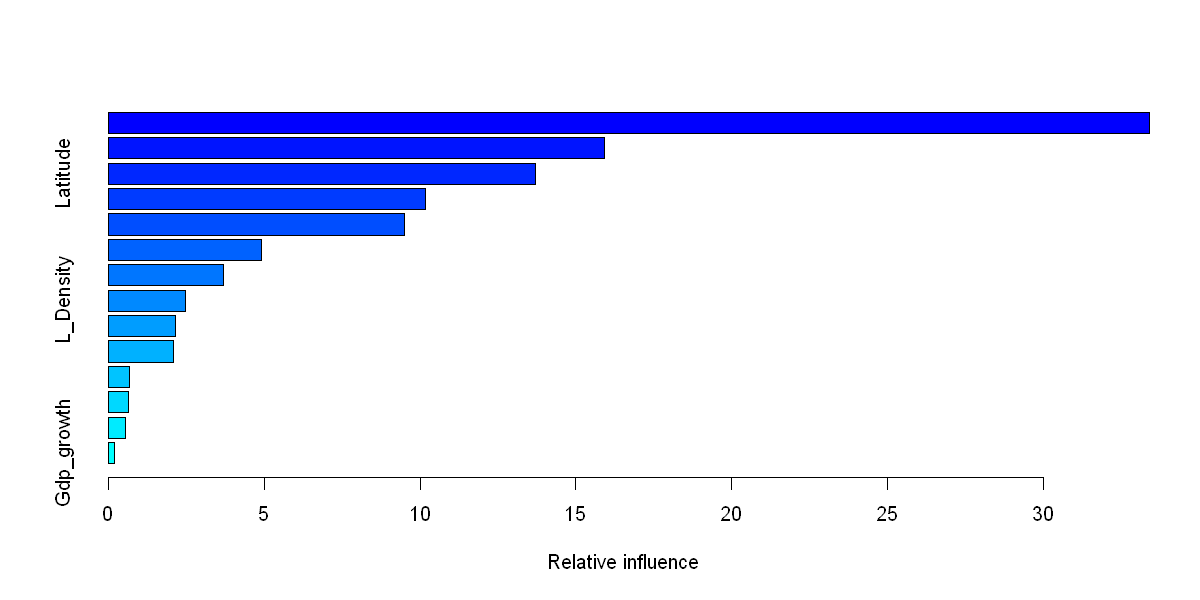

In [126]:
boost.reg = gbm(L_Value_CO2 ~ ., data = data_appr, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10, shrinkage = model$bestTune$shrinkage, interaction.depth = model$bestTune$interaction.depth,
                n.minobsinnode = model$bestTune$n.minobsinnode,verbose = FALSE)
summary(boost.reg)

**Interprétation :**

Une fois de plus, les 3 mêmes variables apparaissent parmi celles ayant le plus d'importance.

---

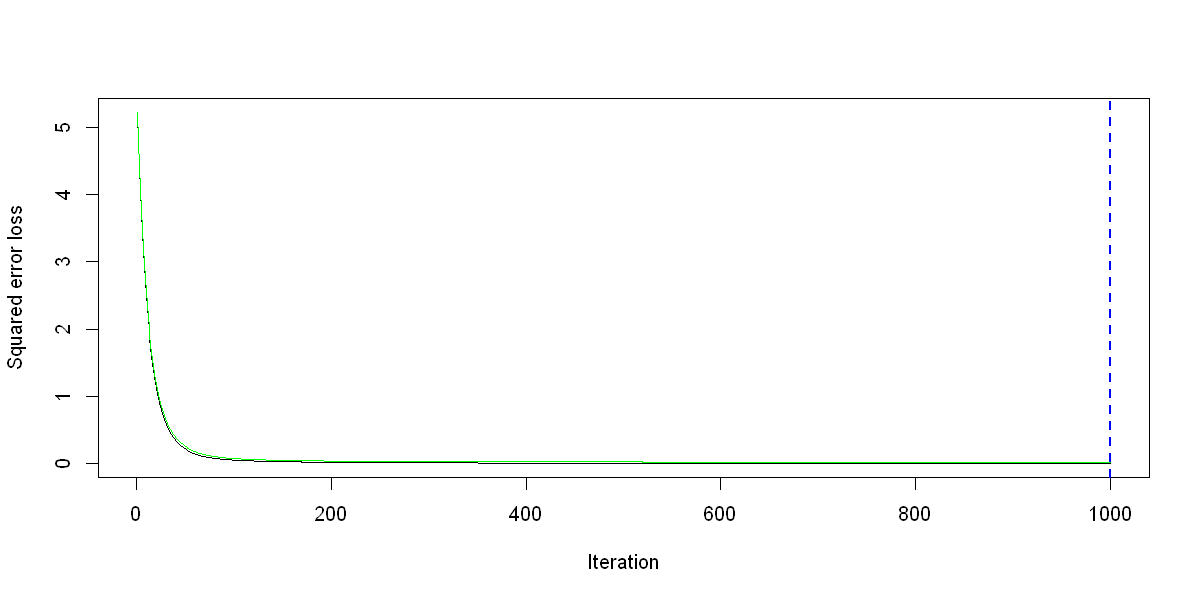

In [127]:
options(repr.plot.width = 10, repr.plot.height = 5)
best.iter=gbm.perf(boost.reg,method="cv")

**Interpretation :**

On voit qu'à partir de 200 arbres l'erreur ne baisse que très peu. Nous garderons donc 1000 arbres pour avoir une bonne prédiction mais éviter le temps de calcul trop long si on gardait plus d'arbres.

---

### Erreurs 

Using 1000 trees...




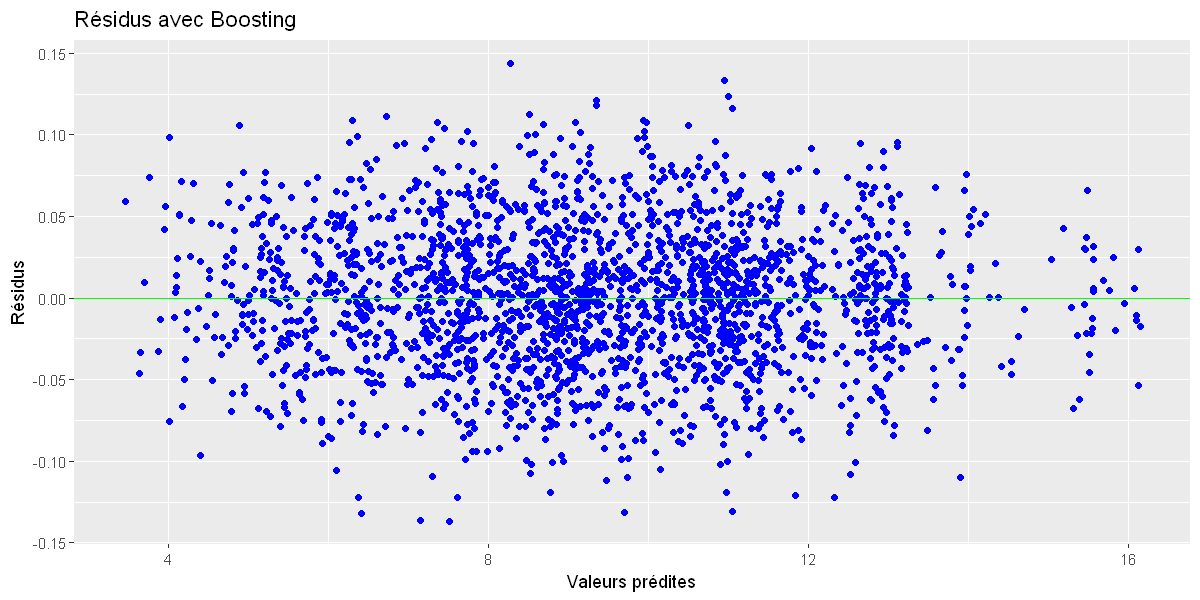

In [128]:
fit.boost=predict(boost.reg,data=data_appr)
res.boost=fit.boost-data_appr[,"L_Value_CO2"]
gplot.res(fit.boost,res.boost,titre="Résidus avec Boosting")

**Interprétation :**

Les résidus sont centrés et de variance plutôt symétrique. 

---

In [129]:
CO2_pred_boost = predict(boost.reg, data_test)

mse_boost = mean(res.boost^2)# Erreur quadratique moyenne 
r2_boost= cor(data_test$L_Value_CO2, CO2_pred_boost)^2

paste0("Erreur quadratique moyenne boosting : ", mse_boost)
paste0("Coefficient R2 : ", r2_boost)

Using 1000 trees...




[1] "Erreur quadratique moyenne boosting : 0.00185668439044452"

[1] "Coefficient R2 : 0.997229853303648"

Les résultats sont très bon, l'erreur est faible et l'on explique plus de 97% de ka variance de la variable à prédire. 

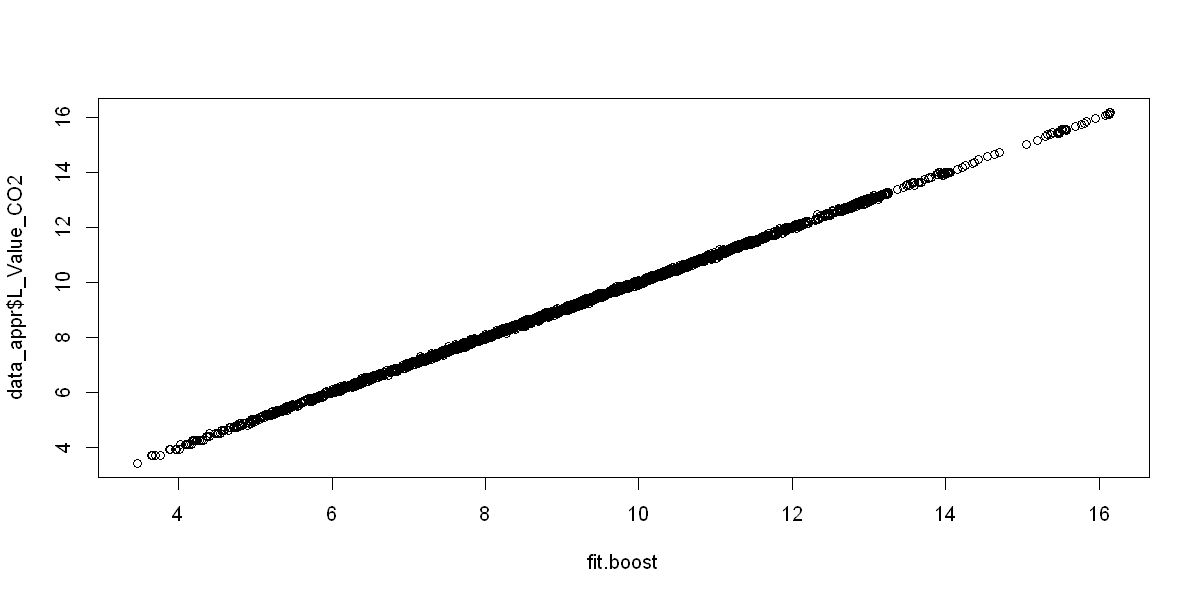

In [130]:
plot(fit.boost,data_appr$L_Value_CO2)

**Interprétation :**

Bon coefficient directeur, il semble y avoir peut d'outliers (erreurs de prédictions).

---

### Prévision de l'échantillon test

##### Erreur de régression 

In [131]:
pred.boostr=predict(boost.reg,newdata=data_test,n.trees=best.iter)
e_reg_boostr=sum((pred.boostr-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de regression boosting: ', e_reg_boostr)

[1] "Erreur de regression boosting:  0.0160998246304969"

##### Erreur de classification 

In [158]:
table(pred.boostr>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   282    3
  TRUE      4  285

**Interprétation :**

Les résultats sont également très bon avec cette méthode . L'erreur de régression est légèrement au dessus des résultats de Forêt Aléatoire. La classification est similaire. 

---

## Réseaux de neurones

Dans la régression avec réseaux de neurones il faut choisir les paramètres suivant : 
- Nombre de couches cachées, cela détermine la profondeur du réseau.
- Nombre de neurones par couche
- Fonction d'activation, nous choisirons la fonction classique pour la multi-classification : la softmax. 

Choisissons les deux premiers paramètres par validation croisée.

### Choix des paramètres

In [133]:
library(MASS)
library(nnet)
library(e1071)

In [134]:
tuning_result = tune.nnet(L_Value_CO2~.,data=data_appr,size=c(2,3,4),decay=c(2,3,4),maxit=200,linout=TRUE)
#plot(tune.nnet(L_Value_CO2~.,data=data_appr,size=4:5,decay=1:10))

In [135]:
best_size = tuning_result$best.parameter$size
best_decay=tuning_result$best.parameter$decay

paste('Les meilleurs paramètres sont: size = ', best_size, '  et decay = ', best_decay)

[1] "Les meilleurs paramètres sont: size =  3   et decay =  2"

# weights:  49
initial  value 261689.968293 
iter  10 value 11834.843852
iter  20 value 11226.947348
iter  30 value 11147.710803
iter  40 value 10982.311146
iter  50 value 9650.239339
iter  60 value 7009.141558
iter  70 value 6207.730592
iter  80 value 5521.540551
iter  90 value 5181.605865
iter 100 value 4799.904462
iter 110 value 2454.636310
iter 120 value 1476.528197
iter 130 value 934.660462
iter 140 value 764.612763
iter 150 value 686.804262
iter 160 value 662.695571
iter 170 value 639.907617
iter 180 value 637.535874
iter 190 value 630.804932
iter 200 value 614.503185
final  value 614.503185 
stopped after 200 iterations


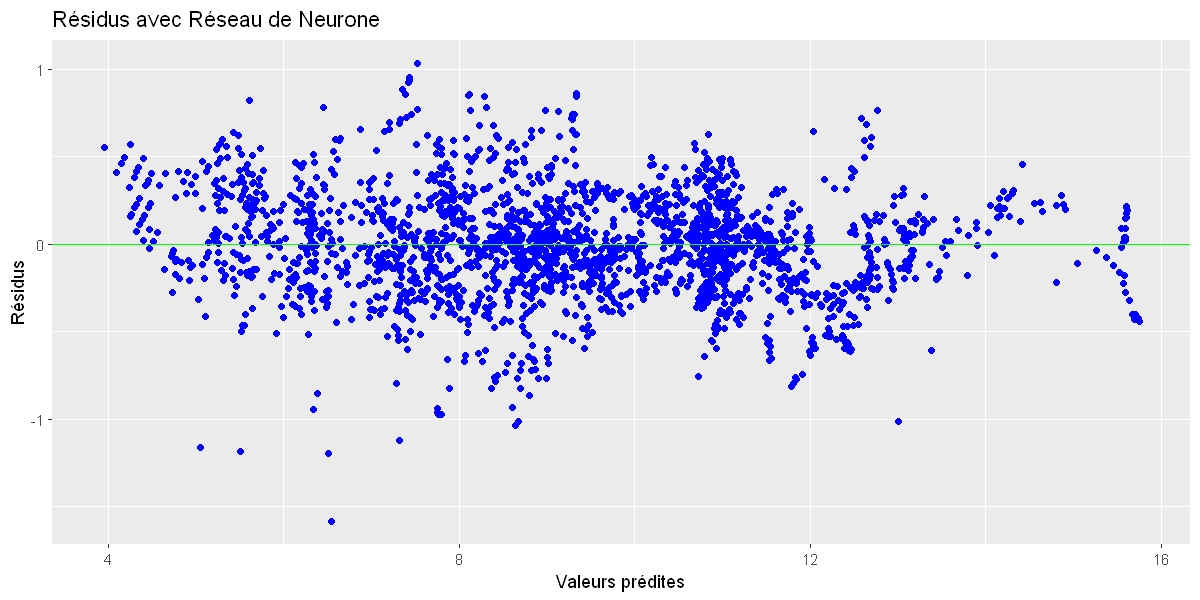

In [136]:
rn.reg=nnet(L_Value_CO2~.,data=data_appr,size=best_size,decay=best_decay,linout=TRUE,maxit=200)

fit.rn=predict(rn.reg,data=data_appr)
res.rn=fit.rn-data_appr[,"L_Value_CO2"]
gplot.res(fit.rn,res.rn,titre="Résidus avec Réseau de Neurone")

**Interprétation :**

Il y une erreur importante au niveau des valeurs plus élevées. Elles sont prédites beaucoup trop faibles. Les résidus ne sont pas centrés autour de 0 et on observe pas de forme linéaire.

---

In [137]:
pred.rn = predict(rn.reg, data_test)

mse_rn = mean(res.boost^2)# Erreur quadratique moyenne 
r2_rn= cor(data_test$L_Value_CO2, pred.rn)^2

paste0("Erreur quadratique moyenne boosting : ", mse_rn)
paste0("Coefficient R2 : ", r2_rn)

[1] "Erreur quadratique moyenne boosting : 0.00185668439044452"

[1] "Coefficient R2 : 0.985029209138966"

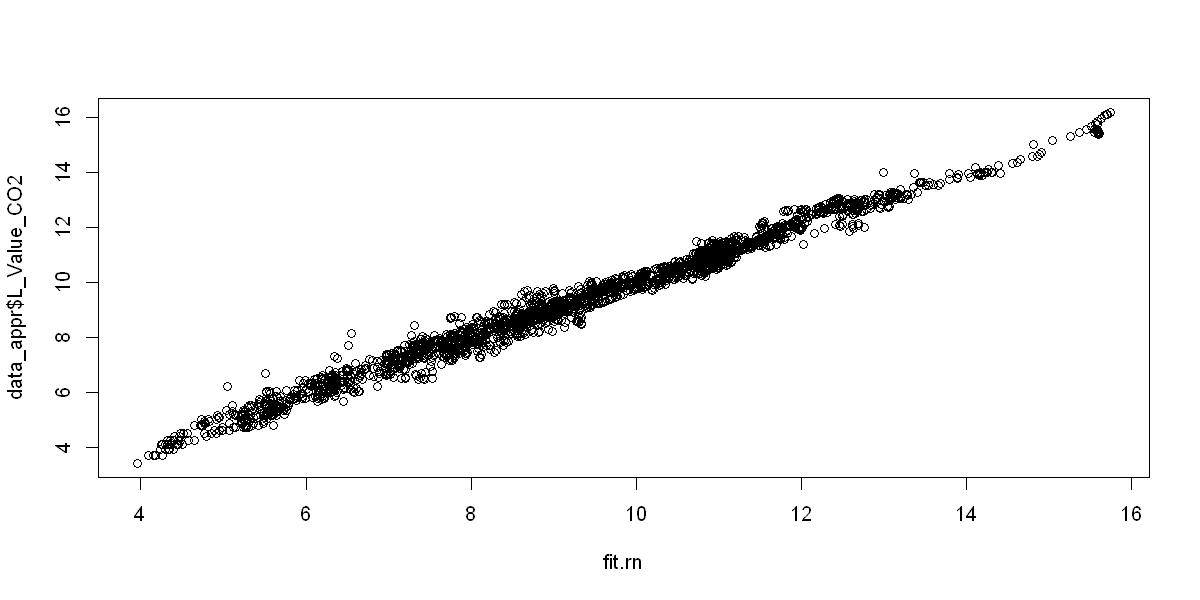

In [138]:
plot(fit.rn,data_appr$L_Value_CO2)

**Interprétation :**

Le résultat n'est pas très satisfaisant, on n'obtient pas une droite. 

---

### Prévision de l'échantillon test 

##### Erreur de régression

In [139]:
e_reg_rn = sum((pred.rn-data_test[,"L_Value_CO2"])^2)/nrow(data_test)
paste('Erreur de régression avec Réseau de Neuronne', e_reg_rn)

[1] "Erreur de régression avec Réseau de Neuronne 0.0872265586190948"

##### Erreur de classification

In [159]:
table(pred.rn>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)

       
        FALSE TRUE
  FALSE   279   10
  TRUE      7  278

Les résultats sont clairement moins bon que pour les 2 méthodes précédentes. 

## Comparaison finale de toutes les méthodes de régression

### Comparaison des erreurs d'apprentissage

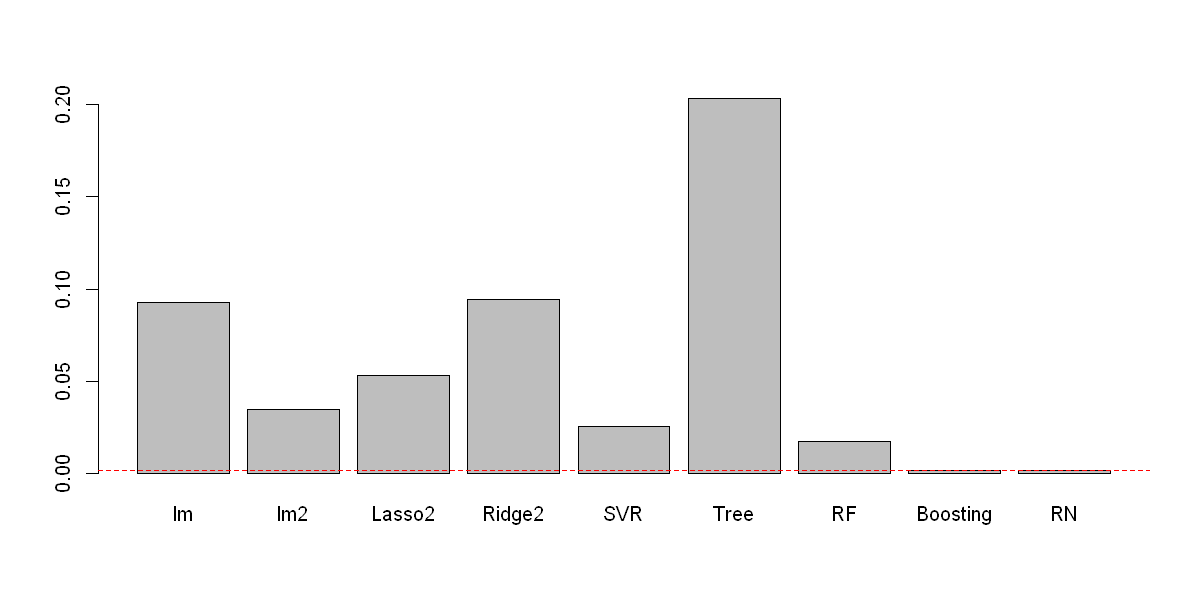

In [160]:
method_names <- c("lm","lm2","Lasso2","Ridge2","SVR", "Tree", "RF", "Boosting", "RN")

MSE_fin=c(mse_lm, mse_lm2, mse_lasso2, mse_ridge2,mse_svr,mse_tree,mse_fa, mse_boost, mse_rn)
barplot(MSE_fin,names.arg = method_names)

min_MSE = min(MSE_fin)
abline(h = min_MSE, col = "red", lty = 2) 

**Interprétation :**

Les méthodes boosting et réseau de neurones, suivies de Random Forest nous permettent d'avoir les erreurs d'apprentissages les plus faibles.

---

### Comparaison de l'erreur de regression 

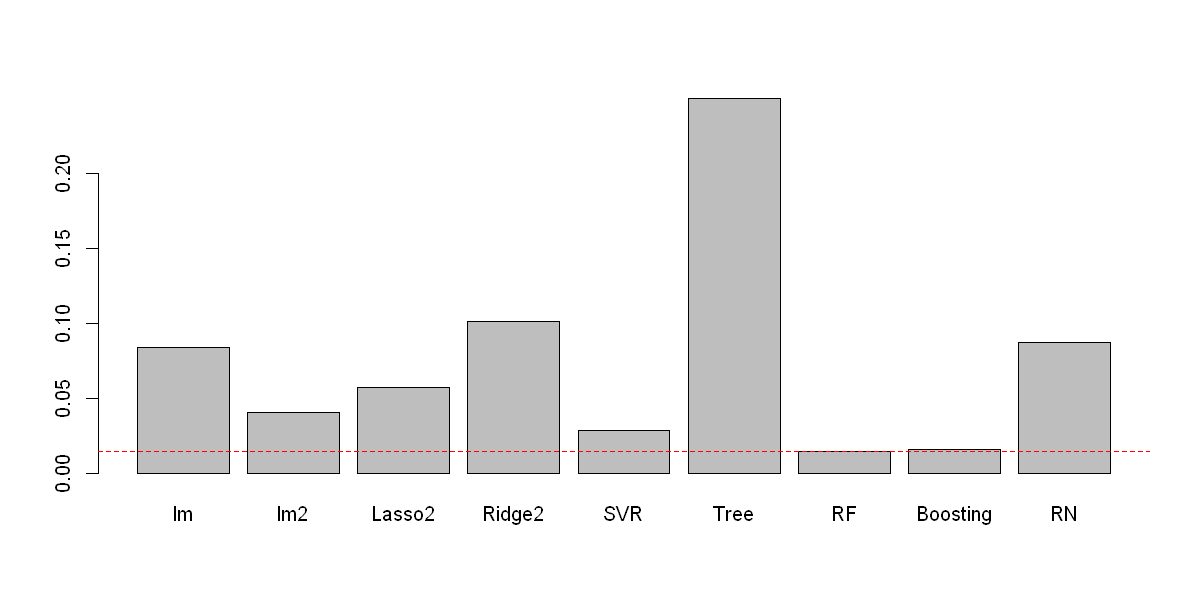

In [161]:
err_regr=c(e_reg_lm,e_reg_lm2,e_reg_lasso2,e_reg_ridge2,e_reg_smv,e_reg_treer, e_reg_far,e_reg_boostr, e_reg_rn)
barplot(err_regr,names.arg = method_names)
min_ereg = min(err_regr)
abline(h = min_ereg, col = "red", lty = 2) 

**Interprétation :**

Random forest a l'erreur de régression la plus faible, suivie de Boosting et de la SVR.

---

### Comparaison des résidus 

[1] "---------- Modèles linéaire ----------"

[1] "---------- Modèles non linéaire ----------"

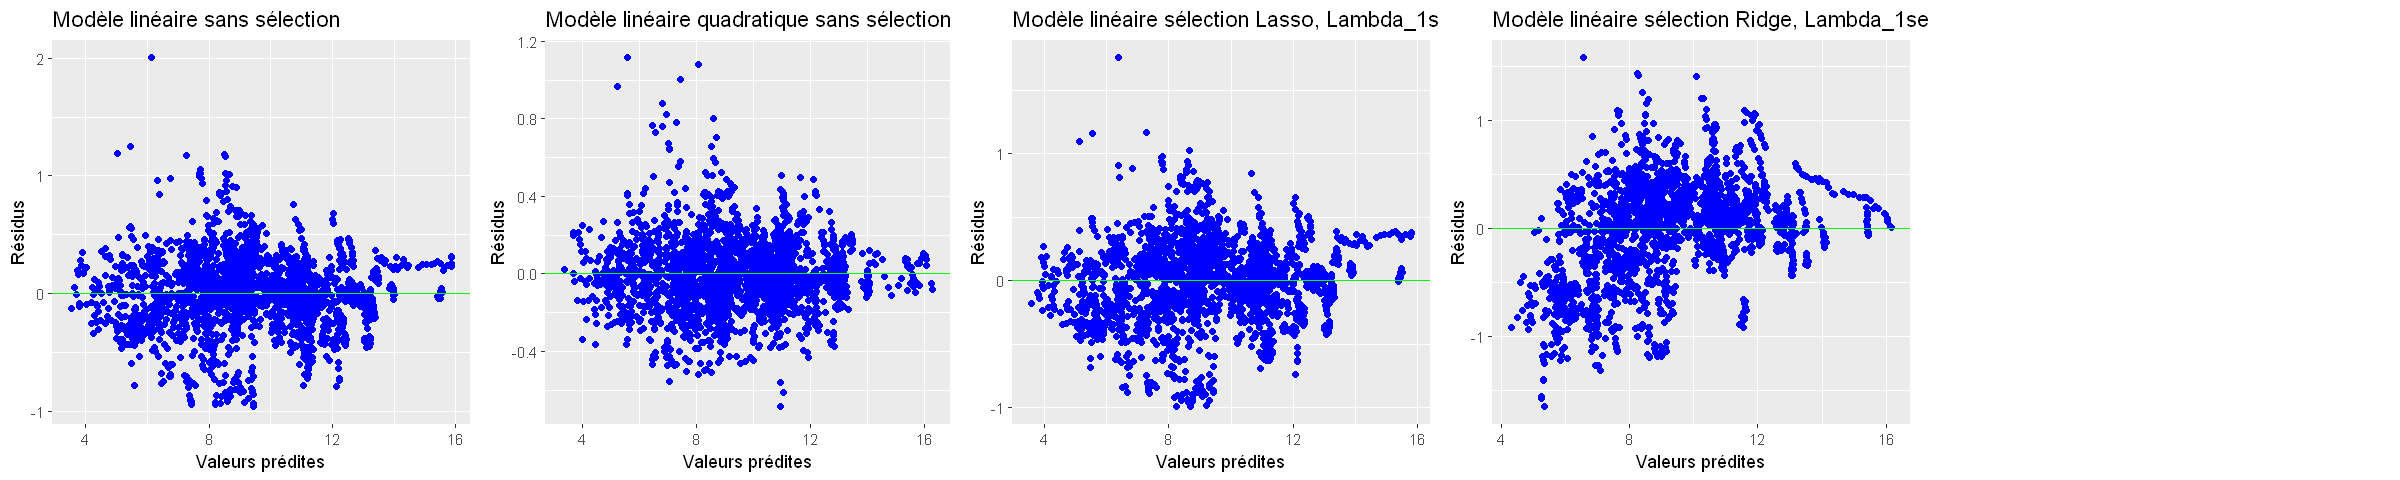

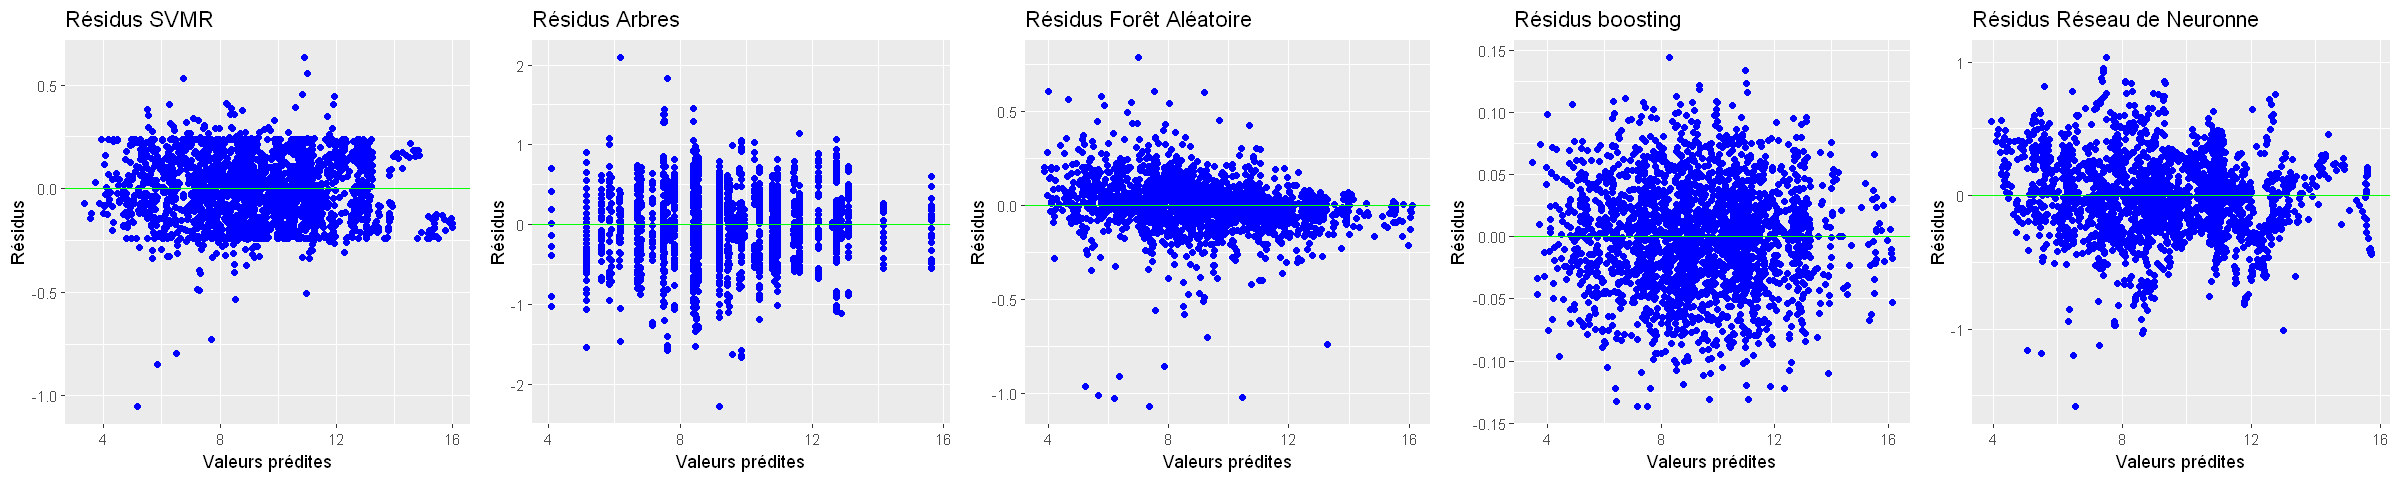

In [162]:
options(repr.plot.width =20 , repr.plot.height = 4)
par(mfrow = c(1, 3))

g5= gplot.res(fit.svmr,res.svmr,"Résidus SVMR")
g6= gplot.res(fit.tree,res.tree,"Résidus Arbres")
g7= gplot.res(fit.far, res.far, "Résidus Forêt Aléatoire")
g8= gplot.res(fit.boost, res.boost, "Résidus boosting")
g9= gplot.res(fit.rn, res.rn, "Résidus Réseau de Neuronne")
paste('---------- Modèles linéaire ----------')
grid.arrange(g1,g2,g3,g4,ncol=5)
paste('---------- Modèles non linéaire ----------')
grid.arrange(g5,g6,g7,g8,g9,ncol=5)

**Interprétation :**

Les résidus de bossting sont ceux qui ont la plus faible variance et qui sont centrés autour de 0.

---

## Conclusion

Il semblerait que le meilleur modèle soit celui de proposé par Boosting. Il permet de minimiser l'erreur de regression et d'apprentissage. Ces résidus sont les plus centrés et de variance minimale. 

### Table de contingence du meilleur modèle

In [163]:
print('---------- Boosting ----------')
conf_mat <- table(pred.far>CO2_moy,data_test[,"L_Value_CO2"]>CO2_moy)
print(conf_mat)

[1] "---------- Boosting ----------"
       
        FALSE TRUE
  FALSE   283    4
  TRUE      3  284


### Le niveau de précision

In [164]:
TP <- conf_mat[2,2]
FP <- conf_mat[2,1]

niveau <- TP/(TP+FP)
paste('Niveau de la prédiction : ' , niveau)

[1] "Niveau de la prédiction :  0.989547038327526"

Le niveau de prédiciton est très proche de 1. Ce résultat est très bon. 

### Interprétation et retour sur l’analyse des données

On a pu monter que les variables importantes de nos méthodes étaient celles qui participaient le plus aux dimensions 1 et 2 de l'ACP. Notament : L_Elec_from_renewables, L_Elec_from_nuclear, Latitude, Low_carbon_elec et L_Land_area sont les variables les plus influentes dans boosting et reviennent également dans les autres méthodes. 
Ce résultat est cohérent, ces variables sont celles qui influent le plus la valeur du CO2 et l'évolution du jeu de données en général. 

De plus l'analyse exploratoire montrait que la latitude d'un pays caractérisait sa production de CO2. Cela revient dans nos modèle qui considèrent cette variable importante. 

Ensuite, on a montré que la produciton de CO2 était très corrélée avec L_Elec from_nuclear et L_Elec_from_renewables qui apparaissent bien comme importante pour la prédiction. 

## 5. Complétion des valeurs manquantes

Afin de terminer l'étude, nous proposons d'implémenter des algorithmes de complétions des valeurs manquantes et d'appliquer les meilleurs algorithmes de régression définis précédemment sur le jeu de données complété. En effet, nous avons vu dans l'analyse exploratoire que le jeu de donnée contenait un nombre important de valeurs manquantes. Nous avons décidé de supprimer d'une part les variables contenant un nombre trop important de valeurs manquantes, et d'autre part de supprimer tous les individus ayant des valeurs manquantes. Nous cette section, nous allons compléter les individus ayant des valeurs manquantes mais nous ne compléterons pas les valeurs des trois variables contenant un nombre significatif de valeurs manquantes. En effet, celles-ci contiennent trop de valeurs manquantes et les algorithmes ne seront pas pertinents ou efficace.

Une fois le jeu de donnée complété, on appliquera les meilleurs algorithmes définis précédemment, soit :
- Le modèle linéaire avec intéraction quadratique sans sélection.
- Random Forest.

In [165]:
library(missForest)
library(VIM)
library(naniar)

Warning message:
"le package 'missForest' a été compilé avec la version R 4.3.3"
Warning message:
"le package 'VIM' a été compilé avec la version R 4.3.3"
Le chargement a nécessité le package : colorspace

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attachement du package : 'VIM'


L'objet suivant est masqué depuis 'package:missForest':

    nrmse


L'objet suivant est masqué depuis 'package:datasets':

    sleep


Warning message:
"le package 'naniar' a été compilé avec la version R 4.3.3"


### Préparation des données pour la completion

In [166]:
# Chargement des données :
path <- ""
data_NA = read.table(paste(path, "./data.csv", sep = ""), sep = ",", header = TRUE)

In [167]:
# Transformation des données (qualitatif/quantitatif)
data_NA$Entity = as.factor(data_NA$Entity) # ok : 176 niveaux : 176 pays : ok
data_NA$Year = as.factor(data_NA$Year) # ok : 21 niveaux : cohérent car de 2000 à 2020 : ok
data_NA$Density.n.P.Km2. = as.numeric(gsub(",","", data_NA$Density.n.P.Km2.)) # ok : c'est bien passé en quantitatif/num

In [168]:
# on enlève les colonnes où il y a trop de NA
data_NA = data_NA[,c(-5, -6, -15)]

In [169]:
# on renomme nos variables car les noms sont trop longs.
colnames(data_NA) <- c("Entity","Year","Access_to_elec","Access_to_fuels","Renewable_energy_share",
                    "Elec_from_fossils","Elec_from_nuclear","Elec_from_renewables","Low_carbon_elec",
                    "Prim_energy_cons","Energy_intensity_level","Value_CO2","Gdp_growth","Gdp_capita",
                    "Density","Land_area","Latitude","Longitude")


 Variables sorted by number of missings: 
               Variable        Count
              Value_CO2 0.1172924089
             Gdp_growth 0.0868731159
             Gdp_capita 0.0772814470
 Energy_intensity_level 0.0567278706
 Renewable_energy_share 0.0531652508
        Access_to_fuels 0.0463140586
      Elec_from_nuclear 0.0345300082
        Low_carbon_elec 0.0115100027
      Elec_from_fossils 0.0057550014
   Elec_from_renewables 0.0057550014
         Access_to_elec 0.0027404768
                Density 0.0002740477
              Land_area 0.0002740477
               Latitude 0.0002740477
              Longitude 0.0002740477
                 Entity 0.0000000000
                   Year 0.0000000000
       Prim_energy_cons 0.0000000000


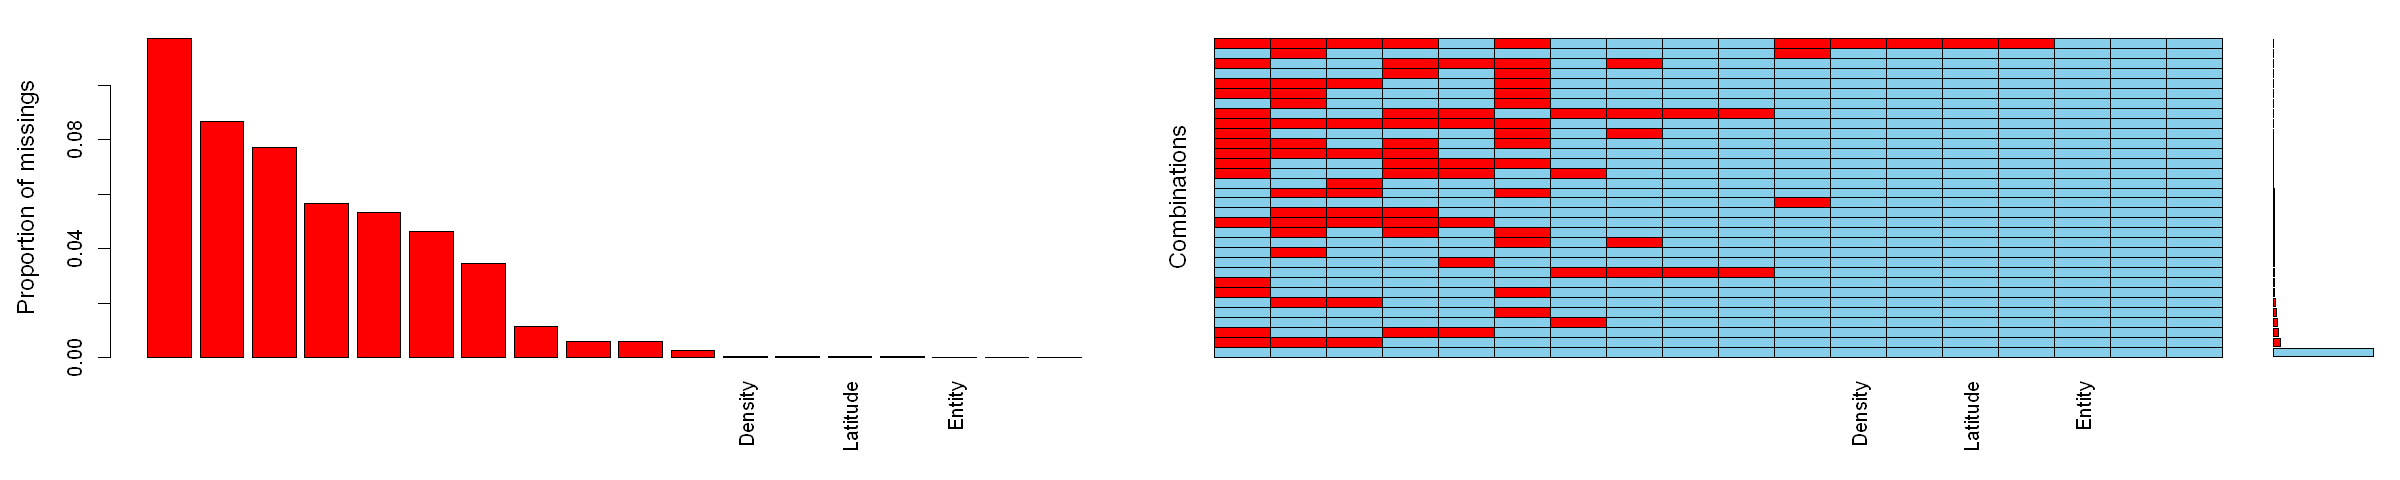

In [170]:
res<-summary(aggr(data_NA, sortVar=TRUE))$combinations

**Interprétation :**

Comme il ne nous manque pas de données qualitatives, nous les enlevons afin de pouvoir utiliser des methodes de complétion sur des variables quantitatives. Il nous manque principalement des valeurs de CO2 que nous cherchons à prédire et gdp_growth, gdp_capita. Nous remarquons que ce ne sont pas des variables qui ont été notées précédement comme importantes dans la prédiction. 

---

In [171]:
#Tableau des données quantitatives
data_NA_quanti=data_NA[,-c(1,2)]

**Interprétation :**

Nous allons enlever les lignes ou la variable à prédire (Value_CO2) est manquante, car compléter les valeurs manquantes de la variable à prédire n'est pas optimal.

---

In [172]:
indices_avec_na <- which(is.na(data_NA_quanti$Value_CO2))
data_NA_quanti <- data_NA_quanti[-indices_avec_na, ]

### Test des méthodes de complétion

#### Complétion LOCF

LOCF remplie les valeurs manquantes dans data_NA_quanti en utilisant la méthode "Last Observation Carried Forward" (LOCF).
na.rm = FALSE indique que la fonction doit également remplacer les valeurs NA par des valeurs non disponibles (NA).

Puis on applique à nouveau la méthode LOCF, qui est le résultat de la première étape.
fromLast = TRUE indique que la méthode LOCF doit être appliquée en partant de la dernière observation valide vers les observations manquantes.

Connaissant notre jeux de données, cette méthode semble pertinante. On suppose que la valeur de l'annéee suivante pour un même pays est 'proche' (certainement un peu plus élevée pour certaines variables) de la valeur d'avant. Le problème peut se poser lors de passage d'un pays à un autre. 

In [173]:
library(zoo) 

Warning message:
"le package 'zoo' a été compilé avec la version R 4.3.3"

Attachement du package : 'zoo'


Les objets suivants sont masqués depuis 'package:base':

    as.Date, as.Date.numeric




In [174]:
data.locf=na.locf(data_NA_quanti,na.rm=FALSE)
data.locf=na.locf(data.locf,na.rm=FALSE,fromLast=TRUE) # dans l'autre sens


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


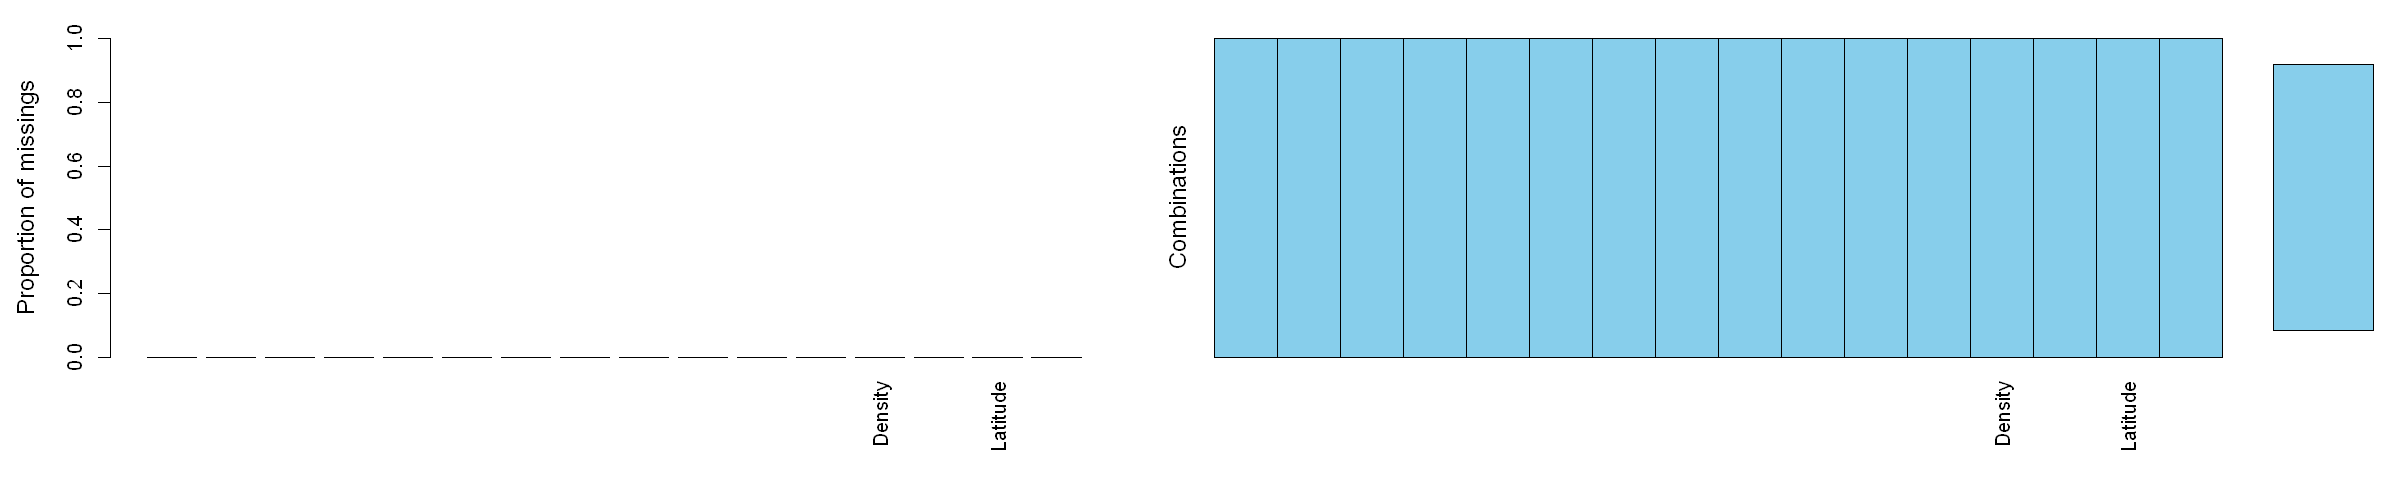

In [175]:
# juste pour vérifier qu'on a plus de valeurs manquantes 
res<-summary(aggr(data.locf, sortVar=TRUE))$combinations

**Interprétation :**

On a bien complété toutes les valeurs manquantes. Nous allons maintenant recentrer les données en appliquant les mêmes transformations que précédemment.

---

In [181]:
l = list()
Var_names = names(data.locf[,1:16])
    
    for (i in Var_names){
        # on n'affiche que l'histogramme des variables quantitatives
        if (is.numeric(data.locf[[i]])) {
            L_var <- paste("L_",i,sep="")
            if (all(data.locf[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
                data.locf[,L_var] <- log(data.locf[,i])                
            } else {
                data.locf[,L_var] <- log(data.locf[,i]+1)
            }
            data_copy <- data.locf[[L_var]] # on créé une copie des données à chaque itération
        } 
    }
data.locf_centre <- data.locf[,c(1,2,3,20,21,22,7,24,25,26,11,28,29,30,15,16)]
str(data.locf_centre)
paste("Nombre de valeurs manquante dans le jeu de données complété recentré : ", sum(is.na(data.locf_centre)))

Warning message in log(data.locf[, i] + 1):
"Production de NaN"
Warning message in log(data.locf[, i] + 1):
"Production de NaN"
Warning message in log(data.locf[, i] + 1):
"Production de NaN"


'data.frame':	3221 obs. of  16 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_fossils     : num  0.1484 0.0862 0.1222 0.27 0.2852 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  8.83 8.83 8.83 8.83 1.41 ...
 $ L_Gdp_capita            : num  5.19 5.19 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longit

[1] "Nombre de valeurs manquante dans le jeu de données complété recentré :  0"

#### Completion par la moyenne

Pour cette méthode de complétion, on calcule la moyenne de chaque colonne (sans les NA) et on complète les valeurs manquantes par cette valeur. 

Nous allons étudier cette méthode mais elle ne semble pas appropriée au jeux de données. En effet les valeurs de nos variables sont très différentes d'un pays à l'autre comme on a pu le montrer précédement. Remplir les valeurs manquantes par la moyenne de tous les pays ne semble donc pas optimal.


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


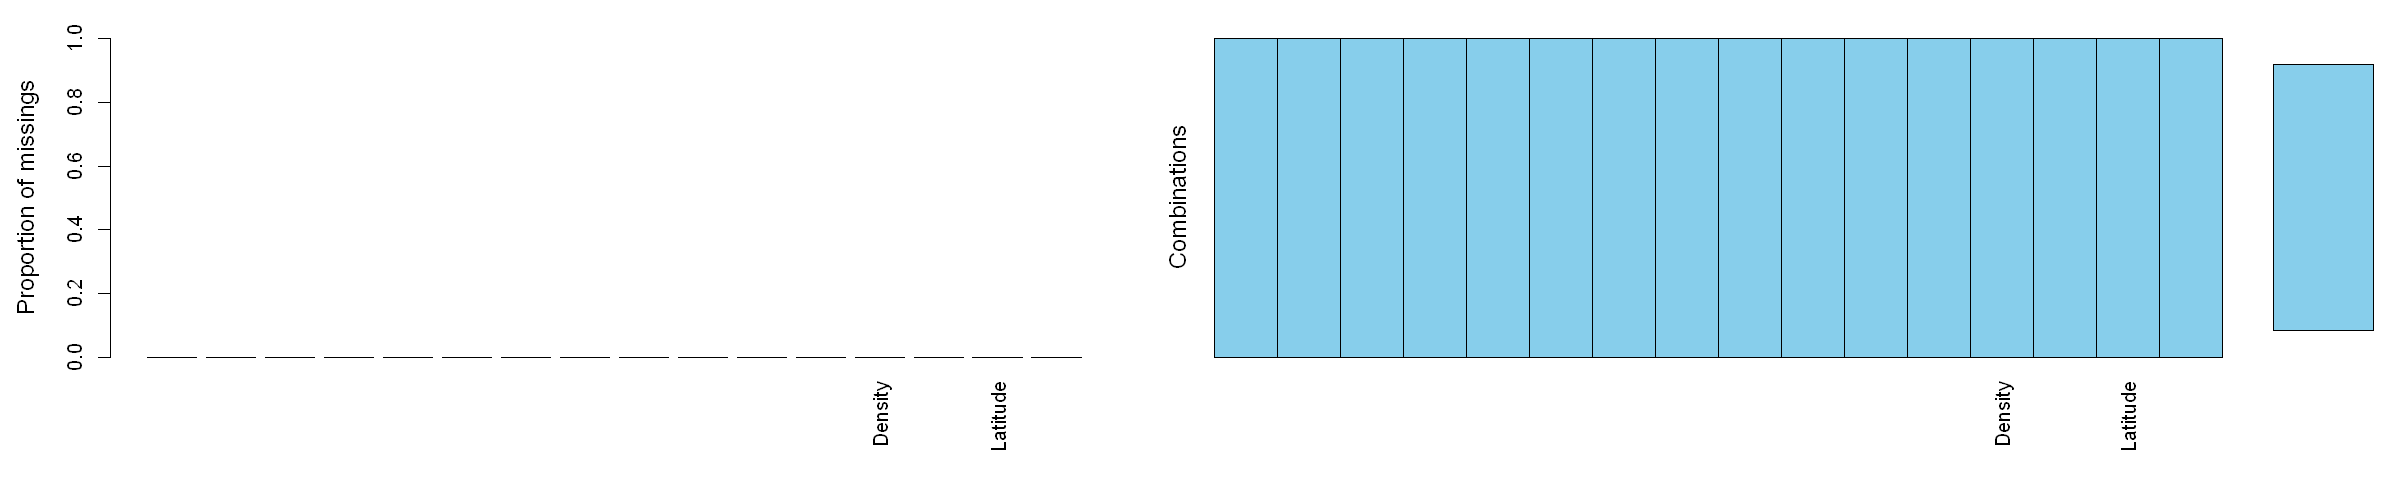

In [177]:
moy=apply(data_NA_quanti,2,mean,na.rm=TRUE) # le 2 sert a appliquer la formule sur les colonnes
data.moy=data_NA_quanti
ind.na=which(is.na(data.moy),arr.ind=TRUE)
data.moy[ind.na]=moy[ind.na[,2]]

res<-summary(aggr(data.moy, sortVar=TRUE))$combinations

In [180]:
l = list()
Var_names = names(data.moy[,1:16])
    
    for (i in Var_names){
        # on n'affiche que l'histogramme des variables quantitatives
        if (is.numeric(data.moy[[i]])) {
            L_var <- paste("L_",i,sep="")
            if (all(data.moy[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
                data.moy[,L_var] <- log(data.moy[,i])                
            } else {
                data.moy[,L_var] <- log(data.moy[,i]+1)
            }
            data_copy <- data.moy[[L_var]] # on créé une copie des données à chaque itération
        } 
    }
data.moy_centre <- data.moy[,c(1,2,3,20,21,22,7,24,25,26,11,28,29,30,15,16)]

paste("Nombre de valeurs manquante dans le jeu de données complété recentré : ", sum(is.na(data.moy_centre)))

Warning message in log(data.moy[, i] + 1):
"Production de NaN"
Warning message in log(data.moy[, i] + 1):
"Production de NaN"
Warning message in log(data.moy[, i] + 1):
"Production de NaN"


[1] "Nombre de valeurs manquante dans le jeu de données complété recentré :  0"

#### Complétion par k plus proches voisins (kNN) ####

On va remplacer les valeurs manquantes par la moyenne des k plus proches voisins. 

Nous prendrons 3 voisins afin de prendre en compte que les éléments d'un même pays. Comme dit précédement les valeurs d'un pays à un autre peuvent être très différentes donc prendre plus de voisins ne serait pas optimal.  

In [182]:
library(VIM)


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


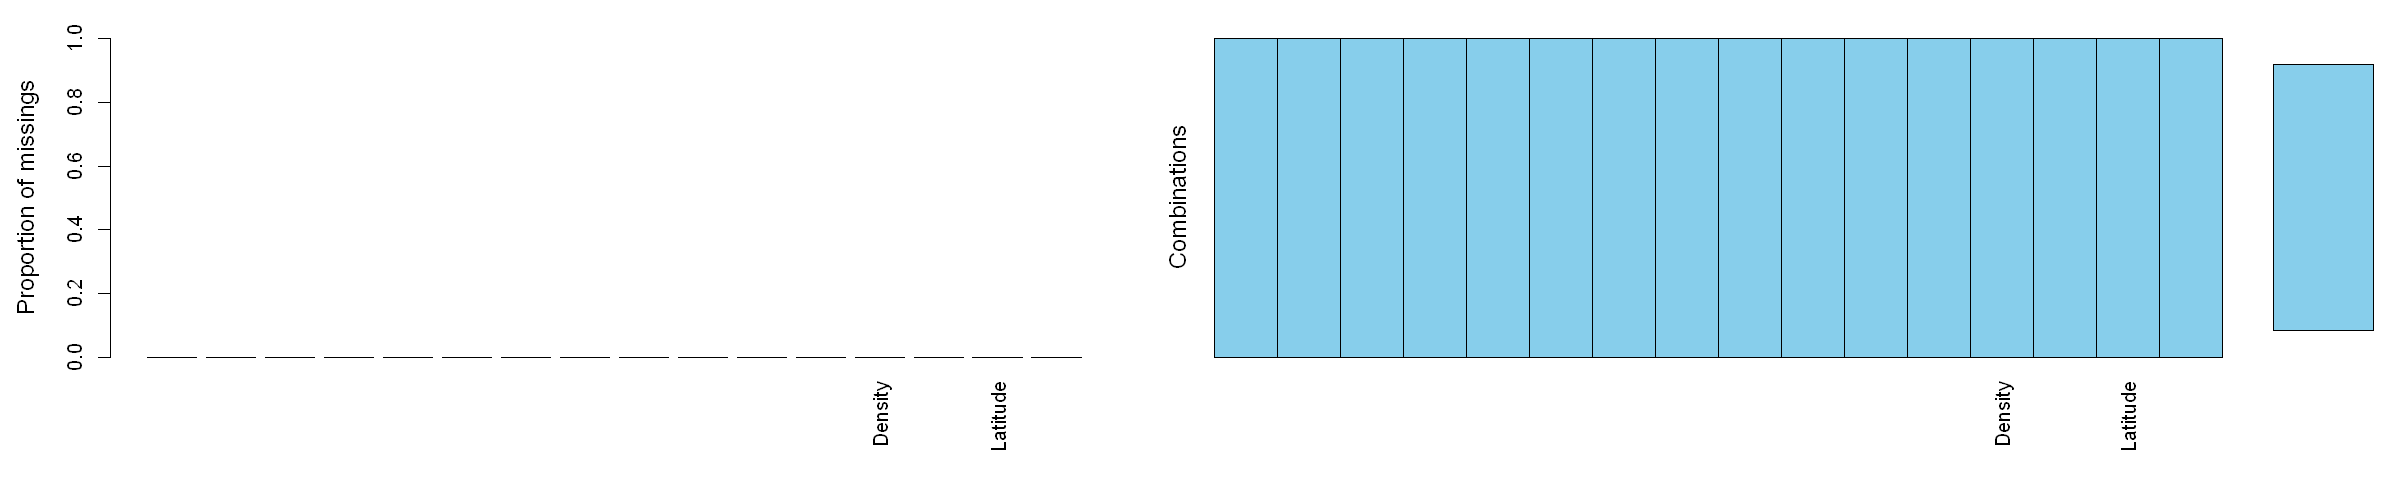

In [183]:
data.kNN=kNN(data_NA_quanti, k=3, imp_var=FALSE) # moyenne des 3 plus proches voisins
res<-summary(aggr(data.kNN, sortVar=TRUE))$combinations

In [186]:
l = list()
Var_names = names(data.kNN[,1:16])
    
    for (i in Var_names){
        # on n'affiche que l'histogramme des variables quantitatives
        if (is.numeric(data.kNN[[i]])) {
            L_var <- paste("L_",i,sep="")
            if (all(data.kNN[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
                data.kNN[,L_var] <- log(data.kNN[,i])                
            } else {
                data.kNN[,L_var] <- log(data.kNN[,i]+1)
            }
            data_copy <- data.kNN[[L_var]] # on créé une copie des données à chaque itération
        } 
    }

Warning message in log(data.kNN[, i] + 1):
"Production de NaN"
Warning message in log(data.kNN[, i] + 1):
"Production de NaN"
Warning message in log(data.kNN[, i] + 1):
"Production de NaN"


[1] "Nombre de valeurs manquante dans le jeu de données complété recentré :  1898"

In [187]:
data.kNN_centre <- data.kNN[,c(1,2,3,20,21,22,7,24,25,26,11,28,29,30,15,16)]
str(data.kNN_centre)
paste("Nombre de valeurs manquante dans le jeu de données complété recentré : ", sum(is.na(data.kNN_centre)))

'data.frame':	3221 obs. of  16 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_fossils     : num  0.1484 0.0862 0.1222 0.27 0.2852 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  8.83 5.36 5.36 8.83 1.41 ...
 $ L_Gdp_capita            : num  5.25 5.25 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longit

[1] "Nombre de valeurs manquante dans le jeu de données complété recentré :  0"

#### Complétion avec Missforest ####

La méthode miss forest créé des arbres aléatoires dans lesquels il remplace les valeurs manquantes par la moyenne. Il fait ensuite un apprentissage sur chaque arbre pour prédire les valeurs manquantes dans le jeux d'origine. Finalement on récupère la moyenne des données obtenues.

In [188]:
library(missForest)


 Variables sorted by number of missings: 
               Variable Count
         Access_to_elec     0
        Access_to_fuels     0
 Renewable_energy_share     0
      Elec_from_fossils     0
      Elec_from_nuclear     0
   Elec_from_renewables     0
        Low_carbon_elec     0
       Prim_energy_cons     0
 Energy_intensity_level     0
              Value_CO2     0
             Gdp_growth     0
             Gdp_capita     0
                Density     0
              Land_area     0
               Latitude     0
              Longitude     0


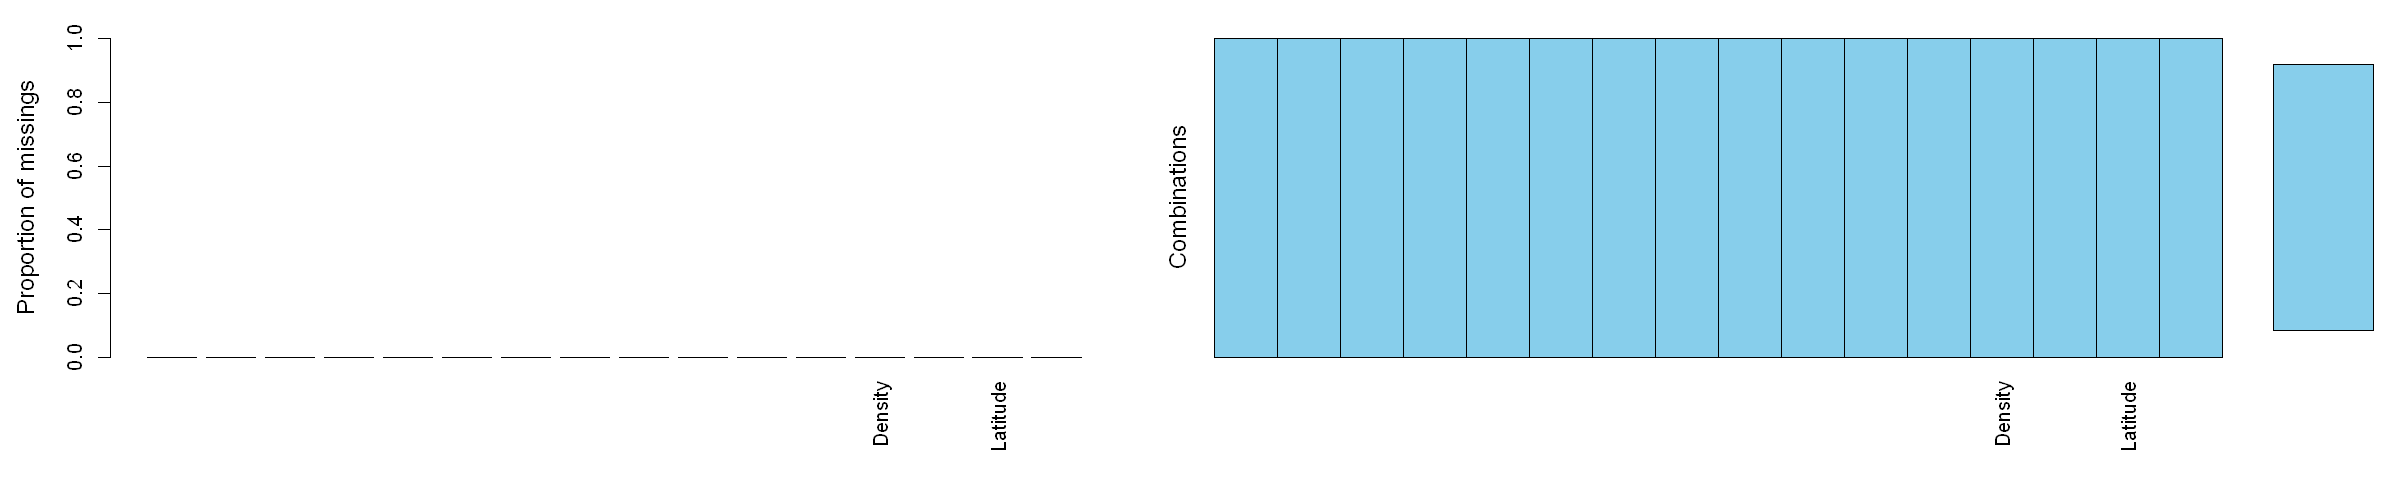

In [189]:
data.missforest=missForest(data_NA_quanti,maxiter=50) #ctrue montre l'erreur d'imputation à chaque itération
data.mf=data.missforest$ximp
res<-summary(aggr(data.mf, sortVar=TRUE))$combinations

In [190]:
l = list()
Var_names = names(data.mf[,1:16])
    
    for (i in Var_names){
        # on n'affiche que l'histogramme des variables quantitatives
        if (is.numeric(data.mf[[i]])) {
            L_var <- paste("L_",i,sep="")
            if (all(data.mf[[i]]>0)) { # je verifie juste qu'elles sont toutes positives
                data.mf[,L_var] <- log(data.mf[,i])                
            } else {
                data.mf[,L_var] <- log(data.mf[,i]+1)
            }
            data_copy <- data.mf[[L_var]] # on créé une copie des données à chaque itération
        } 
    }


Warning message in log(data.mf[, i] + 1):
"Production de NaN"
Warning message in log(data.mf[, i] + 1):
"Production de NaN"
Warning message in log(data.mf[, i] + 1):
"Production de NaN"


In [191]:
data.mf_centre <- data.mf[,c(1,2,3,20,21,22,7,24,25,26,11,28,29,30,15,16)]
str(data.mf_centre)
paste("Nombre de valeurs manquante dans le jeu de données complété recentré : ", sum(is.na(data.mf_centre)))

'data.frame':	3221 obs. of  16 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_fossils     : num  0.1484 0.0862 0.1222 0.27 0.2852 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  5.94 5.32 5.81 8.83 1.41 ...
 $ L_Gdp_capita            : num  6.02 5.92 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longit

[1] "Nombre de valeurs manquante dans le jeu de données complété recentré :  0"

### Prédiction

#### Séparation des jeux de données

Comme précédemment, nous créons pour chaque nouveau jeu de données complété un échantillon d'apprentissage comprenant 80% des données et un échantillon de test avec les 20% restants.

#### Moyenne 

In [192]:
data_completees_centre_moy <- data.moy_centre[,-4]
str(data_completees_centre_moy)
sum(is.na(data_completees_centre_moy))

'data.frame':	3221 obs. of  15 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  3.86 3.86 3.86 8.83 1.41 ...
 $ L_Gdp_capita            : num  9.47 9.47 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude               : num  67.7 67.7 67.7 67.7 67.7 ...


[1] 0

In [193]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_moy <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_moy = data_completees_centre_moy
n_ind_compl_moy = nrow(data_quanti_compl_moy) # nombre de lignes dans les données
n_var_compl_moy = ncol(data_quanti_compl_moy) # nombre de colonnes
n_test_compl_moy = ceiling(n_ind_compl_moy * ratio_test_compl_moy) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_moy = sample(1:n_ind_compl_moy, n_test_compl_moy) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_moy = setdiff(1:n_ind_compl_moy, indices_test_compl_moy)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_moy = data_quanti_compl_moy[indices_appr_compl_moy,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_moy = data_quanti_compl_moy[indices_test_compl_moy,] # Echantillon test

CO2_appr_compl_moy = data_quanti_compl_moy[indices_appr_compl_moy, 9]
CO2_test_compl_moy = data_quanti_compl_moy[indices_test_compl_moy, 9]


#### LOCF

In [194]:
data_completees_centre_locf <- data.locf_centre[,-4]
str(data_completees_centre_locf)

'data.frame':	3221 obs. of  15 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  8.83 8.83 8.83 8.83 1.41 ...
 $ L_Gdp_capita            : num  5.19 5.19 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude               : num  67.7 67.7 67.7 67.7 67.7 ...


In [195]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_locf <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_locf = data_completees_centre_locf
n_ind_compl_locf = nrow(data_quanti_compl_locf) # nombre de lignes dans les données
n_var_compl_locf = ncol(data_quanti_compl_locf) # nombre de colonnes
n_test_compl_locf = ceiling(n_ind_compl_locf * ratio_test_compl_locf) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_locf = sample(1:n_ind_compl_locf, n_test_compl_locf) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_locf = setdiff(1:n_ind_compl_locf, indices_test_compl_locf)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_locf = data_quanti_compl_locf[indices_appr_compl_locf,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_locf = data_quanti_compl_locf[indices_test_compl_locf,] # Echantillon test

CO2_appr_compl_locf = data_quanti_compl_locf[indices_appr_compl_locf, 9]
CO2_test_compl_locf = data_quanti_compl_locf[indices_test_compl_locf, 9]


#### KNN

In [196]:
data_completees_centre_kNN <- data.kNN_centre[,-4]
str(data_completees_centre_kNN)

'data.frame':	3221 obs. of  15 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  8.83 5.36 5.36 8.83 1.41 ...
 $ L_Gdp_capita            : num  5.25 5.25 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude               : num  67.7 67.7 67.7 67.7 67.7 ...


In [197]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_kNN <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_kNN = data_completees_centre_kNN
n_ind_compl_kNN = nrow(data_quanti_compl_kNN) # nombre de lignes dans les données
n_var_compl_kNN = ncol(data_quanti_compl_kNN) # nombre de colonnes
n_test_compl_kNN = ceiling(n_ind_compl_kNN * ratio_test_compl_kNN) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_kNN = sample(1:n_ind_compl_kNN, n_test_compl_kNN) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_kNN = setdiff(1:n_ind_compl_kNN, indices_test_compl_kNN)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_kNN = data_quanti_compl_kNN[indices_appr_compl_kNN,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_kNN = data_quanti_compl_kNN[indices_test_compl_kNN,] # Echantillon test

CO2_appr_compl_kNN = data_quanti_compl_kNN[indices_appr_compl_kNN, 9]
CO2_test_compl_kNN = data_quanti_compl_kNN[indices_test_compl_kNN, 9]


#### MissForest

In [198]:
data_completees_centre_mf <- data.mf_centre[,-4]
str(data_completees_centre_mf)

'data.frame':	3221 obs. of  15 variables:
 $ Access_to_elec          : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access_to_fuels         : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable_energy_share  : num  45 45.6 37.8 36.7 44.2 ...
 $ L_Elec_from_nuclear     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ L_Elec_from_renewables  : num  0.27 0.405 0.445 0.489 0.445 ...
 $ Low_carbon_elec         : num  66 84.7 81.2 67 62.9 ...
 $ L_Prim_energy_cons      : num  5.72 5.47 5.36 5.44 5.32 ...
 $ L_Energy_intensity_level: num  0.495 0.554 0.336 0.336 0.182 ...
 $ L_Value_CO2             : num  6.63 6.59 6.94 7.11 6.94 ...
 $ Gdp_growth              : num  5.94 5.32 5.81 8.83 1.41 ...
 $ L_Gdp_capita            : num  6.02 5.92 5.19 5.25 5.35 ...
 $ L_Density               : num  4.09 4.09 4.09 4.09 4.09 ...
 $ L_Land_area             : num  13.4 13.4 13.4 13.4 13.4 ...
 $ Latitude                : num  33.9 33.9 33.9 33.9 33.9 ...
 $ Longitude               : num  67.7 67.7 67.7 67.7 67.7 ...


In [199]:
set.seed(123) # initialisation du générateur aléatoire pour avoir des résultats reproductibles

ratio_test_compl_mf <- 0.2   # part de l'échantillon test, ici 20% de l'ensemble des données
data_quanti_compl_mf = data_completees_centre_mf
n_ind_compl_mf = nrow(data_quanti_compl_mf) # nombre de lignes dans les données
n_var_compl_mf = ncol(data_quanti_compl_mf) # nombre de colonnes
n_test_compl_mf = ceiling(n_ind_compl_mf * ratio_test_compl_mf) # Taille de l'échantillon test (ceiling = arrondis sup)

indices_test_compl_mf = sample(1:n_ind_compl_mf, n_test_compl_mf) # Indice échantillon test : on sélectionne n_test indices dans l'intervalle 1:n_ind
indices_appr_compl_mf = setdiff(1:n_ind_compl_mf, indices_test_compl_mf)  # indices de l'échantillon d'apprentissage : prend de 1:n privé des précédents


data_appr_compl_mf = data_quanti_compl_mf[indices_appr_compl_mf,] # Echantillon d'apprentissage ; CO2 = 11e var de data_centre
data_test_compl_mf = data_quanti_compl_mf[indices_test_compl_mf,] # Echantillon test

CO2_appr_compl_mf = data_quanti_compl_mf[indices_appr_compl_mf, 9]
CO2_test_compl_mf = data_quanti_compl_mf[indices_test_compl_mf, 9]


### Prédicition avec Boosting

#### Moyenne 

In [250]:
boost.reg_moy = gbm(L_Value_CO2 ~ ., data = data_appr_compl_moy, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10, shrinkage = model$bestTune$shrinkage, interaction.depth = model$bestTune$interaction.depth,
                n.minobsinnode = model$bestTune$n.minobsinnode,verbose = FALSE)

fit.boost_moy=predict(boost.reg_moy,data=data_appr_compl_moy)
res.boost_moy=fit.boost_moy-data_appr_compl_moy[,"L_Value_CO2"]

CO2_pred_boost_moy = predict(boost.reg_moy, data_test_compl_moy)

mse_boost_moy = mean(res.boost_moy^2)# Erreur quadratique moyenne 
r2_boost_moy = cor(data_test_compl_moy$L_Value_CO2, CO2_pred_boost_moy)^2

predc.boost_moy= predict(boost.reg_moy, data_test_compl_moy)

e_reg_boost_moy=sum((predc.boost_moy-data_test_compl_moy[,"L_Value_CO2"])^2)/nrow(data_test_compl_moy)

Using 1000 trees...


Using 1000 trees...


Using 1000 trees...




#### LOCF

In [251]:
boost.reg_locf = gbm(L_Value_CO2 ~ ., data = data_appr_compl_locf, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10, shrinkage = model$bestTune$shrinkage, interaction.depth = model$bestTune$interaction.depth,
                n.minobsinnode = model$bestTune$n.minobsinnode,verbose = FALSE)

fit.boost_locf=predict(boost.reg_locf,data=data_appr_compl_locf)
res.boost_locf=fit.boost_locf-data_appr_compl_locf[,"L_Value_CO2"]

CO2_pred_boost_locf = predict(boost.reg_locf, data_test_compl_locf)

mse_boost_locf = mean(res.boost_locf^2)# Erreur quadratique moyenne 
r2_boost_locf = cor(data_test_compl_locf$L_Value_CO2, CO2_pred_boost_locf)^2

predc.boost_locf= predict(boost.reg_locf, data_test_compl_locf)

e_reg_boost_locf=sum((predc.boost_locf-data_test_compl_locf[,"L_Value_CO2"])^2)/nrow(data_test_compl_locf)

Using 1000 trees...


Using 1000 trees...


Using 1000 trees...




#### KNN 

In [252]:
boost.reg_kNN = gbm(L_Value_CO2 ~ ., data = data_appr_compl_kNN, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10, shrinkage = model$bestTune$shrinkage, interaction.depth = model$bestTune$interaction.depth,
                n.minobsinnode = model$bestTune$n.minobsinnode,verbose = FALSE)

fit.boost_kNN=predict(boost.reg_kNN,data=data_appr_compl_kNN)
res.boost_kNN=fit.boost_kNN-data_appr_compl_kNN[,"L_Value_CO2"]

CO2_pred_boost_kNN = predict(boost.reg_kNN, data_test_compl_kNN)

mse_boost_kNN = mean(res.boost_kNN^2)# Erreur quadratique moyenne 
r2_boost_kNN = cor(data_test_compl_kNN$L_Value_CO2, CO2_pred_boost_kNN)^2

predc.boost_kNN= predict(boost.reg_kNN, data_test_compl_kNN)

e_reg_boost_kNN=sum((predc.boost_kNN-data_test_compl_kNN[,"L_Value_CO2"])^2)/nrow(data_test_compl_kNN)

Using 998 trees...


Using 998 trees...


Using 998 trees...




#### Miss Forest

In [253]:
boost.reg_mf = gbm(L_Value_CO2 ~ ., data = data_appr_compl_mf, distribution = "gaussian", n.trees = model$bestTune$n.trees, 
    cv.folds = 10, shrinkage = model$bestTune$shrinkage, interaction.depth = model$bestTune$interaction.depth,
                n.minobsinnode = model$bestTune$n.minobsinnode,verbose = FALSE)

fit.boost_mf=predict(boost.reg_mf,data=data_appr_compl_mf)
res.boost_mf=fit.boost_mf-data_appr_compl_mf[,"L_Value_CO2"]

CO2_pred_boost_mf = predict(boost.reg_mf, data_test_compl_mf)

mse_boost_mf = mean(res.boost_mf^2)# Erreur quadratique moyenne 
r2_boost_mf = cor(data_test_compl_mf$L_Value_CO2, CO2_pred_boost_mf)^2

predc.boost_mf= predict(boost.reg_mf, data_test_compl_mf)

e_reg_boost_mf=sum((predc.boost_mf-data_test_compl_mf[,"L_Value_CO2"])^2)/nrow(data_test_compl_mf)

Using 1000 trees...


Using 1000 trees...


Using 1000 trees...




### Prédicition avec des forêts aléatoires

#### Moyenne

In [207]:
fa.reg_moy <- randomForest(L_Value_CO2 ~ ., 
                           data = data_appr_compl_moy, 
                           xtest = data_test_compl_moy[, -9], 
                           ytest = data_test_compl_moy[, 9],
                           ntree = 500, 
                           do.trace = 50, 
                           importance = TRUE)

fitc.far_moy=fa.reg_moy$predicted
resc.far_moy=fitc.far_moy-data_appr_compl_moy[,"L_Value_CO2"]

predc.fa_moy = fa.reg_moy$test$predict
mse_fa_moy = mean(resc.far_moy^2)# Erreur quadratique moyenne 
r2_boost_moy = cor(data_test_compl_moy$L_Value_CO2, predc.fa_moy)^2
e_reg_fa_moy=sum((predc.fa_moy-data_test_compl_moy[,"L_Value_CO2"])^2)/nrow(data_test_compl_moy)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02889     0.48 |  0.02018     0.32 |
 100 |  0.02237     0.37 |  0.01905     0.30 |
 150 |  0.01999     0.33 |  0.01864     0.29 |
 200 |  0.01964     0.33 |  0.01857     0.29 |
 250 |  0.01908     0.32 |  0.01889     0.30 |
 300 |  0.01859     0.31 |  0.01836     0.29 |
 350 |  0.01844     0.31 |  0.01807     0.29 |
 400 |  0.01826     0.30 |  0.01811     0.29 |
 450 |  0.01822     0.30 |  0.01801     0.28 |
 500 |   0.0181     0.30 |  0.01803     0.28 |


#### LOCF

In [208]:
fa.reg_locf=randomForest(L_Value_CO2 ~., data=data_appr_compl_locf[,-1],xtest=data_test_compl_locf[,-c(1,9)],ytest=data_test_compl_locf[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_locf=fa.reg_locf$predicted
resc.far_locf=fitc.far_locf-data_appr_compl_locf[,"L_Value_CO2"]

predc.fa_locf = fa.reg_locf$test$predict
mse_fa_locf = mean(resc.far_locf^2)# Erreur quadratique moyenne 
r2_boost_locf = cor(data_test_compl_locf$L_Value_CO2, predc.fa_locf)^2
e_reg_fa_locf=sum((predc.fa_locf-data_test_compl_locf[,"L_Value_CO2"])^2)/nrow(data_test_compl_locf)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02429     0.40 |  0.01857     0.29 |
 100 |  0.02065     0.34 |  0.01839     0.29 |
 150 |  0.01898     0.32 |  0.01796     0.28 |
 200 |  0.01827     0.30 |  0.01805     0.28 |
 250 |  0.01781     0.30 |  0.01788     0.28 |
 300 |  0.01781     0.30 |  0.01793     0.28 |
 350 |  0.01763     0.29 |  0.01769     0.28 |
 400 |  0.01743     0.29 |  0.01748     0.28 |
 450 |  0.01737     0.29 |  0.01754     0.28 |
 500 |  0.01729     0.29 |  0.01743     0.27 |


#### KNN

In [209]:
fa.reg_kNN=randomForest(L_Value_CO2 ~., data=data_appr_compl_kNN[,-1],xtest=data_test_compl_kNN[,-c(1,9)],ytest=data_test_compl_kNN[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_kNN=fa.reg_kNN$predicted
resc.far_kNN=fitc.far_kNN-data_appr_compl_kNN[,"L_Value_CO2"]

predc.fa_kNN = fa.reg_kNN$test$predict
mse_fa_kNN = mean(resc.far_kNN^2)# Erreur quadratique moyenne 
r2_boost_kNN = cor(data_test_compl_kNN$L_Value_CO2, predc.fa_kNN)^2
e_reg_fa_kNN=sum((predc.fa_kNN-data_test_compl_kNN[,"L_Value_CO2"])^2)/nrow(data_test_compl_kNN)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02291     0.38 |  0.01957     0.31 |
 100 |  0.02004     0.33 |  0.01837     0.29 |
 150 |  0.01994     0.33 |  0.01826     0.29 |
 200 |  0.01926     0.32 |  0.01754     0.28 |
 250 |  0.01905     0.32 |  0.01773     0.28 |
 300 |  0.01875     0.31 |  0.01751     0.28 |
 350 |  0.01843     0.31 |  0.01764     0.28 |
 400 |  0.01827     0.30 |  0.01759     0.28 |
 450 |  0.01806     0.30 |  0.01741     0.27 |
 500 |   0.0179     0.30 |  0.01728     0.27 |


#### Miss Forest

In [210]:
fa.reg_mf=randomForest(L_Value_CO2 ~., data=data_appr_compl_mf[,-1],xtest=data_test_compl_mf[,-c(1,9)],ytest=data_test_compl_mf[,"L_Value_CO2"],
   ntree=500,do.trace=50,importance=TRUE) #, mtry = 6)#critère = square error 

fitc.far_mf=fa.reg_mf$predicted
resc.far_mf=fitc.far_mf-data_appr_compl_mf[,"L_Value_CO2"]

predc.fa_mf = fa.reg_mf$test$predict
mse_fa_mf = mean(resc.far_mf^2)# Erreur quadratique moyenne 
r2_boost_mf = cor(data_test_compl_mf$L_Value_CO2, predc.fa_mf)^2
e_reg_fa_mf=sum((predc.fa_mf-data_test_compl_mf[,"L_Value_CO2"])^2)/nrow(data_test_compl_mf)

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.02739     0.45 |   0.0212     0.33 |
 100 |  0.02133     0.35 |  0.01945     0.31 |
 150 |  0.02005     0.33 |  0.01915     0.30 |
 200 |  0.01913     0.32 |  0.01852     0.29 |
 250 |  0.01864     0.31 |  0.01842     0.29 |
 300 |  0.01819     0.30 |  0.01811     0.29 |
 350 |   0.0181     0.30 |  0.01798     0.28 |
 400 |  0.01786     0.30 |    0.018     0.28 |
 450 |  0.01763     0.29 |  0.01792     0.28 |
 500 |  0.01745     0.29 |  0.01788     0.28 |


### Comparaison des méthodes

#### Graphe des résidus 

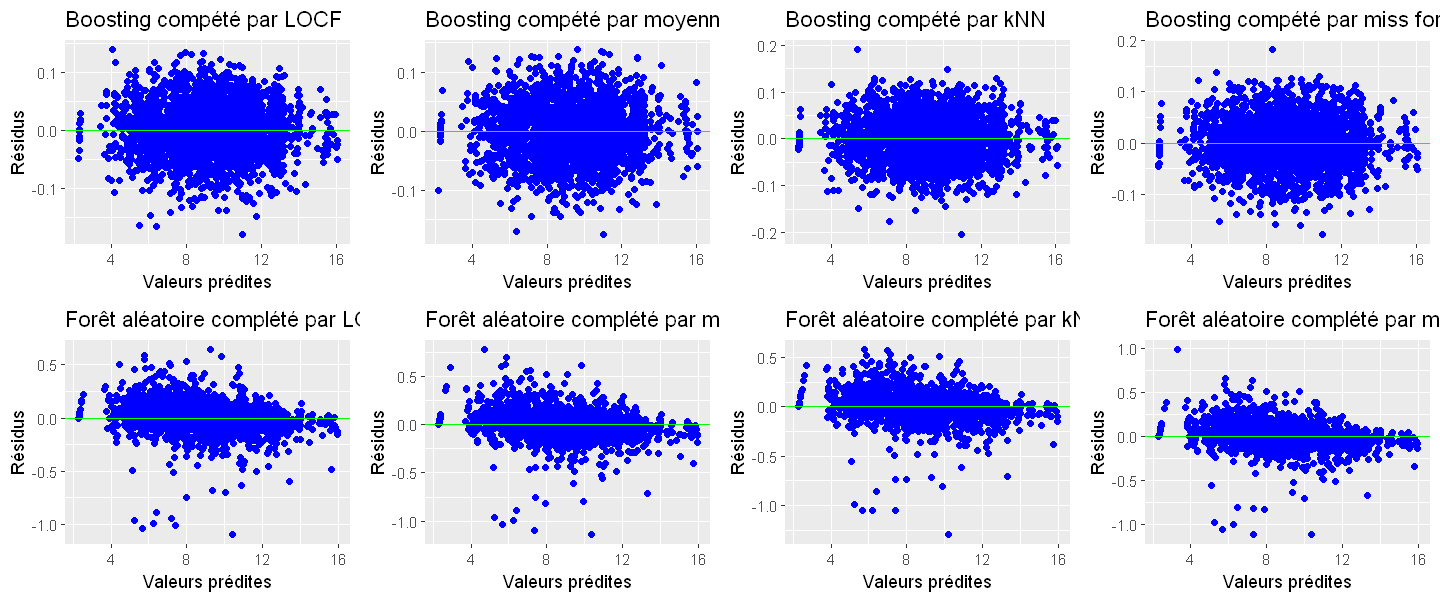

In [254]:
g1 <- gplot.res(fit.boost_locf,res.boost_locf,"Boosting compété par LOCF")
g2 <- gplot.res(fit.boost_moy,res.boost_moy,"Boosting compété par moyenne")
g3 <- gplot.res(fit.boost_kNN,res.boost_kNN,"Boosting compété par kNN")
g4 <- gplot.res(fit.boost_mf,res.boost_mf,"Boosting compété par miss forest")

g5 <- gplot.res(fitc.far_locf,resc.far_locf,"Forêt aléatoire complété par LOCF")
g6 <- gplot.res(fitc.far_moy,resc.far_moy,"Forêt aléatoire complété par moyenne")
g7 <- gplot.res(fitc.far_kNN,resc.far_kNN,"Forêt aléatoire complété par kNN")
g8 <- gplot.res(fitc.far_mf,resc.far_mf,"Forêt aléatoire complété par miss forest")

grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,ncol=4)

**Interprétation :**

Les résidus obtenus par complétion avec forêts aléatoires et kNN sont plus centrés.

---

#### Erreur d'apprendtissage

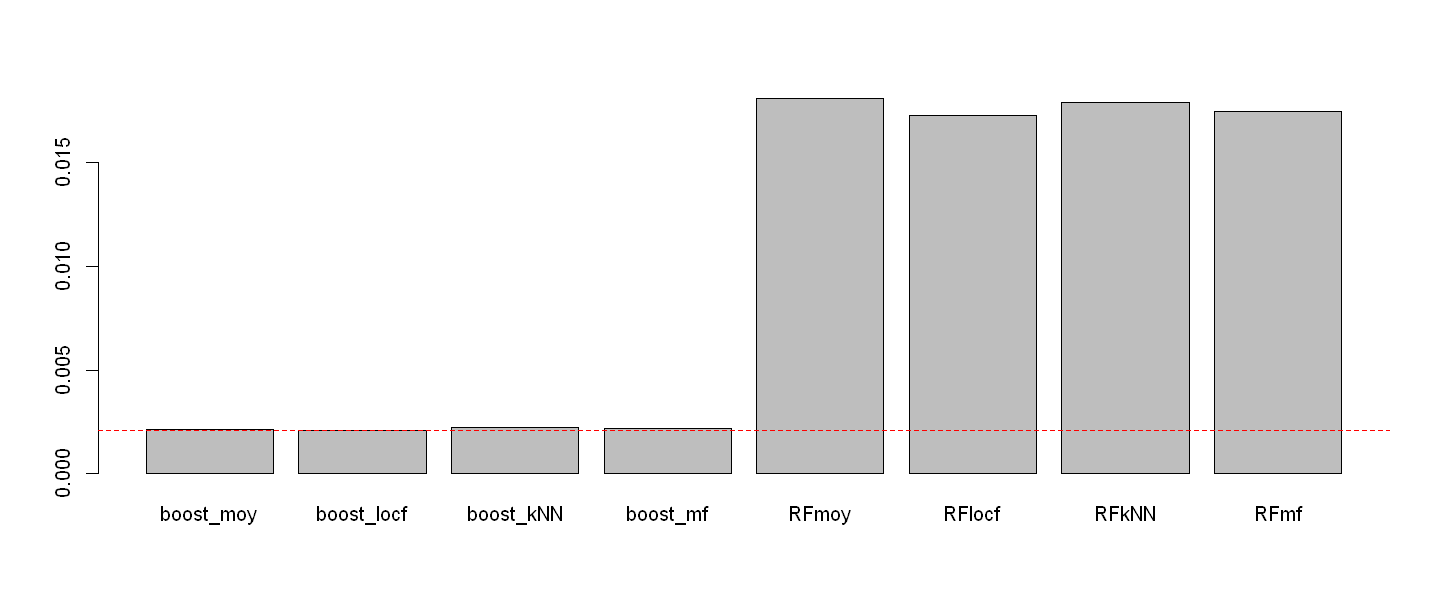

In [255]:
method_names_compl <- c("boost_moy","boost_locf","boost_kNN","boost_mf","RFmoy","RFlocf","RFkNN","RFmf")
MSE_fin_c=c(mse_boost_moy,mse_boost_locf,mse_boost_kNN,mse_boost_mf,mse_fa_moy,mse_fa_locf,mse_fa_kNN,mse_fa_mf)
barplot(MSE_fin_c,names.arg = method_names_compl)

min_MSE_c = min(MSE_fin_c)
abline(h = min_MSE_c, col = "red", lty = 2) 

**Interprétation :**

La méthode de remplissage par locf et missing forest nous permettent d'obtenir la plus petite erreur quadratique.


---

#### Erreur de régression

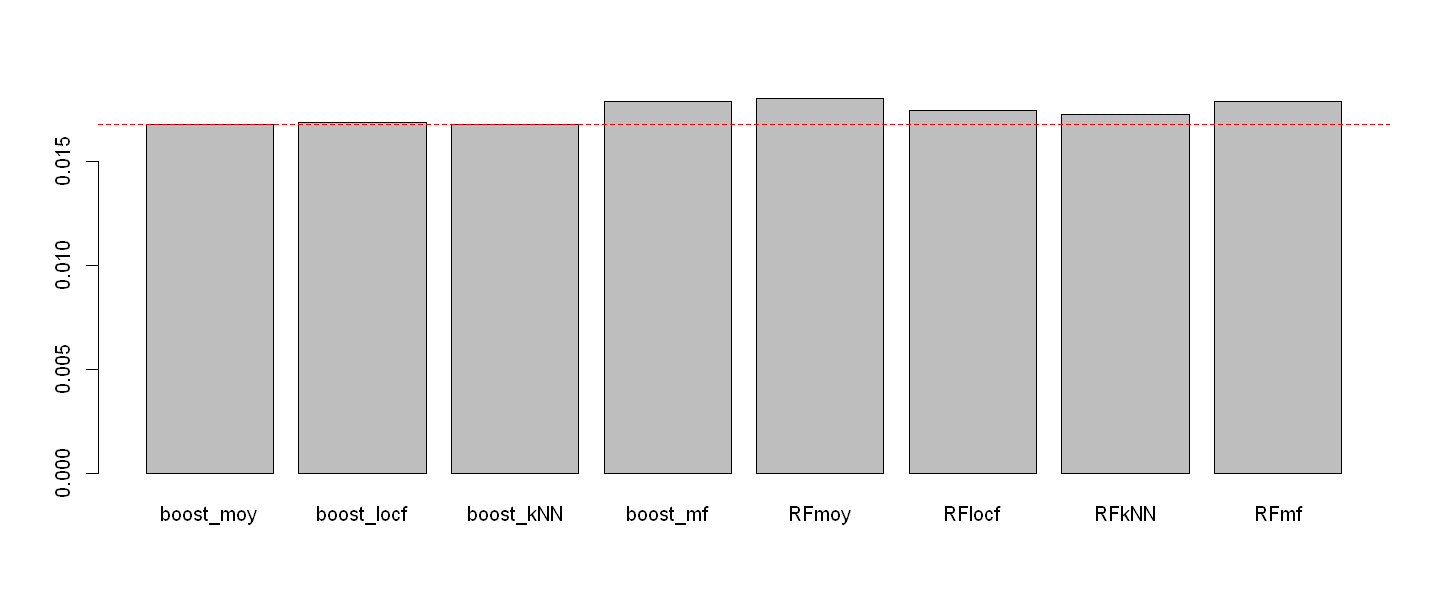

In [256]:
err_regr_c=c(e_reg_boost_moy,e_reg_boost_locf,e_reg_boost_kNN,e_reg_boost_mf,
             e_reg_fa_moy,e_reg_fa_locf,e_reg_fa_kNN,e_reg_fa_mf)

barplot(err_regr_c,names.arg = method_names_compl)
min_ereg_c = min(err_regr_c)
abline(h = min_ereg_c, col = "red", lty = 2) 

La méthode kNN nous permet d'optenir la plus petite erreur de régression. 

Nous garderons boosting avec remplissage par kNN qui permet d'optenir le meilleur compris entre résidus et erreur d'apprentissage. 

**Interprétation :**

La méthode de remplissage par forêts aléatoire est la plus efficace sur les deux modèles de remplissage. Cependant on remarque que peu importe la méthode de remplissage utilisée, il n'y a pas une réelle différence sur la prédiciton. Comme attendu, la méthode par la moyenne reste tout de même moins bonne. Random forest est aussi un peu moins performante pour le remplissage.

---

#### Erreur de classification pour les deux meilleurs modèles

In [257]:
CO2_c_mean <- mean(data_test_compl_kNN[,"L_Value_CO2"])

In [259]:
print('---------- kNN ----------')
conf_mat_kNN <- table(predc.boost_kNN>CO2_c_mean,data_test_compl_kNN[,"L_Value_CO2"]>CO2_c_mean)

print(conf_mat_kNN )

[1] "---------- kNN ----------"
       
        FALSE TRUE
  FALSE   315    5
  TRUE      4  321


**Interprétation :**

Les résultats de remplissage pour LOCF et kNN sont identiques. On n'a pris que 3 voisins pour kNN donc la similarité entre les deux méthodes n'est pas surprenante. Nous choisissons le modèle kNN que nous pouvons plus facilement ajuster (nombre de voisins) au contexte comparé à la méthode LOCF et qui obtient une erreur quadratique plus faible.

---

#### Niveau de précision

Le niveau de précision est le taux de vrai positif sur la somme de vrai et faux positifs. 

In [261]:
TP_kNN <- conf_mat_kNN[2,2]
FP_kNN <- conf_mat_kNN[2,1]

niveau_c <- TP_kNN/(TP_kNN+FP_kNN)
paste('Niveau de la prédiction : ' , niveau_c)

[1] "Niveau de la prédiction :  0.987692307692308"

Le niveau de précision est proche de 1. Ce résultat est très satisfaisant. 

# Conclusion

Nous avons montré que le jeu de données initial avait beaucoup de valeurs manquantes. Nous avons enlevé les variables qui avaient trop de ces valeurs car elles n'étaient donc pas exploitables. 

Dans un premiers temps nous avons enlevé les individus qui avaient des valeurs manquantes afin d'effectuer une première analyse. On en retire que :

- On peut centrer les données par une transformation logarithmique afin de proposer une meilleure analyse. Il est important de se souvenir que la prédicton que nous faisons est le logarithme de la valeur en CO2. 
- Les variables sont toutes dans des unités différentes et sont donc difficilement comparables entre elles à titre quantitatif. Cependant on a pu mettre en avant des interactions entre les variables. Notamment les accès à l'électricité et au fuels agissent de façon similaire à l'approvisionnement en électricité, carburant ... D'autres ont une évolution opposée comme la part d'énergie renouvelable et les accès aux énergies.
- Les variables sont très différentes d'un pays à l'autre, elles présentent des outliers. Notament l'émission de CO2 d'une minorité de pays ont des valeurs extrêmes comparé à une majorité de pays aux valeurs faibles. 
- Nous avons pu montrer que l'on pouvait représenter notre jeu de données avec 7 dimensions. Les deux premières représentées notamment par l'accès au fuels et la consomation d'énergie ... L'une évoluant avec les variables produisant de CO2 et l'autre séparant les variables de production d'éléctricité des autres.  
- Enfin concernant la variable CO2, nous avons montré qu'elle évolue de façon croissante avec les années. Nous constatons également qu'elle est très différente d'un pays à l'autre. Les pays les plus émetteurs sont principalement dans l'emisphère Nord. Les plus gros emetteurs sont les Etats-Unis, la Chine et l'Inde. 

Suite à cette analyse nous avons modélisé notre jeu de données : 
- Nous avons mis en place des méthodes de régression linaire sans interaction puis avec. Dans un premier temps sans pénalisation puis avec pénalisation Ridge et sélection de variables par LASSO. Nous observons à chaque fois l'erreur de regression et l'erreur de d'apprentissage. 
- Puis nous avons implémenté des méthodes non linéaire SVR, CART, Boosting, Random forest et réseau de neuronnes. Nous vérifions aussi les erreurs obtenues.
- Finalement on a comparé tous les modèles, on retient celui de Boosting qui nous permet d'obtenir les plus petites erreurs avec des résidus centrés. Le niveau de précision du modèle est de 98%. Tout comme l'a montré l'ACP, les varibales les plus influentes dans l'émission de CO2 sont L_Elec_from_renewables, L_Elec_from_nuclear, Latitude, Low_carbon_elec et L_Land_area. Les autres modèles s'appuient aussi sur ces variables. 

Enfin nous sommes repartis du jeu de départ et avons remplacé les valeurs manquantes des individus grâce à des algorithmes de complétion. 
- LOCf, kNN et Missing forest semblent en théorie être les plus appropriées à notre jeu de données en conaisssant l'hétorogénéité entre les pays. 
- Nous avons appliqué les méthodes de boosting et random forest sur ces nouveaux jeux de données.
- Nous obtenons au final de meilleurs résultats avec une complétion par kNN pour un modèle Boosting. 

Nous pouvons conclure en disant que la méthode de Boosting est le meilleur compromis entre toutes les méthodes afin de prédire au mieux la valeur de CO2.